In [1]:
from IPython import get_ipython
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# models
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from catboost import CatBoostRegressor
import seaborn as sns
import statsmodels.formula.api as smf


# sklearn processing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

# Text data
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

# Others
from category_encoders.glmm import GLMMEncoder
from IPython.display import SVG
from xgboost import plot_importance
import time
import pydot
from scipy import stats

# Timeseries
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")



C:\Users\jjlwe\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)



In [3]:
train = pd.read_csv(r'C:\Users\jjlwe\OneDrive - The University of Sydney (Students)\Year 3 Semester 1\QBUS3820\Group assignment\train.csv')
test = pd.read_csv(r'C:\Users\jjlwe\OneDrive - The University of Sydney (Students)\Year 3 Semester 1\QBUS3820\Group assignment\test.csv')


 <a href="#1.0-Data-Processing">1.0 Data Processing</a> <br>
 <a href="#1.1-Dealing-with-missing-data">1.1 Dealing with missing data</a> <br>
 <a href="#1.2-Dealing-with-variables-with-same-information">1.2 Dealing with variables with same information</a> <br>
 <a href="#2.0-EDA">2.0 EDA</a> <br>
 <a href="#2.2.1-Numerical-explanatory-variables">2.2.1 Numerical explanatory variables</a> <br>
 <a href="#2.2.2-Categorical-variables-(no-text)">2.2.2 Categorical variables (no text)</a> <br>
 <a href="#3.0-Feature-Engineering">3.0 Feature Engineering</a> <br>
 <a href="#3.1-Numerical-variables">3.1 Numerical variables</a> <br>
 <a href="#3.2-Categorical-Variables">3.2 Categorical variables</a> <br>
 <a href="#3.3-Categorical-text-data">3.1 Categorical text data</a> <br>
 <a href="#4.0-Methodology">4.0 Methodology</a> <br>

 # 1.0 Data Processing

In [4]:
cols = train.columns.tolist()

In [5]:
cols = cols[82:] + cols[:82]
cols[0], cols[1] = cols[1], cols[0]



In [6]:
cols



['name',
 'price',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'host_id',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'zipcode',
 'smart_location',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'weekly_discount',
 'monthly_discount',
 'security_deposit_perc',
 'cleaning_fee_perc',
 'guests_included',
 'extra_people_perc',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights'

In [7]:
train.head()


name  \
0                Beach House - quiet private complex   
1                           Family home in Chatswood   
2                     Fontaynes Studio in Sydney CBD   
3  Light, airy Victorian Terrace House in Paddington   
4                 Beautiful Comfortable Private Room   

                                             summary  \
0  Two double bedroom townhouse within 5 minutes ...   
1  Fantastically located family home next to publ...   
2  An ENTIRE studio ALL TO YOURSELF at Circular Q...   
3  Our home, in one of the most beautiful streets...   
4  A Modern house, close to train station and Sho...   

                                               space  \
0  A home from home nestled in Sydney's Northern ...   
1  A house very centrally located to both the Syd...   
2  Spacious for 1, roomy for 2, OK for 3, accommo...   
3                                                NaN   
4  We are only 1 minutes walk from the bus stop a...   

                                         description experiences_offered  \
0  Two double bedroom townhouse within 5 minutes ...                none   
1  Fantastically located family home next to publ...                none   
2  An ENTIRE studio ALL TO YOURSELF at Circular Q...                none   
3  Our home, in one of the most beautiful streets...                none   
4  A Modern house, close to train station and Sho...                none   

                               neighborhood_overview  \
0  Quiet and much demanded Eastern Hill location....   
1  Chatswood is a great neighbourhood, full of re...   
2  Ideally placed in Circular Quay, you'll be in ...   
3                                                NaN   
4                                                NaN   

                                               notes  \
0                                                NaN   
1  Public parking is available immediately in fro...   
2  This is a private unit ALL TO YOURSELF and you...   
3                                                NaN   
4                                                NaN   

                                             transit  \
0  Walk to 4 beaches to surf, swim, snorkel or st...   
1  The house is located a few minutes walk from e...   
2  Needless to say, surrounded by trains, cabs an...   
3                                                NaN   
4                                                NaN   

                                              access  \
0  Free WiFi, 50" Flat Screen TV, microwave, oven...   
1                      The whole house is available.   
2  You will be allowed to access the: - Lobby - L...   
3                                                NaN   
4  There is 'Free' on street parking in the Stree...   

                                         interaction  \
0    Whole house and left alone to enjoy your break.   
1  We will be travelling, but will have someone a...   
2  I only interact with guests via AirBnb, What's...   
3                                                NaN   
4  We can help you with advice of the best Sydney...   

                                         house_rules   host_id  host_since  \
0  Respect the space and treat our home as you wo...  21935432  2014-09-29   
1  Common sense, just treat the house as you expe...  17593823  2014-07-03   
2  STRICTLY NO PETS, SMOKING, HOUSE PARTIES, YELL...   8530753  2013-08-30   
3  Strictly no parties allowed, quiet after 10pm....   7015484  2013-06-20   
4  The only thing we ask is that there are no dru...  37093955  2015-06-29   

                           host_location  \
0      Manly, New South Wales, Australia   
1  Chatswood, New South Wales, Australia   
2         Melbourne, Victoria, Australia   
3     Sydney, New South Wales, Australia   
4     Sydney, New South Wales, Australia   

                                          host_about  host_response_time  \
0  I am a family man with a keen interest in outd...                 NaN   
1  Hi, \n

 ## 1.1 Dealing with missing data

In [8]:
## Combine train set and test set
test2 = test.drop('id', axis = 1)
ntrain = train.shape[0]
ntest = test2.shape[0]
y_train = train.price.values
combined = pd.concat([train,test2]).reset_index(drop=True)
combined.drop(['price'], axis=1 , inplace=True)



In [9]:
## Calculate Missing rate
percent = (combined.isnull().sum()/combined.isnull().count()).sort_values(ascending=False)
total = combined.isnull().sum().sort_values(ascending=False)

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data


Total   Percent
square_feet                                   35279  0.995092
monthly_discount                              33783  0.952895
weekly_discount                               32669  0.921474
notes                                         20540  0.579359
host_about                                    16014  0.451697
access                                        15132  0.426819
host_response_rate                            14896  0.420162
host_response_time                            14896  0.420162
house_rules                                   14684  0.414182
interaction                                   13665  0.385440
neighborhood_overview                         12177  0.343469
transit                                       11802  0.332891
host_acceptance_rate                          11458  0.323188
security_deposit_perc                         11376  0.320876
host_neighbourhood                            10514  0.296562
review_scores_value                            9824  0.277099
review_scores_checkin                          9820  0.276986
review_scores_location                         9818  0.276930
review_scores_accuracy                         9807  0.276620
review_scores_communication                    9795  0.276281
review_scores_cleanliness                      9791  0.276168
review_scores_rating                           9772  0.275633
space                                          9410  0.265422
last_review                                    8765  0.247229
first_review                                   8765  0.247229
reviews_per_month                              8765  0.247229
cleaning_fee_perc                              8343  0.235326
neighbourhood                                  4535  0.127916
beds                                            237  0.006685
zipcode                                         115  0.003244
host_location                                    38  0.001072
city                                             31  0.000874
bedrooms                                         20  0.000564
bathrooms                                         9  0.000254
host_id                                           0  0.000000
host_since                                        0  0.000000
neighbourhood_cleansed                            0  0.000000
experiences_offered                               0  0.000000
host_listings_count                               0  0.000000
host_total_listings_count                         0  0.000000
host_verifications                                0  0.000000
number_of_reviews_ltm                             0  0.000000
number_of_reviews                                 0  0.000000
host_is_superhost                                 0  0.000000
requires_license                                  0  0.000000
description                                       0  0.000000
availability_90                                   0  0.000000
instant_bookable                                  0  0.000000
is_business_travel_ready                          0  0.000000
cancellation_policy                               0  0.000000
require_guest_profile_picture                     0  0.000000
require_guest_phone_verification                  0  0.000000
calculated_host_listings_count                    0  0.000000
calculated_host_listings_count_entire_homes       0  0.000000
calculated_host_listings_count_private_rooms      0  0.000000
calculated_host_listings_count_shared_rooms       0  0.000000
availability_365                                  0  0.000000
minimum_nights_avg_ntm                            0  0.000000
availability_60                                   0  0.000000
availability_30                                   0  0.000000
smart_location                                    0  0.000000
latitude                                          0  0.000000
longitude                                         0  0.000000
is_location_exact                                 0  0.000000
property_type   

 ### 1.1.1 Drop variables which missing rate >90%

In [10]:
combined.drop(['square_feet', 'weekly_discount', 'monthly_discount'], axis = 1, inplace = True)


 ### 1.1.2 Drop Host personal information (will not affect price )

In [11]:
combined.drop(['host_id', 'host_location', 'host_about', 'host_neighbourhood', ], axis = 1, inplace = True)


 ### 1.1.3  Filling 'na' for no given information  text variables

In [12]:
list_1 = ['space',
          'neighborhood_overview',
          'notes',
          'transit',
          'access',
          'interaction',
          'house_rules']



In [13]:
for i in range(len(list_1)):
    combined[list_1[i]] = combined[list_1[i]].fillna('')


 ### 1.1.4 Dealing with review  variables

In [14]:
## fill 0 
combined['reviews_per_month'] = combined['reviews_per_month'].fillna(0)



In [15]:
# we cant handle na values for first review and last reviews
combined.drop(['first_review', 'last_review'], axis = 1, inplace = True)


 ### 1.1.5 Filling 'No Reviews'  for missind data in review score variables

In [16]:
combined['review_scores_rating'] = combined['review_scores_rating'].astype(float)

list_2 = ['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

for i in range(len(list_2)):
    combined[list_2[i]] = combined[list_2[i]].fillna('No Review')


 ### 1.1.6 Dealing with host response time and rate

In [17]:
# change float to str
combined['host_response_rate'] = combined['host_response_rate'].str.replace('%','').astype(float)
# Filling mean for response time, Filling "others" for response rate
combined['host_response_time'] = combined['host_response_time'].fillna('others')



In [18]:
combined['host_response_rate'] = combined['host_response_rate'].fillna('unknown')


 ### 1.1.7 Dealing with host acceptance rate

In [19]:
# drop becuase host acceptance rate is based on seller's judgement on information of the buyer. 
# This does not affect 'price' that is set by the seller.
combined['host_acceptance_rate_float'] = combined['host_acceptance_rate'].str.replace('%','').astype(float)
combined.drop('host_acceptance_rate', axis = 1 ,inplace = True)
combined.drop('host_acceptance_rate_float', axis = 1 ,inplace = True)


 ### 1.1.8 Dealing with security deposit percentage

In [20]:
### Filling mode to missing values in security deposit rate, because most of 
### deposit rate in airbnb may be similar(mode 是 0)


In [21]:
combined['security_deposit_perc'] = combined['security_deposit_perc'].fillna(0)


 ### 1.1.9 Dealing with clean fee percentage

In [22]:
### Filling mode to missing values in cleaning fee rate, because most of 
### cleaning fee rate in airbnb may be similar

combined['cleaning_fee_perc'] = combined['cleaning_fee_perc'].fillna(0)


 ### 1.1.10 Dealing with  location related missing values (neighborhood, zipcode, city)

In [23]:
##neighborhood, zipcode, city could has same mean with smart location, so we choose to drop
combined.drop(['neighbourhood','city','zipcode'], axis = 1, inplace = True)


 ### 1.1.11 Dealing with beds, bedrooms bathrooms

In [24]:
list_3 = ['beds', 'bedrooms']

for i in range(len(list_3)):
    combined[list_3[i]] = combined.apply(lambda row: row['accommodates'] if np.isnan(row[list_3[i]]) else row[list_3[i]], axis=1)



In [25]:
combined['bedrooms'] = combined.apply(lambda row: row['beds'] if np.isnan(row['bedrooms']) else row['bedrooms'], axis=1)
# apply() function calls the lambda function and applies it to every row or column of the dataframe and returns a modified copy of the dataframe
# here if bedrooms is null then the bedroom entry is beds, else that is not null then the entry is still bedrooms. 

combined['bathrooms'] = combined.apply(lambda row: np.ceil(row['bedrooms']/2) if np.isnan(row['bathrooms']) else row['bathrooms'], axis=1)



In [26]:
## Calculate Missing rate
percent = (combined.isnull().sum()/combined.isnull().count()).sort_values(ascending=False)
total = combined.isnull().sum().sort_values(ascending=False)

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data


Total  Percent
name                                              0      0.0
maximum_nights_avg_ntm                            0      0.0
number_of_reviews_ltm                             0      0.0
number_of_reviews                                 0      0.0
availability_365                                  0      0.0
availability_90                                   0      0.0
availability_60                                   0      0.0
availability_30                                   0      0.0
minimum_nights_avg_ntm                            0      0.0
guests_included                                   0      0.0
maximum_maximum_nights                            0      0.0
minimum_maximum_nights                            0      0.0
maximum_minimum_nights                            0      0.0
minimum_minimum_nights                            0      0.0
maximum_nights                                    0      0.0
minimum_nights                                    0      0.0
review_scores_rating                              0      0.0
review_scores_accuracy                            0      0.0
review_scores_cleanliness                         0      0.0
review_scores_checkin                             0      0.0
review_scores_communication                       0      0.0
review_scores_location                            0      0.0
review_scores_value                               0      0.0
requires_license                                  0      0.0
instant_bookable                                  0      0.0
is_business_travel_ready                          0      0.0
cancellation_policy                               0      0.0
require_guest_profile_picture                     0      0.0
require_guest_phone_verification                  0      0.0
calculated_host_listings_count                    0      0.0
calculated_host_listings_count_entire_homes       0      0.0
calculated_host_listings_count_private_rooms      0      0.0
calculated_host_listings_count_shared_rooms       0      0.0
extra_people_perc                                 0      0.0
cleaning_fee_perc                                 0      0.0
summary                                           0      0.0
interaction                                       0      0.0
host_listings_count                               0      0.0
host_is_superhost                                 0      0.0
host_response_rate                                0      0.0
host_response_time                                0      0.0
host_since                                        0      0.0
house_rules                                       0      0.0
access                                            0      0.0
security_deposit_perc                             0      0.0
transit                                           0      0.0
notes                                             0      0.0
neighborhood_overview                             0      0.0
experiences_offered                               0      0.0
description                                       0      0.0
space                                             0      0.0
host_total_listings_count                         0      0.0
host_verifications                                0      0.0
host_identity_verified                            0      0.0
street                                            0      0.0
neighbourhood_cleansed                            0      0.0
smart_location                                    0      0.0
latitude                                          0      0.0
longitude                                         0      0.0
is_location_exact                                 0      0.0
property_type                                     0      0.0
room_type                                         0      0.0
accommodates                                      0      0.0
bathrooms                                         0      0.0
bedrooms                                          0      0.0
beds                

 ## 1.2 Dealing with variables with same information

 ### 1.2.1 Dealing with description related variables

In [27]:
### becuause description =..+..+...+...
combined.drop(['description'], axis = 1, inplace = True)


 ### 1.2.2 Dealing with mini maxi nights

In [28]:
# range of minimum and maximum is not important

combined.drop(['minimum_minimum_nights',
               'maximum_minimum_nights',
               'minimum_maximum_nights',
               'maximum_maximum_nights', 
               'minimum_nights_avg_ntm',
               'maximum_nights_avg_ntm'], axis = 1, inplace = True)


 ### 1.2.3 Total listing counts

In [29]:
## Calculated total listing count is more accuarte than total listing counts,
## so we drop total listing counts
combined.drop('host_total_listings_count', axis = 1, inplace = True)


 ### 1.2.4 Location related variables

In [30]:
combined.drop(['street','latitude', 'longitude','smart_location'], axis = 1, inplace = True)

 ### 1.2.5 Calculated host listing counts

In [31]:
## Because Calculated host listing count is more accurat that host listing counts
## calculated...+calculated......= Calculatied host listing counts
combined.drop(['calculated_host_listings_count_entire_homes', 
            'calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms',
            'host_listings_count'], axis = 1, inplace = True)


 ### 1.2.6 Avaliability nights

In [32]:
## only keep 60, representative
combined.drop(['availability_30',
            'availability_90',
            'availability_365'], axis = 1, inplace = True)


 ### 1.2.7 Number of reviews and number of reviews_ltm

In [33]:
## only interesting in number of reviews in last 12 month， reviews per month also give same info
combined.drop('number_of_reviews', axis = 1, inplace = True)
combined.drop('reviews_per_month', axis = 1, inplace = True)


 ### 1.2.8 Review scores

In [34]:
# avoid curse of dimensionality, correlation - multicollinearity, repeated information

train[['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']].corr()



review_scores_rating  review_scores_accuracy  \
review_scores_rating                     1.000000                0.751412   
review_scores_accuracy                   0.751412                1.000000   
review_scores_cleanliness                0.724779                0.633448   
review_scores_checkin                    0.571846                0.538677   
review_scores_communication              0.636879                0.602616   
review_scores_location                   0.474486                0.457481   
review_scores_value                      0.724784                0.665168   

                             review_scores_cleanliness  review_scores_checkin  \
review_scores_rating                          0.724779               0.571846   
review_scores_accuracy                        0.633448               0.538677   
review_scores_cleanliness                     1.000000               0.430283   
review_scores_checkin                         0.430283               1.000000   
review_scores_communication                   0.462466               0.687679   
review_scores_location                        0.374086               0.412701   
review_scores_value                           0.617082               0.498558   

                             review_scores_communication  \
review_scores_rating                            0.636879   
review_scores_accuracy                          0.602616   
review_scores_cleanliness                       0.462466   
review_scores_checkin                           0.687679   
review_scores_communication                     1.000000   
review_scores_location                          0.446056   
review_scores_value                             0.549237   

                             review_scores_location  review_scores_value  
review_scores_rating                       0.474486             0.724784  
review_scores_accuracy                     0.457481             0.665168  
review_scores_cleanliness                  0.374086             0.617082  
review_scores_checkin                      0.412701             0.498558  
review_scores_communication                0.446056             0.549237  
review_scores_location                     1.000000             0.484593  
review_scores_value                        0.484593             1.000000

In [35]:
combined.drop(['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_value'], axis = 1, inplace = True)



In [36]:
## Calculate Missing rate
percent = (combined.isnull().sum()/combined.isnull().count()).sort_values(ascending=False)
total = combined.isnull().sum().sort_values(ascending=False)

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data


Total  Percent
name                                  0      0.0
beds                                  0      0.0
amenities                             0      0.0
security_deposit_perc                 0      0.0
cleaning_fee_perc                     0      0.0
guests_included                       0      0.0
extra_people_perc                     0      0.0
minimum_nights                        0      0.0
maximum_nights                        0      0.0
availability_60                       0      0.0
number_of_reviews_ltm                 0      0.0
review_scores_rating                  0      0.0
review_scores_checkin                 0      0.0
review_scores_communication           0      0.0
review_scores_location                0      0.0
requires_license                      0      0.0
instant_bookable                      0      0.0
is_business_travel_ready              0      0.0
cancellation_policy                   0      0.0
require_guest_profile_picture         0      0.0
require_guest_phone_verification      0      0.0
bed_type                              0      0.0
bedrooms                              0      0.0
summary                               0      0.0
bathrooms                             0      0.0
space                                 0      0.0
experiences_offered                   0      0.0
neighborhood_overview                 0      0.0
notes                                 0      0.0
transit                               0      0.0
access                                0      0.0
interaction                           0      0.0
house_rules                           0      0.0
host_since                            0      0.0
host_response_time                    0      0.0
host_response_rate                    0      0.0
host_is_superhost                     0      0.0
host_verifications                    0      0.0
host_identity_verified                0      0.0
neighbourhood_cleansed                0      0.0
is_location_exact                     0      0.0
property_type                         0      0.0
room_type                             0      0.0
accommodates                          0      0.0
calculated_host_listings_count        0      0.0

 # 2.0 EDA

In [37]:
train = combined[:ntrain]
test = combined[ntrain:]



In [38]:
train['price'] = y_train
train['price'] = train['price'].str.replace(r'[^-+\d.]', '').astype(float)


 ## 2.1 Response variable

Text(0.5, 0, 'price')

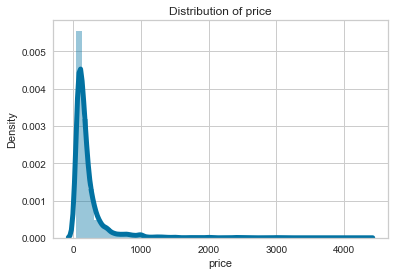

In [39]:
b = sns.distplot(train['price'], 
                color='b',
                kde_kws=dict(linewidth=5, alpha=1),
                hist_kws=dict(alpha=0.4))
plt.title('Distribution of price')
plt.xlabel('price')



In [40]:
train['log_price'] = np.log(train['price'])



Text(0.5, 0, 'price')

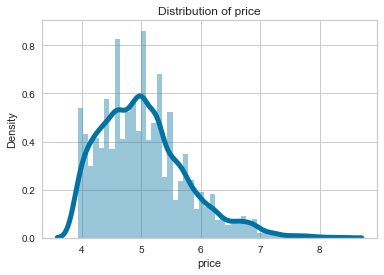

In [41]:
b = sns.distplot(train['log_price'], 
                color='b',
                kde_kws=dict(linewidth=5, alpha=1),
                hist_kws=dict(alpha=0.4))
plt.title('Distribution of price')
plt.xlabel('price')


In [42]:
cols = train.columns.tolist()
cols = cols[len(train.columns)-2:] + cols[:len(train.columns)-2]

In [43]:
train = train[cols]


In [44]:
stats.describe(np.log(train['price']))

DescribeResult(nobs=10635, minmax=(3.9318256327243257, 8.366370301681654), mean=5.034870919864719, variance=0.5225867791978781, skewness=0.8504612449150561, kurtosis=0.826472770459501)

 ## 2.2 Explanatory Variables

 ### 2.2.1 Numerical explanatory variables

 #### 2.2.1.1 Univarate

In [45]:
continuous = train.iloc[:,3:].select_dtypes(include = np.number).columns.tolist()



In [46]:
continuous



['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit_perc',
 'cleaning_fee_perc',
 'guests_included',
 'extra_people_perc',
 'minimum_nights',
 'maximum_nights',
 'availability_60',
 'number_of_reviews_ltm',
 'calculated_host_listings_count']

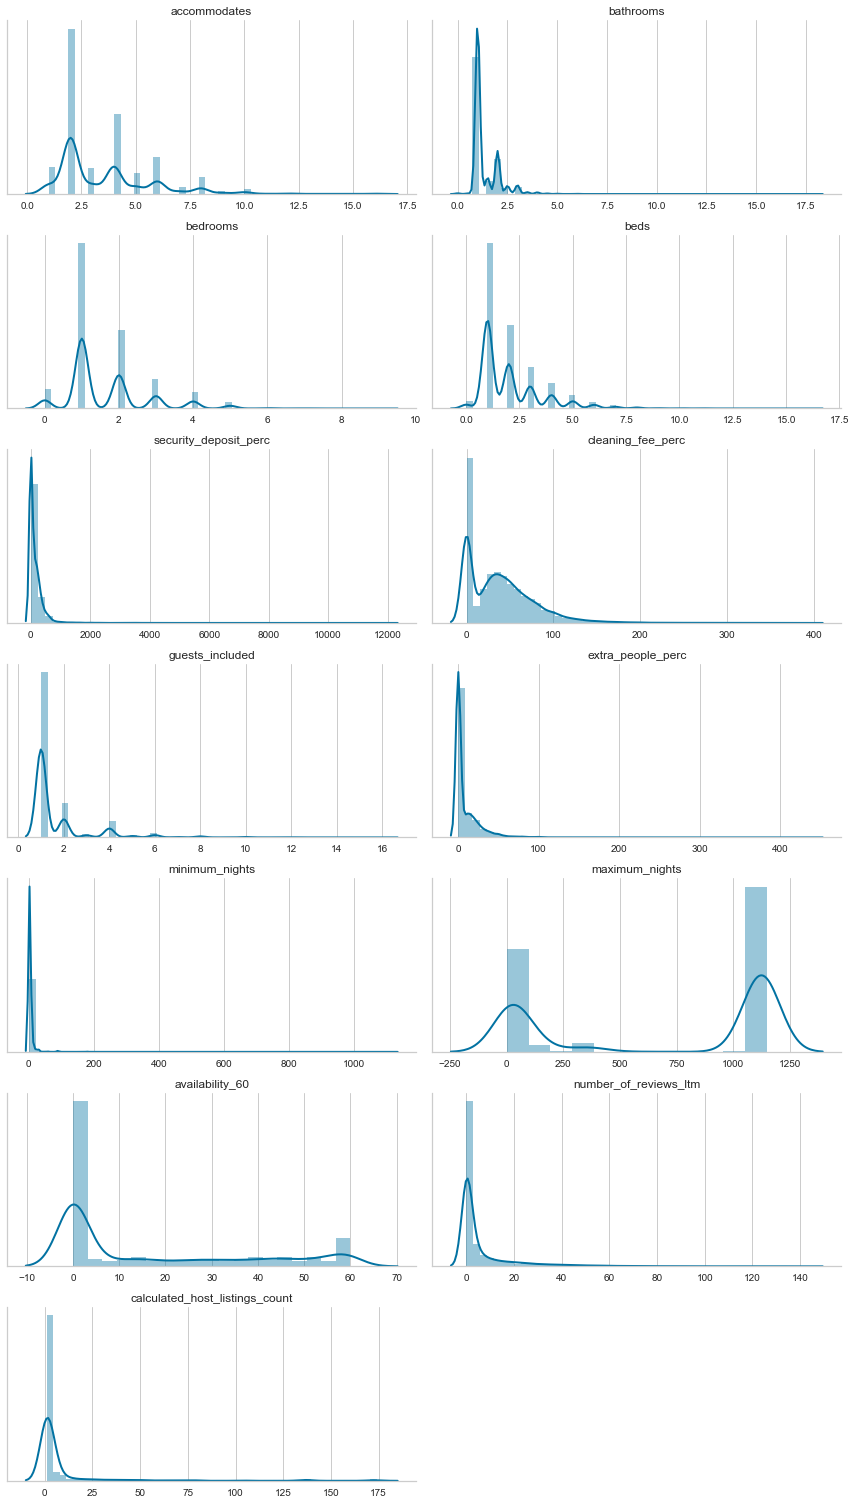

In [47]:
N, p = train[continuous].shape
rows = int(np.ceil(p/2))
fig, axes = plt.subplots(rows, 2, figsize=(12, rows*(12/4)))

for i, ax in enumerate(fig.axes):
    if i < p:
        sns.distplot(train[continuous].iloc[:,i], 
                     ax=ax,  
                     hist_kws = dict(alpha = 0.4),  
                     kde_kws= dict(linewidth = 2, alpha = 1))
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(continuous[i])
        ax.set_yticks([])
    else:
        fig.delaxes(ax)

sns.despine()
plt.tight_layout()


 #### 2.2.1.2 Bivarate

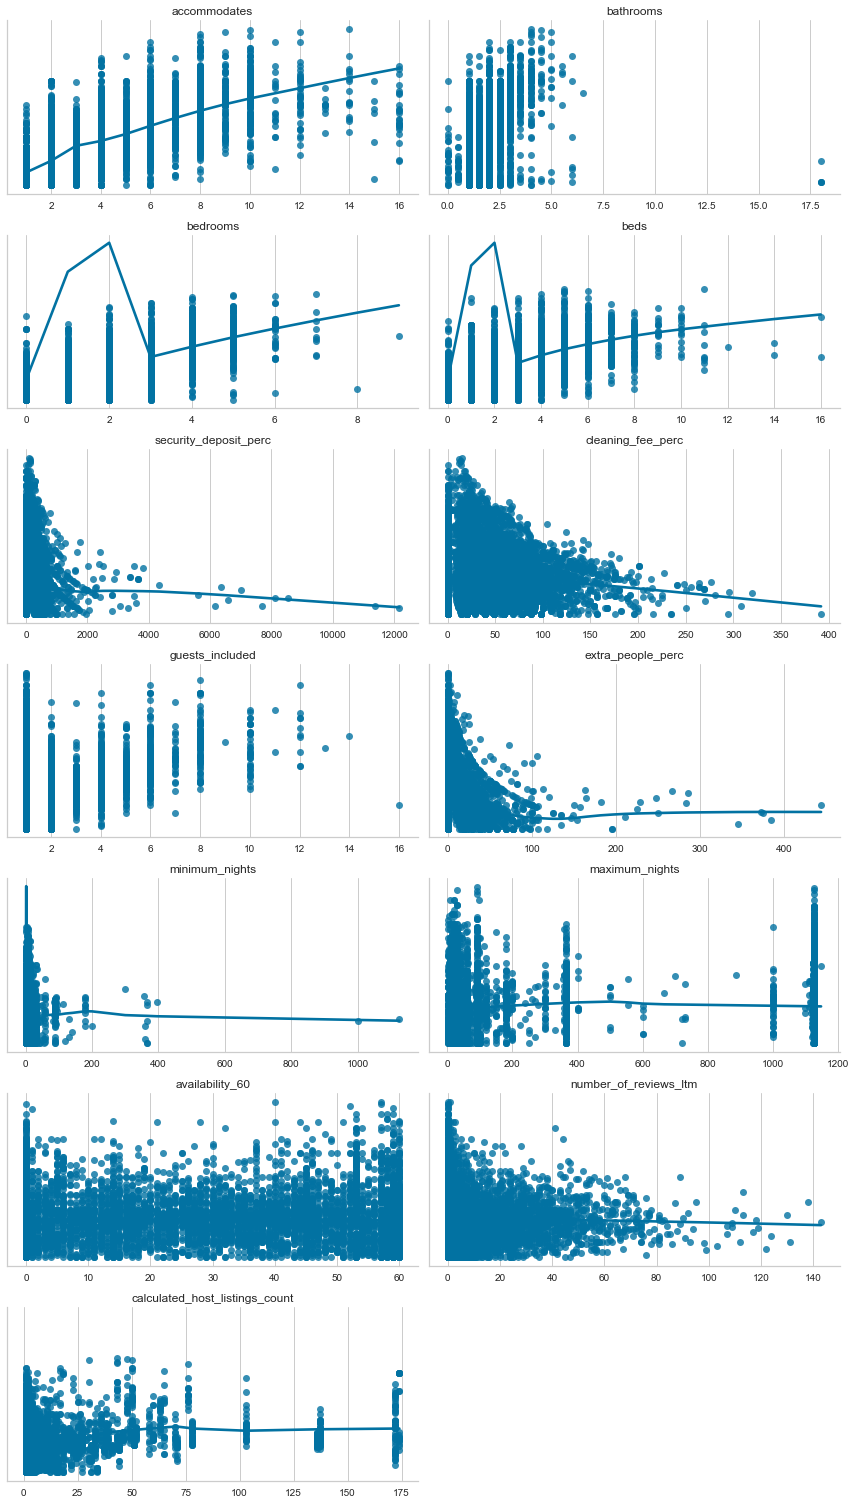

In [48]:
N, p = train[continuous].shape
rows = int(np.ceil(p/2))

fig, axes = plt.subplots(rows, 2, figsize=(12, rows*(12/4)))

for i, ax in enumerate(fig.axes):
    if i < p:
        sns.regplot(data = train, 
                    x = continuous[i],
                    y = 'log_price',
                    ax=ax,
                    lowess =True)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(continuous[i])
        ax.set_yticks([])
    else:
        fig.delaxes(ax)

sns.despine()
plt.tight_layout()



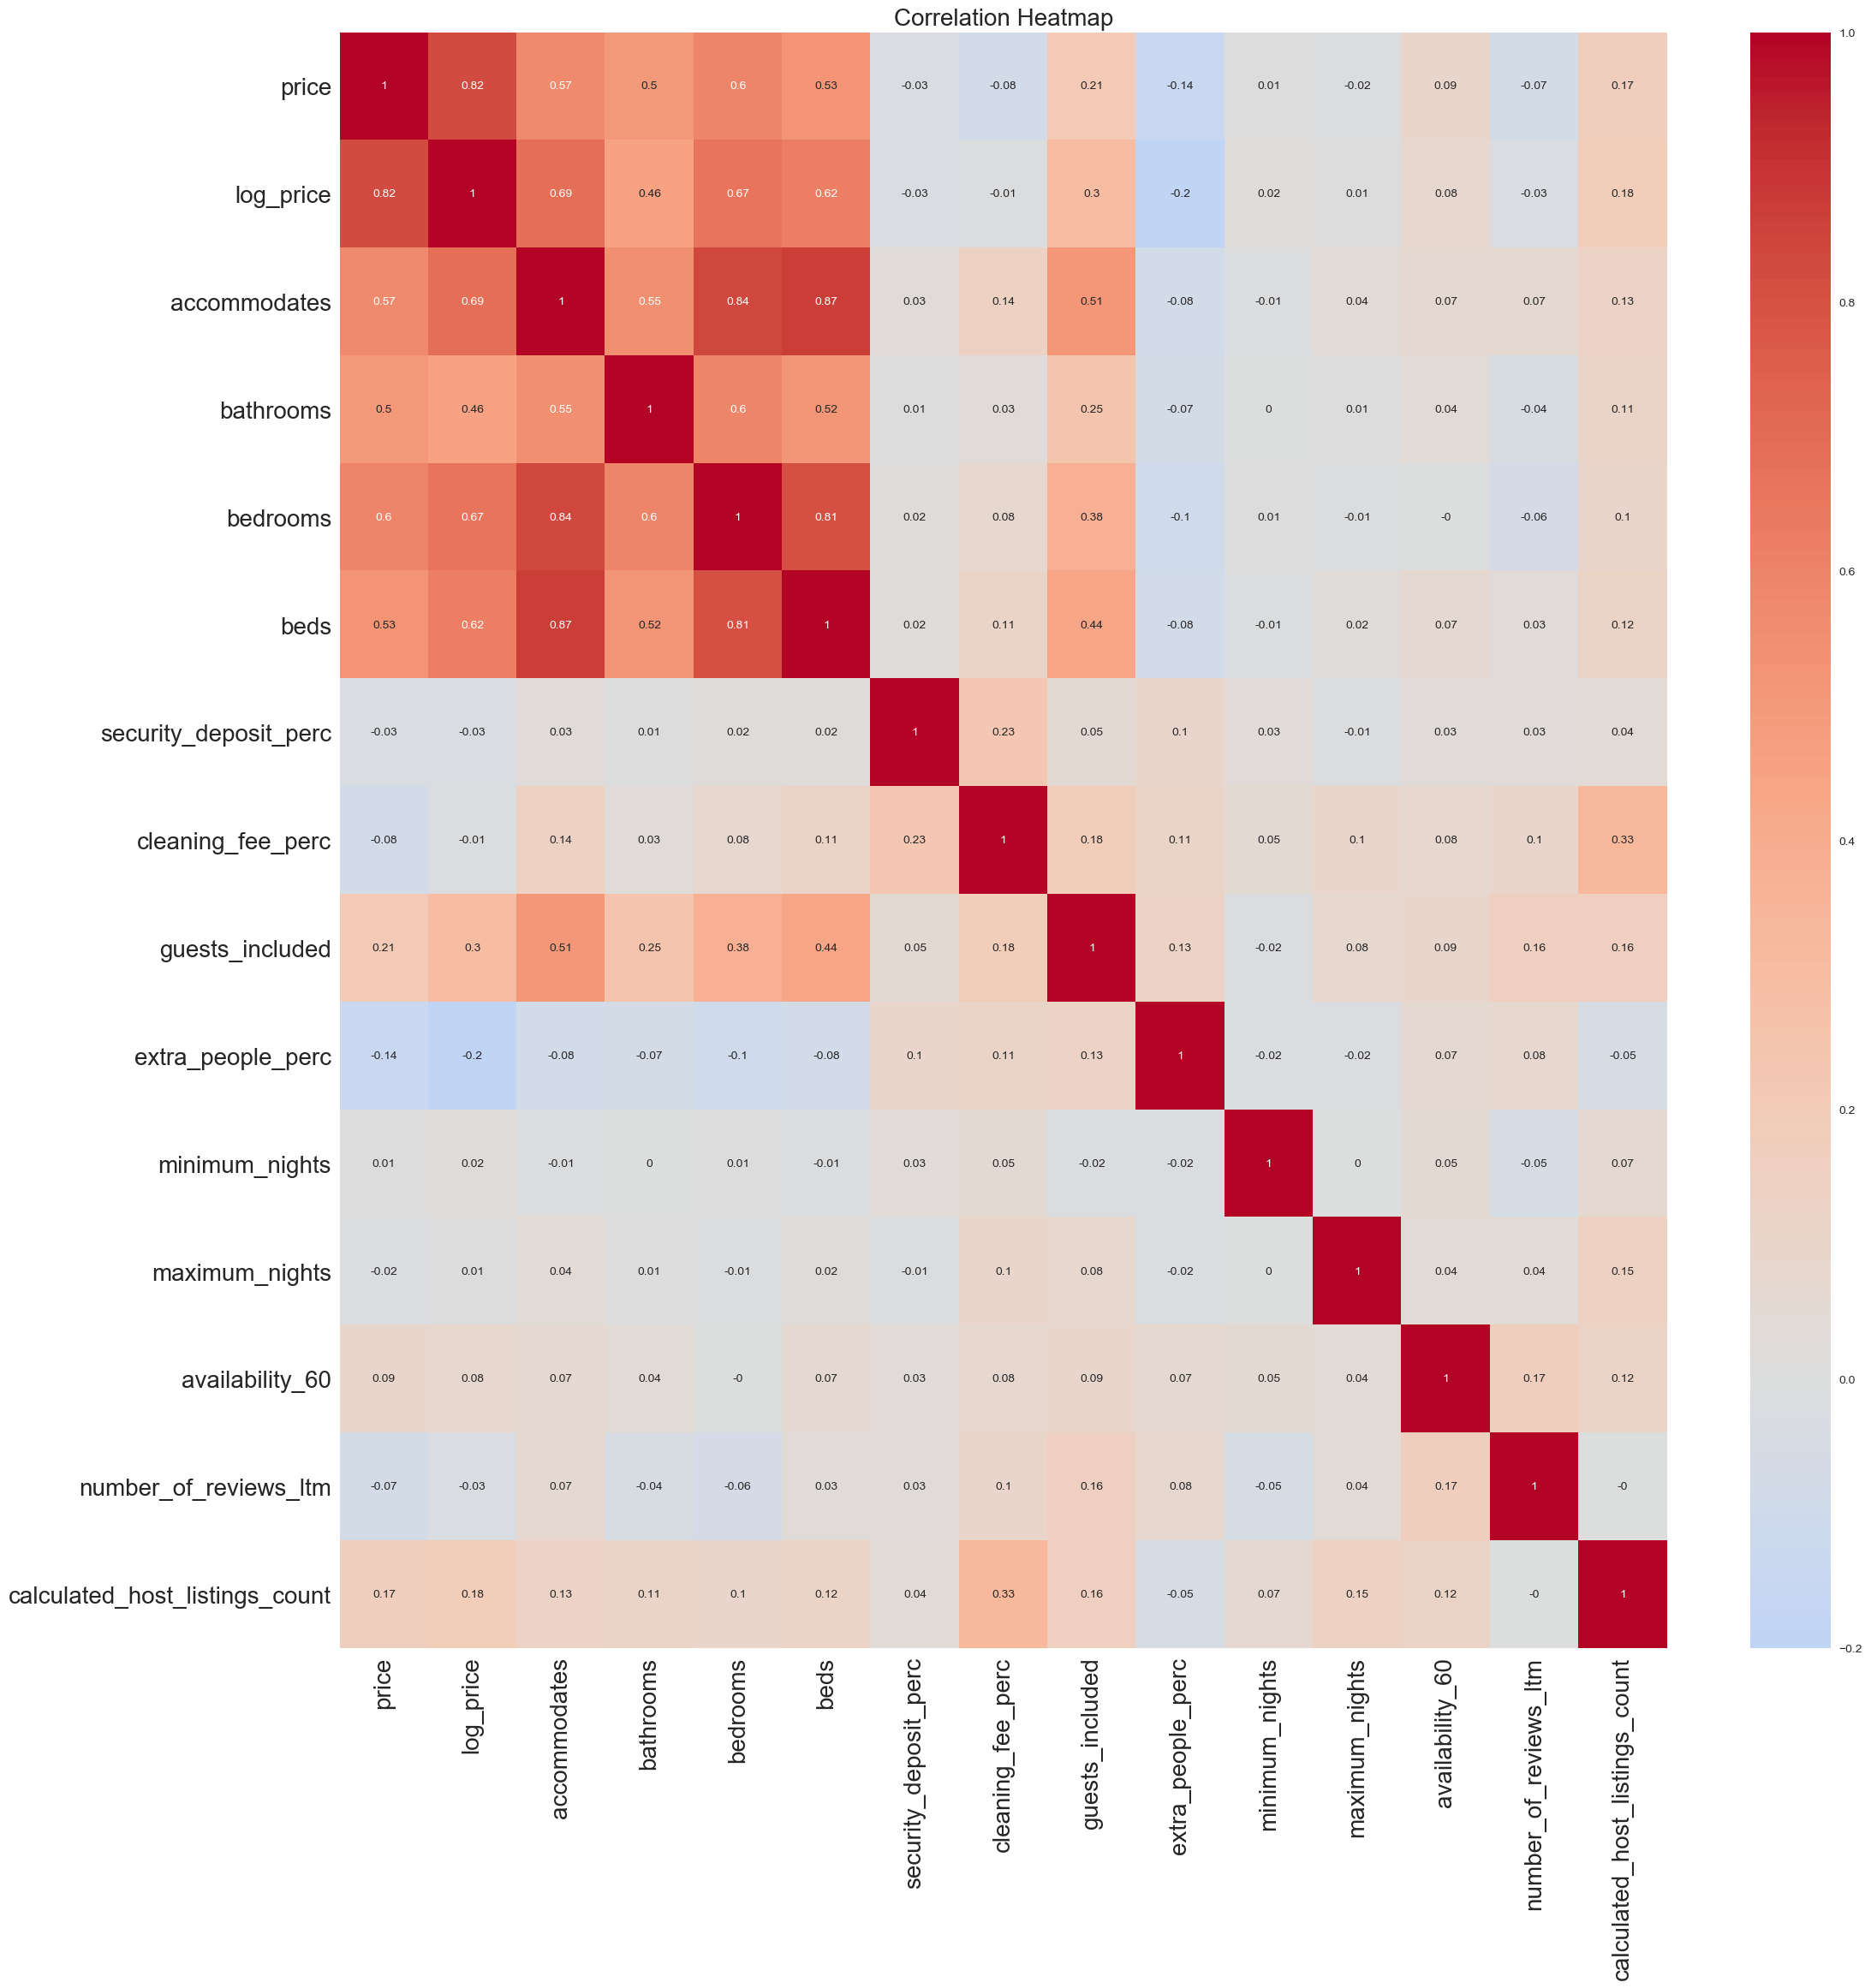

In [49]:
numerical_val = train.dtypes[train.dtypes != 'object'].index
plt.figure(figsize=(25,25),dpi=100)
sns.heatmap(train[numerical_val].corr().round(2),
           xticklabels=train[numerical_val].corr().round(2).columns,
           yticklabels=train[numerical_val].round(2).columns,
           cmap='coolwarm',center=0,annot=True)
plt.title('Correlation Heatmap',fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20,rotation=360)
plt.show()


 ##### 2.2.1.2.1 Outliers

In [50]:
fix = train.query('bathrooms > 15').index



In [51]:
for i in range(len(fix)):
    train['bathrooms'][fix[i]] = 1



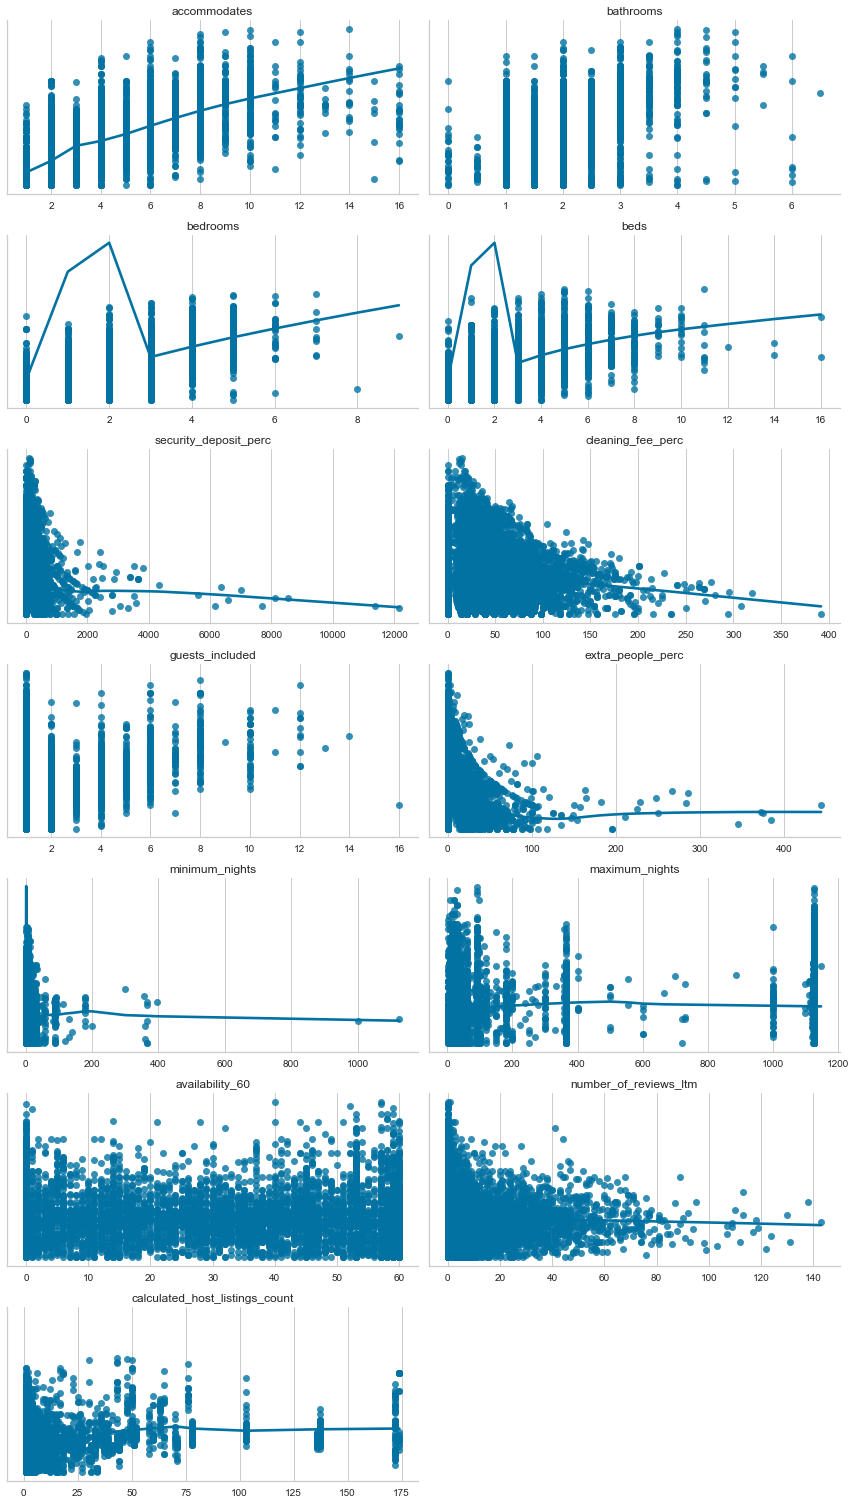

In [52]:
rows = int(np.ceil(p/2))

fig, axes = plt.subplots(rows, 2, figsize=(12, rows*(12/4)))

for i, ax in enumerate(fig.axes):
    if i < p:
        sns.regplot(data = train, 
                    x = continuous[i],
                    y = 'log_price',
                    ax=ax,
                    lowess = True)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(continuous[i])
        ax.set_yticks([])
    else:
        fig.delaxes(ax)

sns.despine()
plt.tight_layout()


 ### 2.2.2 Categorical variables (no text)
 #### 2.2.2.1 Univariate

In [53]:
categorical = train.iloc[:,3:].select_dtypes(include = object).columns
categorical_notext = categorical.drop(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules','host_since','host_verifications','amenities'])



In [54]:
categorical



Index(['summary', 'space', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'amenities', 'review_scores_rating',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'requires_license', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [55]:
train[categorical_notext].info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   experiences_offered               10635 non-null  object
 1   host_response_time                10635 non-null  object
 2   host_response_rate                10635 non-null  object
 3   host_is_superhost                 10635 non-null  object
 4   host_identity_verified            10635 non-null  object
 5   neighbourhood_cleansed            10635 non-null  object
 6   is_location_exact                 10635 non-null  object
 7   property_type                     10635 non-null  object
 8   room_type                         10635 non-null  object
 9   bed_type                          10635 non-null  object
 10  review_scores_rating              10635 non-null  object
 11  review_scores_checkin             10635 non-null  object
 12  review_scores_comm

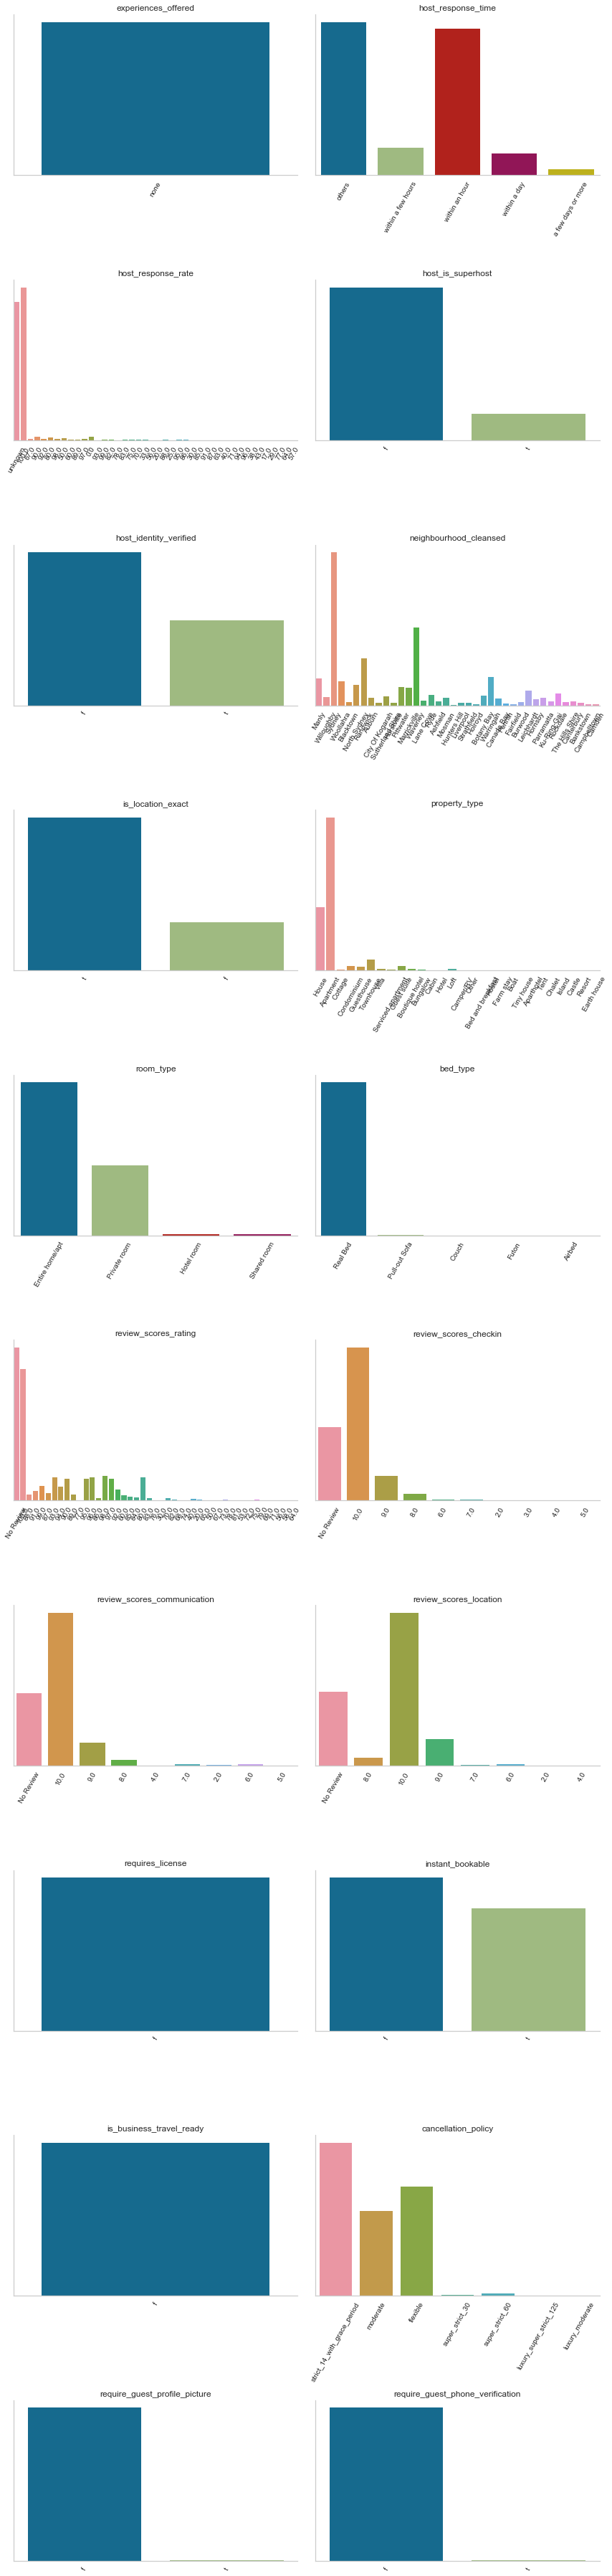

In [56]:
N, p = train[categorical_notext].shape
rows = int(np.ceil(p/2))

fig, axes = plt.subplots(rows, 2, figsize=(12, rows*(20/4)))

for i, ax in enumerate(fig.axes):
    if i < p:
        sns.countplot(train[categorical_notext].iloc[:,i], 
                     ax=ax)
        ax.set_xlabel('')
        ax.tick_params(axis='x', labelrotation= 60 )
        ax.set_ylabel('')
        ax.set_title(categorical_notext[i])
        ax.set_yticks([])
    else:
        fig.delaxes(ax)

sns.despine()
plt.tight_layout()


 #### 2.2.2.2 Bivariate

In [57]:
categorical_notext



Index(['experiences_offered', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'review_scores_rating', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'requires_license', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [58]:
len(categorical_notext)



20

In [59]:
# fig, ax = plt.subplots(19,1,sharex='col', sharey='row',figsize=(10,20),dpi=100)
# for i in range(1,20):
   # plt.subplot(19,1,i)
   # sns.boxplot(train[categorical_notext[i-1]],train['price'], palette='Blues', showmeans=True)
   # plt.xticks(rotation=60)
   # plt.subplots_adjust(wspace=0.3,hspace=0.35)


 # 3.0 Feature Engineering

 ## 3.1 Numerical variables

 ## 3.1.1 Transform Numerical variable to Categorical variable

In [60]:
num_to_cat = ['accommodates','bathrooms','bedrooms', 'beds', 'guests_included']

for i in range(len(num_to_cat)):
    train[num_to_cat[i]] = train[num_to_cat[i]].apply(str)
    test[num_to_cat[i]] = test[num_to_cat[i]].apply(str)


 ## 3.2 Categorical Variables

 ### 3.2.1 Drop variables only have one category, or only have two but highly concentrated on one

In [61]:
train.drop(['experiences_offered',
            'require_guest_profile_picture', 
            'require_guest_phone_verification',
            'is_business_travel_ready', 
            'requires_license'], axis = 1, inplace = True)
test.drop(['experiences_offered',
            'require_guest_profile_picture', 
            'require_guest_phone_verification',
            'is_business_travel_ready', 
            'requires_license'], axis = 1, inplace = True)


 ## 3.2.2 Merge sparse labels

 #### 3.2.2.1 Review_scores_rating

In [62]:
def convert_scores_buckets(val):
    if val == 'No Review':
        return 'No Review'
    elif val >= 90.0:
        return '90-100'
    elif val >= 80.0 and val < 90.0:
        return '80-90'
    elif val >= 70.0 and val < 80.0:
        return '70-80'
    elif val < 70.0:
        return 'Below 70'

train['review_scores_rating'] = train['review_scores_rating'].apply(convert_scores_buckets)
test['review_scores_rating'] = test['review_scores_rating'].apply(convert_scores_buckets)


 #### 3.2.2.2 Host_Response_rate

In [63]:
def convert_scores_buckets_2(val):
    if val == 'unknown':
        return 'unknown'
    elif val == 100.0:
        return '100'
    elif val >= 90.0 and val < 99.0:
        return '90-99'
    elif val >= 50.0 and val < 89.0:
        return '50-89'
    elif val < 50.0:
        return 'Below 50'

train['host_response_rate'] = train['host_response_rate'].apply(convert_scores_buckets_2)
test['host_response_rate'] = test['host_response_rate'].apply(convert_scores_buckets_2)



 #### 3.2.2.3 Property_type

In [64]:
train.loc[~train.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'



In [65]:
test.loc[~test.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'



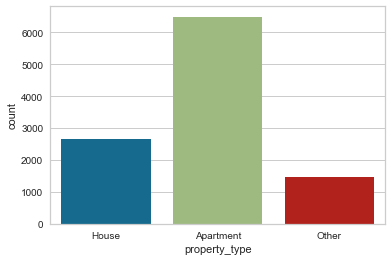

In [66]:
sns.countplot(train['property_type'])


 #### 3.2.2.4 Room_Type

In [67]:
train.loc[~train.room_type.isin(['Entire home/apt', 'Private room']), 'room_type'] = 'Other'



In [68]:
test.loc[~test.room_type.isin(['Entire home/apt', 'Private room']), 'room_type'] = 'Other'



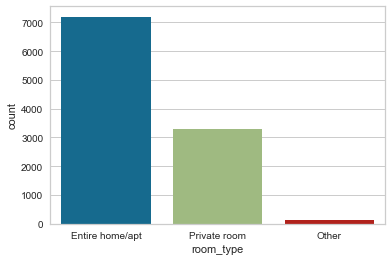

In [69]:
sns.countplot(train['room_type'])


 #### 3.2.2.5 Bed_type

In [70]:
train.loc[~train.bed_type.isin(['Real Bed']), 'bed_type'] = 'Other'



In [71]:
test.loc[~test.bed_type.isin(['Real Bed']), 'bed_type'] = 'Other'



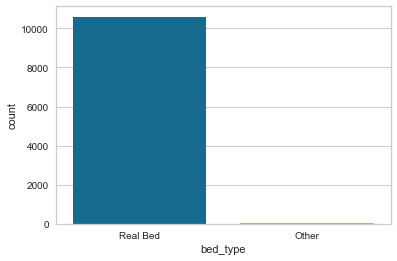

In [72]:
sns.countplot(train['bed_type'])


 #### 3.2.2.6 Bedrooms

In [73]:
train.loc[~train.bedrooms.isin(['1.0', '2.0', '3.0','4.0']), 'bedrooms'] = '5 or more'



In [74]:
test.loc[~test.bedrooms.isin(['1.0', '2.0', '3.0','4.0']), 'bedrooms'] = '5 or more'



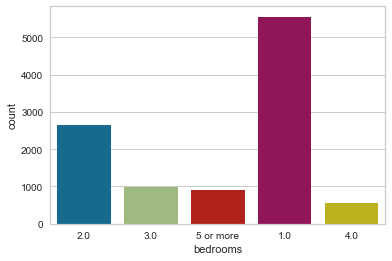

In [75]:
sns.countplot(train['bedrooms'])



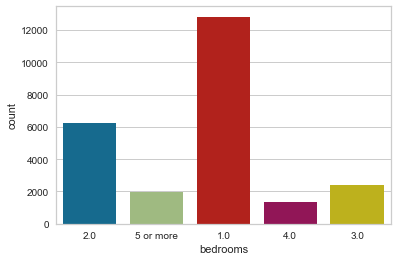

In [76]:
sns.countplot(test['bedrooms'])


 #### 3.2.2.7 Bathrooms

In [77]:
train.loc[~train.bathrooms.isin(['0.0', '0.5', '1.0','1.5', '2.0', '2.5']), 'bathrooms'] = '3.0 or more'



In [78]:
test.loc[~test.bathrooms.isin(['0.0', '0.5', '1.0','1.5','2.0', '2.5']), 'bathrooms'] = '3.0 or more'



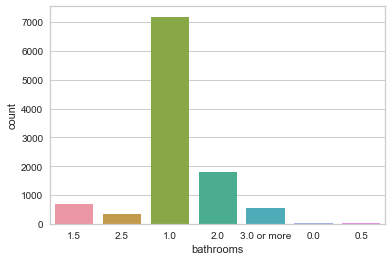

In [79]:
sns.countplot(train['bathrooms'])



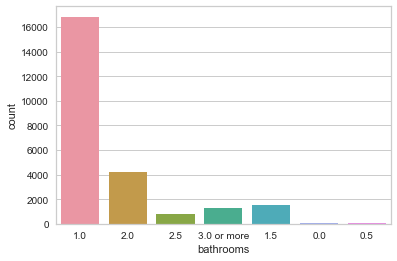

In [80]:
sns.countplot(test['bathrooms'])


 #### 3.2.2.8 Accomodates

In [81]:
train.loc[~train.accommodates.isin(['1','2','3','4','5','6','7','8']), 'accommodates'] = '9 or more'



In [82]:
test.loc[~test.accommodates.isin(['1', '2', '3','4', '5', '6', '7','8']), 'accommodates'] = '9 or more'



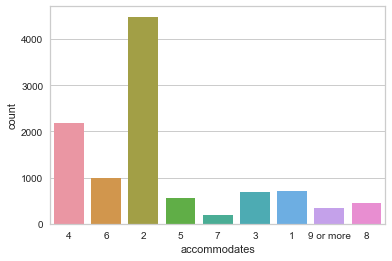

In [83]:
sns.countplot(train['accommodates'])



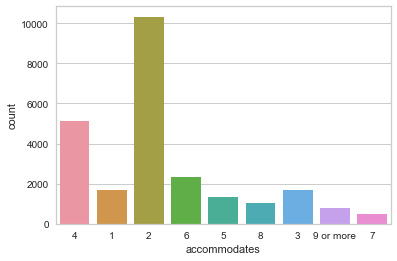

In [84]:
sns.countplot(test['accommodates'])


 #### 3.2.2.9 Beds

In [85]:
train.loc[~train.beds.isin(['1.0','2.0','3.0','4.0','5.0','6.0','7.0']), 'beds'] = '8 or more'



In [86]:
test.loc[~test.beds.isin(['1.0', '2.0', '3.0','4.0', '5.0', '6.0', '7.0']), 'beds'] = '8 or more'



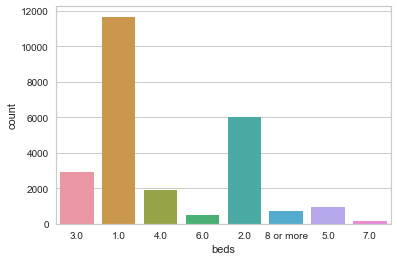

In [87]:
sns.countplot(test['beds'])



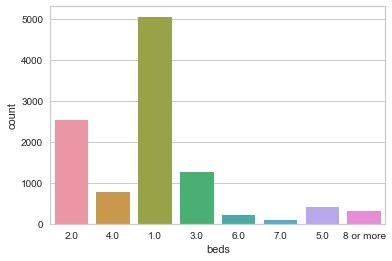

In [88]:
sns.countplot(train['beds'])


 #### 3.2.2.10 Guest_included

In [89]:
train.loc[~train.guests_included.isin(['1','2','3','4']), 'guests_included'] = '5 or more'



In [90]:
test.loc[~test.guests_included.isin(['1','2','3','4']), 'guests_included'] = '5 or more'



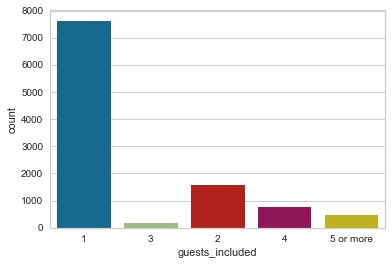

In [91]:
sns.countplot(train['guests_included'])



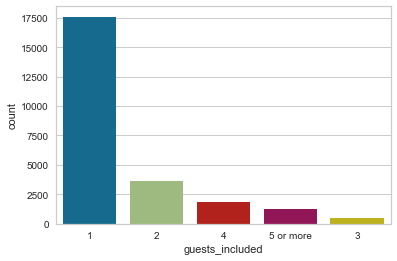

In [92]:
sns.countplot(test['guests_included'])


 #### 3.2.2.11 Neighbourhood_cleansed

In [93]:
# Note: with this method it's OK to have sparse categories
X_train = train.loc[train.index, 'neighbourhood_cleansed']
y_train = train.loc[:, 'log_price']

glmm = GLMMEncoder().fit(X_train, y_train) # we must use the training set for this
train['superGLMM'] = glmm.transform(train['neighbourhood_cleansed'])

# If the target is continuous, the encoder returns regularized difference of the observation’s category from the global mean



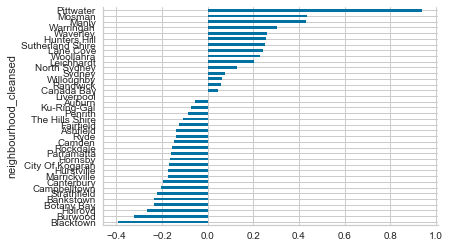

In [94]:
train.groupby('neighbourhood_cleansed')['superGLMM'].mean().sort_values().plot(kind='barh')
sns.despine()
plt.show()



In [95]:
search = train.groupby('neighbourhood_cleansed')['superGLMM'].mean().to_dict()



In [96]:
test['superGLMM'] = test['neighbourhood_cleansed'].map(search)



In [97]:
test['superGLMM']



10635    0.228298
10636    0.202951
10637    0.202951
10638   -0.173631
10639    0.305013
           ...   
35448    0.305013
35449    0.058203
35450    0.061849
35451    0.259762
35452    0.259762
Name: superGLMM, Length: 24818, dtype: float64

In [98]:
train.drop('neighbourhood_cleansed', inplace = True, axis = 1)
test.drop('neighbourhood_cleansed', inplace = True, axis = 1)

 ### 3.2.2.12 Review scores checkin

In [99]:
def convert_scores_buckets(val):
    if val == 'No Review':
        return 'No Review'
    elif val == 10.0:
        return '10.0'
    elif val == 9.0:
        return '9.0'
    elif val == 8.0:
        return '8.0'
    elif val < 8.0:
        return '7.0 or less'

train['review_scores_checkin'] = train['review_scores_checkin'].apply(convert_scores_buckets)
test['review_scores_checkin'] = test['review_scores_checkin'].apply(convert_scores_buckets)



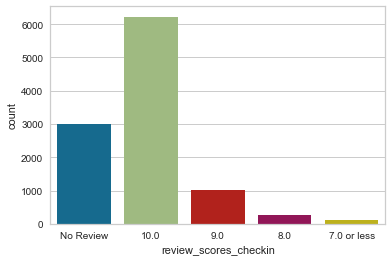

In [100]:
sns.countplot(train['review_scores_checkin'])



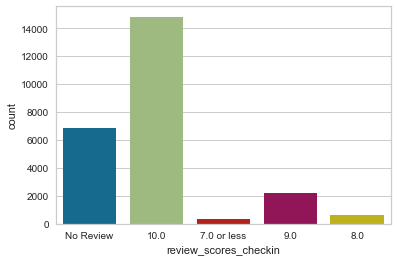

In [101]:
sns.countplot(test['review_scores_checkin'])


 ### 3.2.2.13 Review scores communication

In [102]:
def convert_scores_buckets(val):
    if val == 'No Review':
        return 'No Review'
    elif val == 10.0:
        return '10.0'
    elif val == 9.0:
        return '9.0'
    elif val == 8.0:
        return '8.0'
    elif val < 8.0:
        return '7.0 or less'

train['review_scores_communication'] = train['review_scores_communication'].apply(convert_scores_buckets)
test['review_scores_communication'] = test['review_scores_communication'].apply(convert_scores_buckets)



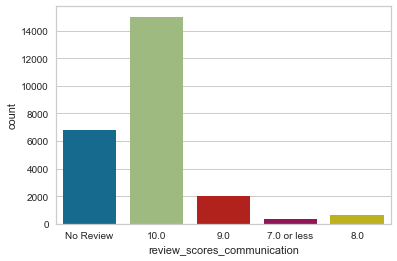

In [103]:
sns.countplot(test['review_scores_communication'])



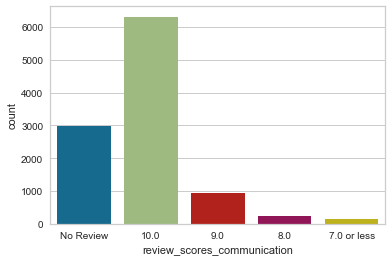

In [104]:
sns.countplot(train['review_scores_communication'])


 ### 3.2.2.14 Review scores location

In [105]:
def convert_scores_buckets(val):
    if val == 'No Review':
        return 'No Review'
    elif val == 10.0:
        return '10.0'
    elif val == 9.0:
        return '9.0'
    elif val == 8.0:
        return '8.0'
    elif val < 8.0:
        return '7.0 or less'

train['review_scores_location'] = train['review_scores_location'].apply(convert_scores_buckets)
test['review_scores_location'] = test['review_scores_location'].apply(convert_scores_buckets)



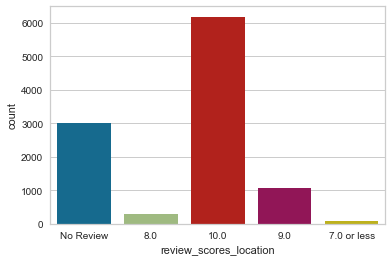

In [106]:
sns.countplot(train['review_scores_location'])



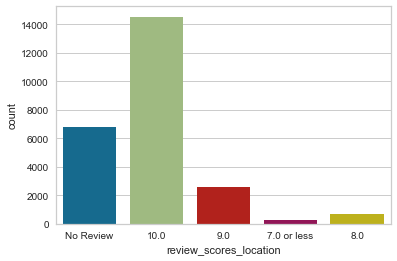

In [107]:
sns.countplot(test['review_scores_location'])


 ### 3.2.2.15 Cancellation policy

In [108]:
train.loc[~train.cancellation_policy.isin(['strict_14_with_grace_period','moderate','flexible']), 'cancellation_policy'] = 'others'



In [109]:
test.loc[~test.cancellation_policy.isin(['strict_14_with_grace_period','moderate','flexible']), 'cancellation_policy'] = 'others'



(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

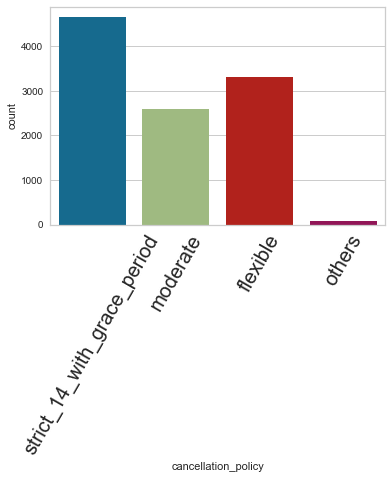

In [110]:
sns.countplot(train['cancellation_policy'])
plt.xticks(rotation = 60, fontsize = 20)



(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

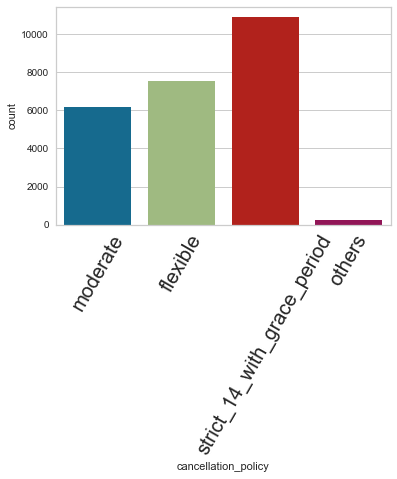

In [111]:
sns.countplot(test['cancellation_policy'])
plt.xticks(rotation = 60, fontsize = 20)


 ## 3.3 Categorical text data

 ### 3.3.1 Amenities

In [112]:
amenities_list = list(train.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)



In [113]:
train.loc[train['amenities'].str.contains('Suitable for events'), 'event'] = 1
train.loc[train['amenities'].str.contains('Exercise equipment|Gym'), 'exerciese'] = 1
train.loc[train['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'washers'] = 1
train.loc[train['amenities'].str.contains('Cooking basics'), 'cookingbasics'] = 1
train.loc[train['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
train.loc[train['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
train.loc[train['amenities'].str.contains('Kitchen|Outdoor kitchen'), 'kitchen'] = 1
train.loc[train['amenities'].str.contains('Laptop friendly workspace'), 'Laptop friendly workspace'] = 1
train.loc[train['amenities'].str.contains('Toilet paper'), 'Toilet paper'] = 1
train.loc[train['amenities'].str.contains('Body Soap|Shampoo'), 'Sanity'] = 1
train.loc[train['amenities'].str.contains('TV|Smart TV|Cable TV'), 'TV'] = 1
train.loc[train['amenities'].str.contains('Bed linens'), 'Bed related'] = 1
train.loc[train['amenities'].str.contains('Heating|Air Conditioning|Central air conditoning'), 'air conditioning'] = 1
train.loc[train['amenities'].str.contains('Hair dryer'), 'Hair dryer'] = 1
train.loc[train['amenities'].str.contains('Breakfast'), 'Breakfast'] = 1
train.loc[train['amenities'].str.contains('Wifi| Pocket Wifi'), 'wifi'] = 1
train.loc[train['amenities'].str.contains('Self check_in|24-hour check-in'), 'check_in'] = 1
train.loc[train['amenities'].str.contains('Driveway parking|Free parking on premises|Free street parking|Garage parking|Paid Parking off premises|Paid parking on premises|Outdoor parking'), 'Parking'] = 1
train.loc[train['amenities'].str.contains('Pets allowed|Pets live on this property|Other pet(s)|Cat(s)|Dog(s)'), 'Pet-friendly'] = 1
train.loc[train['amenities'].str.contains('Smoke detector|Carbon monoxide detector|Fire extinguisher|First aid kit'), 'Safe Facilities'] = 1
train.loc[train['amenities'].str.contains('Accessible-height bed|Accessible-height toilet|Wheelchair accessible|Step-free shower|Disabled parking spot|No stairs or steps to enter'), 'Accessibility'] = 1
train.loc[train['amenities'].str.contains('Baby bath|Baby monitor|Babysitter recommendations|Crib|High chair|Children’s books and toys|Children’s dinnerware'), 'Kid_friendly'] =1
train.loc[train['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
train.loc[train['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
train.loc[train['amenities'].str.contains('Smoking allowed'), 'Smoking allowed'] = 1



In [114]:
amenities_list = list(test.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)



test.loc[test['amenities'].str.contains('Suitable for events'), 'event'] = 1
test.loc[test['amenities'].str.contains('Exercise equipment|Gym'), 'exerciese'] = 1
test.loc[test['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'washers'] = 1
test.loc[test['amenities'].str.contains('Cooking basics'), 'cookingbasics'] = 1
test.loc[test['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
test.loc[test['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
test.loc[test['amenities'].str.contains('Kitchen|Outdoor kitchen'), 'kitchen'] = 1
test.loc[test['amenities'].str.contains('Laptop friendly workspace'), 'Laptop friendly workspace'] = 1
test.loc[test['amenities'].str.contains('Toilet paper'), 'Toilet paper'] = 1
test.loc[test['amenities'].str.contains('Body Soap|Shampoo'), 'Sanity'] = 1
test.loc[test['amenities'].str.contains('TV|Smart TV|Cable TV'), 'TV'] = 1
test.loc[test['amenities'].str.contains('Bed linens'), 'Bed related'] = 1
test.loc[test['amenities'].str.contains('Heating|Air Conditioning|Central air conditoning'), 'air conditioning'] = 1
test.loc[test['amenities'].str.contains('Hair dryer'), 'Hair dryer'] = 1
test.loc[test['amenities'].str.contains('Breakfast'), 'Breakfast'] = 1
test.loc[test['amenities'].str.contains('Wifi| Pocket Wifi'), 'wifi'] = 1
test.loc[test['amenities'].str.contains('Self check_in|24-hour check-in'), 'check_in'] = 1
test.loc[test['amenities'].str.contains('Driveway parking|Free parking on premises|Free street parking|Garage parking|Paid Parking off premises|Paid parking on premises|Outdoor parking'), 'Parking'] = 1
test.loc[test['amenities'].str.contains('Pets allowed|Pets live on this property|Other pet(s)|Cat(s)|Dog(s)'), 'Pet-friendly'] = 1
test.loc[test['amenities'].str.contains('Smoke detector|Carbon monoxide detector|Fire extinguisher|First aid kit'), 'Safe Facilities'] = 1
test.loc[test['amenities'].str.contains('Accessible-height bed|Accessible-height toilet|Wheelchair accessible|Step-free shower|Disabled parking spot|No stairs or steps to enter'), 'Accessibility'] = 1
test.loc[test['amenities'].str.contains('Baby bath|Baby monitor|Babysitter recommendations|Crib|High chair|Children’s books and toys|Children’s dinnerware'), 'Kid_friendly'] =1
test.loc[test['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
test.loc[test['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
test.loc[test['amenities'].str.contains('Smoking allowed'), 'Smoking allowed'] = 1



In [115]:
cols_to_replace_nulls = train.iloc[:,42:].columns
train[cols_to_replace_nulls] = train[cols_to_replace_nulls].fillna(0)
train.drop('amenities', axis = 1, inplace = True)



In [116]:
cols_to_replace_nulls = test.iloc[:,40:].columns
test[cols_to_replace_nulls] = test[cols_to_replace_nulls].fillna(0)
test.drop('amenities', axis = 1, inplace = True)



In [117]:
train.head()



price  log_price                                               name  \
0  450.0   6.109248                Beach House - quiet private complex   
1  170.0   5.135798                           Family home in Chatswood   
2  153.0   5.030438                     Fontaynes Studio in Sydney CBD   
3  301.0   5.707110  Light, airy Victorian Terrace House in Paddington   
4   55.0   4.007333                 Beautiful Comfortable Private Room   

                                             summary  \
0  Two double bedroom townhouse within 5 minutes ...   
1  Fantastically located family home next to publ...   
2  An ENTIRE studio ALL TO YOURSELF at Circular Q...   
3  Our home, in one of the most beautiful streets...   
4  A Modern house, close to train station and Sho...   

                                               space  \
0  A home from home nestled in Sydney's Northern ...   
1  A house very centrally located to both the Syd...   
2  Spacious for 1, roomy for 2, OK for 3, accommo...   
3                                                      
4  We are only 1 minutes walk from the bus stop a...   

                               neighborhood_overview  \
0  Quiet and much demanded Eastern Hill location....   
1  Chatswood is a great neighbourhood, full of re...   
2  Ideally placed in Circular Quay, you'll be in ...   
3                                                      
4                                                      

                                               notes  \
0                                                      
1  Public parking is available immediately in fro...   
2  This is a private unit ALL TO YOURSELF and you...   
3                                                      
4                                                      

                                             transit  \
0  Walk to 4 beaches to surf, swim, snorkel or st...   
1  The house is located a few minutes walk from e...   
2  Needless to say, surrounded by trains, cabs an...   
3                                                      
4                                                      

                                              access  \
0  Free WiFi, 50" Flat Screen TV, microwave, oven...   
1                      The whole house is available.   
2  You will be allowed to access the: - Lobby - L...   
3                                                      
4  There is 'Free' on street parking in the Stree...   

                                         interaction  \
0    Whole house and left alone to enjoy your break.   
1  We will be travelling, but will have someone a...   
2  I only interact with guests via AirBnb, What's...   
3                                                      
4  We can help you with advice of the best Sydney...   

                                         house_rules  host_since  \
0  Respect the space and treat our home as you wo...  2014-09-29   
1  Common sense, just treat the house as you expe...  2014-07-03   
2  STRICTLY NO PETS, SMOKING, HOUSE PARTIES, YELL...  2013-08-30   
3  Strictly no parties allowed, quiet after 10pm....  2013-06-20   
4  The only thing we ask is that there are no dru...  2015-06-29   

   host_response_time host_response_rate host_is_superhost  \
0              others            unknown                 f   
1  within a few hours                100                 f   
2      within an hour                100                 f   
3        within a day              50-89                 f   
4      within an hour                100                 f   

                                  host_verifications host_identity_verified  \
0                                 ['email', 'phone']                      f   
1  ['email', 'phone', 'reviews', 'jumio', 'govern...                      t   
2  ['phone', 'reviews', 'jumio', 'selfie', 'gover...                      f   
3  ['email', 'phone', 'reviews', 'jumio', 'govern...                      t   
4  ['email', 'phone', 

In [118]:
test.head()


name  \
10635                    The perfect Sydney NYE base   
10636            Secure comfortable studio apartment   
10637     TRENDY BALMAIN TERRACE - 5 STAR SUPERHOSTS   
10638  Light, spacious room in a large terrace house   
10639                          Curl Curl Beach House   

                                                 summary  \
10635  Bright cosy home a stone's throw from the beau...   
10636  Cute secure studio apartment. Very clean, clos...   
10637  This newly renovated stylish terrace house is ...   
10638  One spacious, light and airy bedroom in a four...   
10639  Modern house , 1 street from Curl Curl Beach. ...   

                                                   space  \
10635                                                      
10636                                                      
10637  Contemporary, clean and stylishly designed hom...   
10638  The large bedroom is light and cool with high ...   
10639  Unparalleled views with proximity to the beach...   

                                   neighborhood_overview  \
10635                                                      
10636                                                      
10637  The highly sought after location of Balmain is...   
10638  Newtown is a trendy neighbourhood well known t...   
10639  Relaxed Beachside community but close to the a...   

                                                   notes  \
10635                                                      
10636                                                      
10637  An excellent quiet location in a very walkable...   
10638  The two bathrooms are shared with the hosts es...   
10639                                                      

                                                 transit  \
10635                                                      
10636                                                      
10637  Only 5km (up to 10mins) from the CBD and 20km ...   
10638  We are two minutes from buses on King Street, ...   
10639  5 minute drive to Manly, 2 minute walk to beac...   

                                                  access  \
10635                                                      
10636                                                      
10637  We provide automatic discounts for weekly or l...   
10638  The house has a peaceful, lush green court yar...   
10639                                                      

                                             interaction  \
10635                                                      
10636                                                      
10637  We are a quiet full-time professional couple a...   
10638  While we respect your privacy and space, we ar...   
10639  A nearby point of contact will be arranged for...   

                                             house_rules  host_since  \
10635                                                     2015-09-24   
10636                                                     2015-03-17   
10637  WELCOME! This is a beautiful home away from ho...  2014-05-22   
10638  Common courtesy of respecting shared space is ...  2015-12-20   
10639          Treat the house as though it is your own!  2016-03-07   

      host_response_time host_response_rate host_is_superhost  \
10635             others            unknown                 f   
10636             others            unknown                 f   
10637     within an hour                100                 t   
10638     within an hour                100                 t   
10639             others            unknown                 f   

                                      host_verifications  \
10635  ['email', 'phone', 'reviews', 'jumio', 'govern...   
10636       ['email', 'phone', 'jumio', 'government_id']   
10637  ['email', 'phone', 'reviews', 'jumio', 'govern...   
10638  ['email', 'phone', 'reviews', 'jumio', 'offlin...   
10639  ['email', 'phone', 'reviews', 'jumio', 'offlin...   


 ### 3.3.2 host_verification

In [119]:
train.drop('host_verifications', axis = 1, inplace = True)



In [120]:
test.drop('host_verifications', axis = 1, inplace = True)


 ### 3.3.3 Host since

In [121]:
train['host_since'] = pd.to_datetime(train['host_since'])



In [122]:
train['host_since_age'] = train['host_since'].dt.year.max() - train['host_since'].dt.year



In [123]:
train['host_since_age']



0        6
1        6
2        7
3        7
4        5
        ..
10630    5
10631    1
10632    1
10633    3
10634    6
Name: host_since_age, Length: 10635, dtype: int64

In [124]:
train.drop('host_since', axis = 1 , inplace = True)



In [125]:
test['host_since'] = pd.to_datetime(test['host_since'])
test['host_since_age'] = test['host_since'].dt.year.max() - test['host_since'].dt.year
test.drop('host_since', axis = 1 , inplace = True)


 ### 3.3.4 House rules

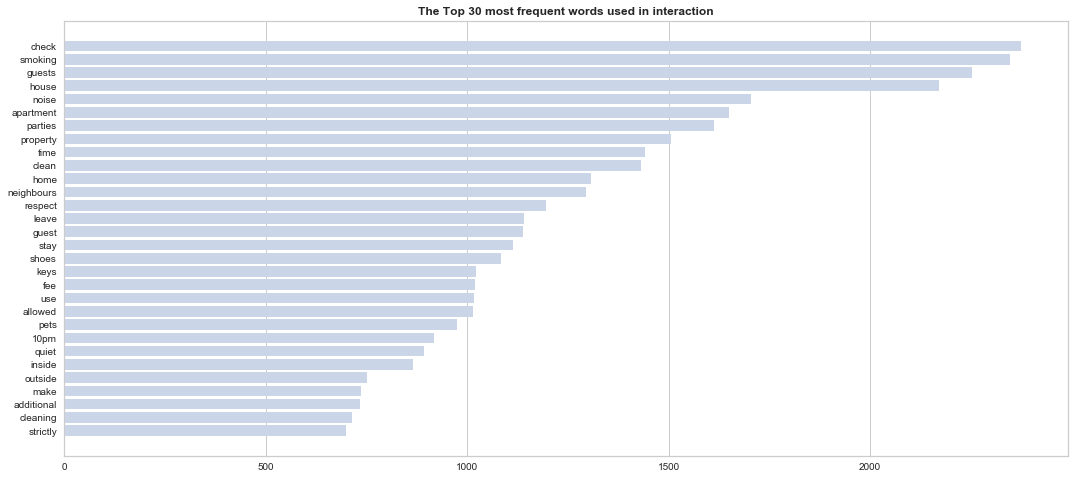

In [126]:
rules = train['house_rules'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(rules)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in interaction', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [127]:
train.drop('house_rules', axis = 1 , inplace = True)



In [128]:
test.drop('house_rules', axis = 1 , inplace = True)


 ### 3.3.5 Interaction

In [129]:
interac = train['interaction'].tolist()



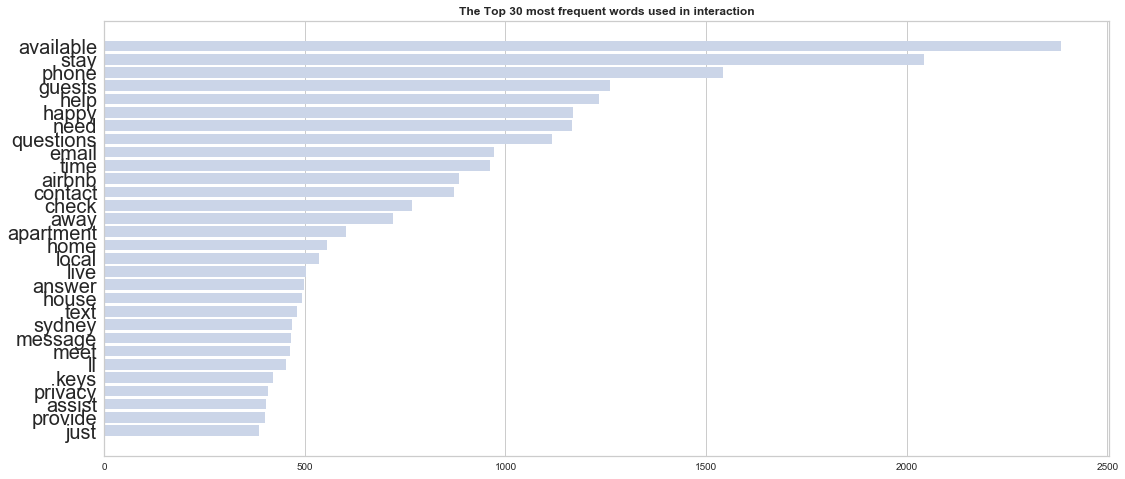

In [130]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(interac)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in interaction', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [131]:
train.loc[train['interaction'].str.contains('available|help|assist|contact'), 'host_interaction'] = 1



In [132]:
train['host_interaction'] = train['host_interaction'].fillna(0)



In [133]:
train['host_interaction'].value_counts()



0.0    6816
1.0    3819
Name: host_interaction, dtype: int64

In [134]:
test.loc[test['interaction'].str.contains('available|help|assist|contact'), 'host_interaction'] = 1
test['host_interaction'] = test['host_interaction'].fillna(0)



In [135]:
train.drop('interaction', axis = 1 , inplace = True)
test.drop('interaction', axis = 1 , inplace = True)


 ### 3.3.6 Space

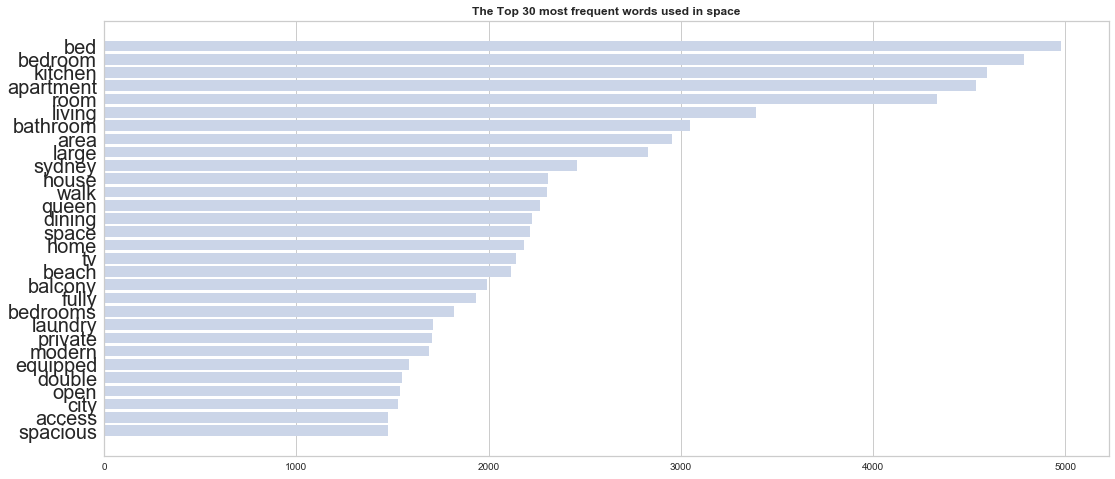

In [136]:
spz = train['space'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(spz)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in space', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# we want to drop because it overlaps with amenities



In [137]:
train.drop('space', axis = 1, inplace = True)
test.drop('space', axis = 1, inplace = True)


 ### 3.3.7 access

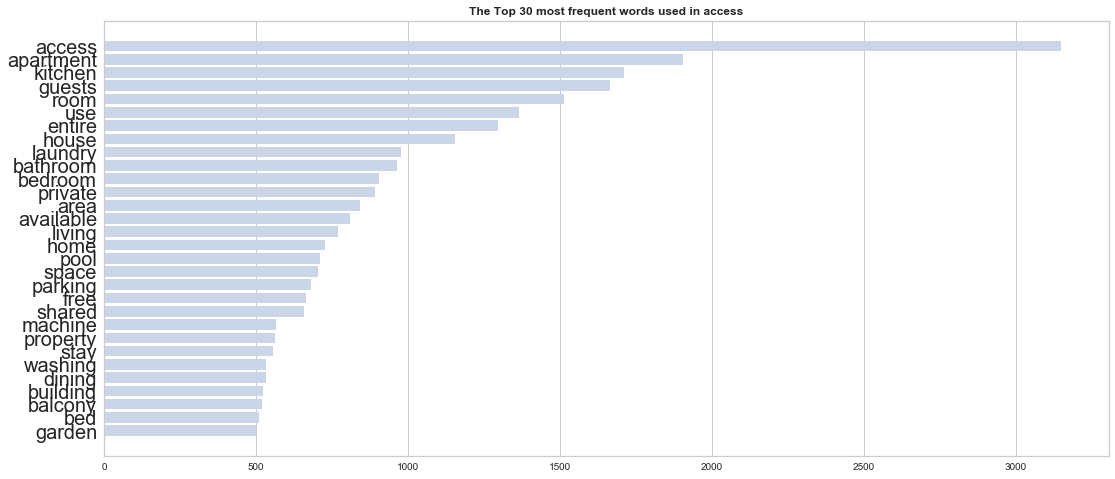

In [138]:
acs = train['access'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(acs)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in access', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [139]:
train.drop('access', axis = 1, inplace = True)
test.drop('access', axis = 1, inplace = True)


 ### 3.3.8 neighbourhood overview

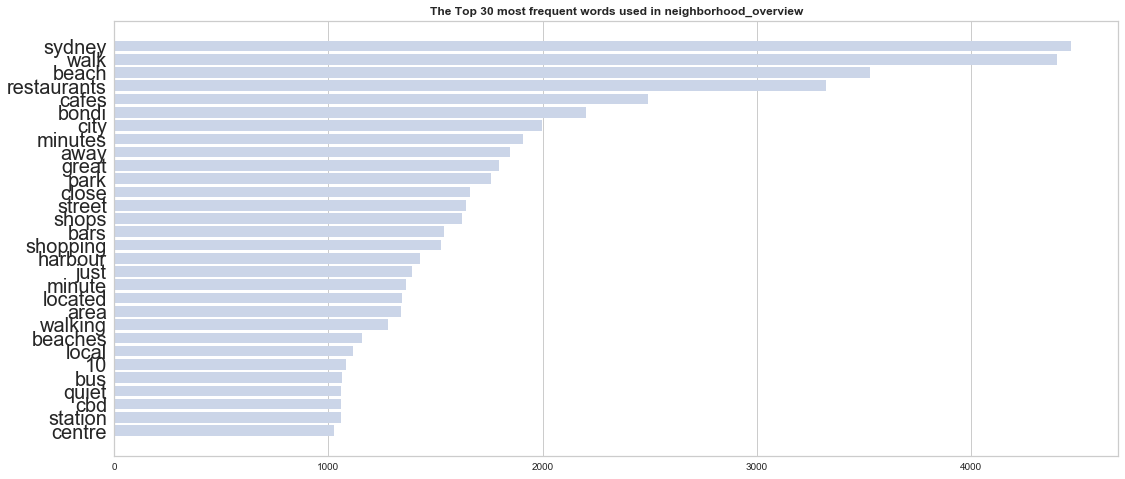

In [140]:
neigh = train['neighborhood_overview'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neigh)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in neighborhood_overview', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [141]:
train['neighborhood_overview'][1]



'Chatswood is a great neighbourhood, full of restaurants and shopping. The house is a comfortable and quick walking distance from the CBD area.'

In [142]:
train.loc[train['neighborhood_overview'].str.contains('restaurants|cafes|shops|bars|shopping'), 'AC_prox_essentials'] = 1
train['AC_prox_essentials'] = train['AC_prox_essentials'].fillna(0)



In [143]:
test.loc[test['neighborhood_overview'].str.contains('restaurants|cafes|shops|bars|shopping'), 'AC_prox_essentials'] = 1
test['AC_prox_essentials'] = test['AC_prox_essentials'].fillna(0)



In [144]:
train.drop('neighborhood_overview', axis = 1, inplace = True)
test.drop('neighborhood_overview', axis = 1, inplace = True)


 ### 3.3.9 transit

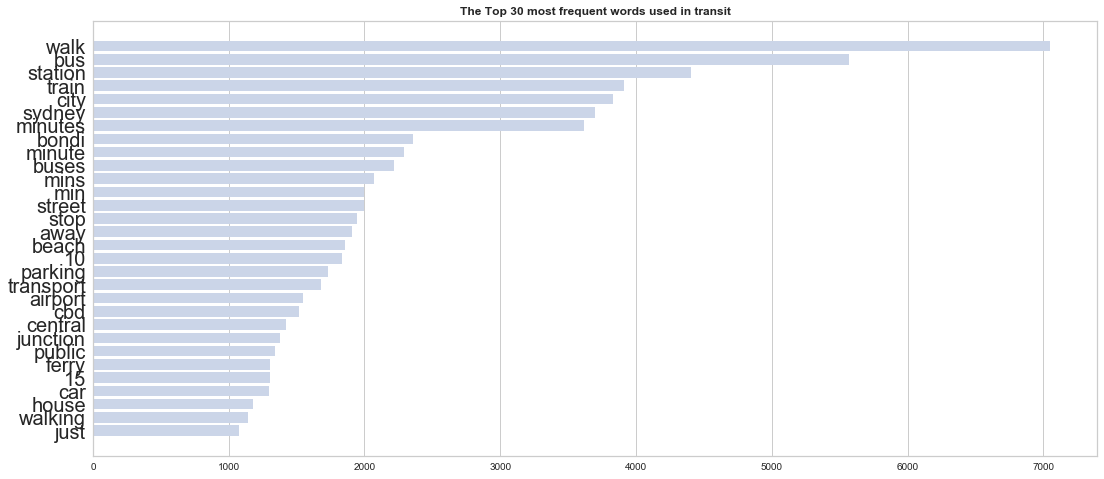

In [145]:
trans = train['transit'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(trans)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in transit', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [146]:
train.loc[train['transit'].str.contains('bus|station|train'), 'public_transport'] = 1
train['public_transport'] = train['public_transport'].fillna(0)

test.loc[test['transit'].str.contains('bus|station|train'), 'public_transport'] = 1
test['public_transport'] = test['public_transport'].fillna(0)



In [147]:
train.drop('transit', axis = 1, inplace = True)
test.drop('transit', axis = 1, inplace = True)


 ### 3.3.10 notes

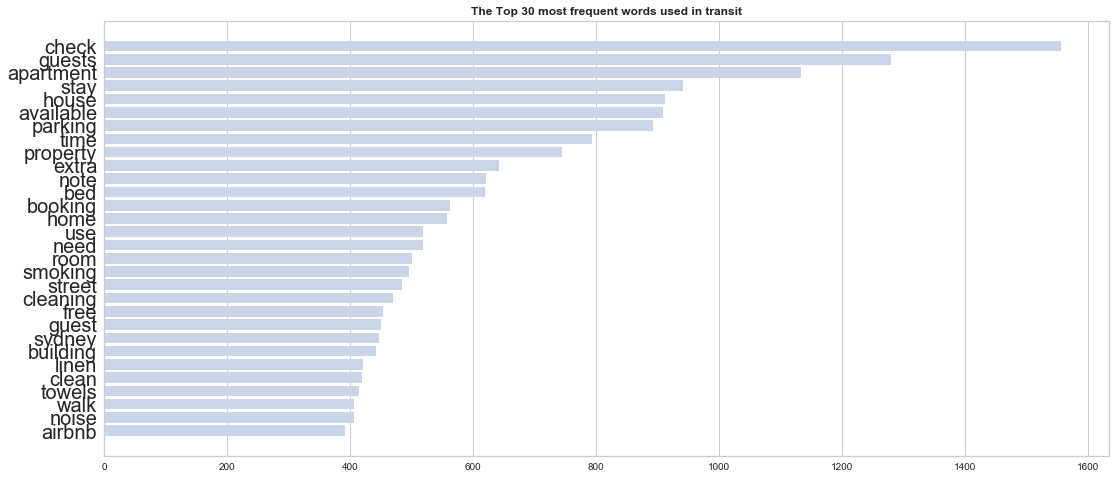

In [148]:
notes = train['notes'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(notes)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in transit', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [149]:
train.drop('notes', axis = 1, inplace = True)
test.drop('notes', axis = 1, inplace = True)


 ### 3.3.11 Summary

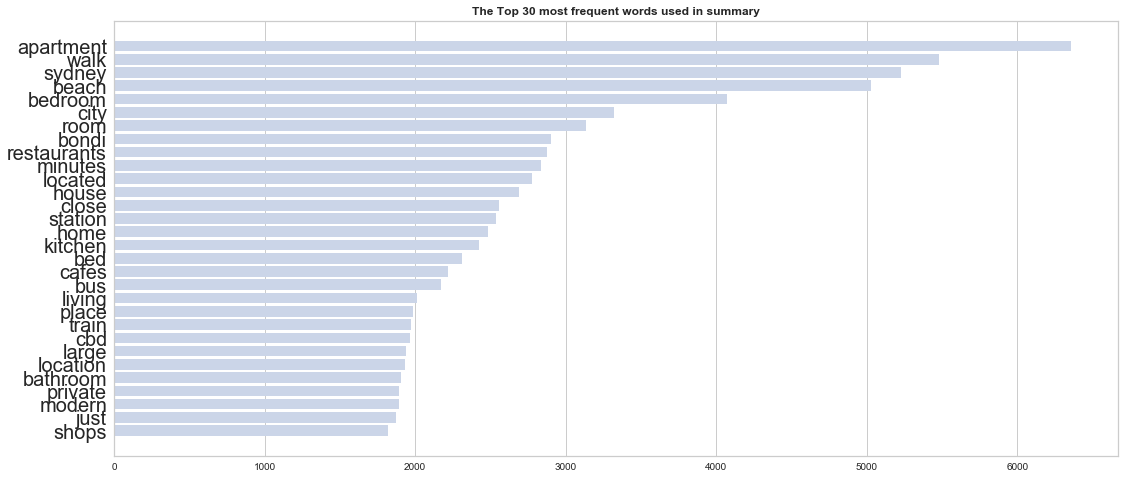

In [150]:
summary = train['summary'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(summary)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in summary', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [151]:
train.drop('summary', axis = 1, inplace = True)
test.drop('summary', axis = 1, inplace = True)



In [152]:
train.head()



price  log_price                                               name  \
0  450.0   6.109248                Beach House - quiet private complex   
1  170.0   5.135798                           Family home in Chatswood   
2  153.0   5.030438                     Fontaynes Studio in Sydney CBD   
3  301.0   5.707110  Light, airy Victorian Terrace House in Paddington   
4   55.0   4.007333                 Beautiful Comfortable Private Room   

   host_response_time host_response_rate host_is_superhost  \
0              others            unknown                 f   
1  within a few hours                100                 f   
2      within an hour                100                 f   
3        within a day              50-89                 f   
4      within an hour                100                 f   

  host_identity_verified is_location_exact property_type        room_type  \
0                      f                 t         House  Entire home/apt   
1                      t                 t         House  Entire home/apt   
2                      f                 t     Apartment  Entire home/apt   
3                      t                 t         House  Entire home/apt   
4                      t                 t         House     Private room   

  accommodates bathrooms   bedrooms beds  bed_type  security_deposit_perc  \
0            4       1.5        2.0  2.0  Real Bed                    0.0   
1            6       2.5        3.0  4.0  Real Bed                  588.0   
2            4       1.0  5 or more  2.0  Real Bed                  130.0   
3            6       1.0        3.0  4.0  Real Bed                    0.0   
4            2       2.0        1.0  1.0  Real Bed                  273.0   

   cleaning_fee_perc guests_included  extra_people_perc  minimum_nights  \
0               15.0               1                0.0               7   
1               59.0               1                0.0               2   
2               52.0               3               12.0               1   
3               50.0               1                0.0               3   
4               55.0               1               36.0               2   

   maximum_nights  availability_60  number_of_reviews_ltm  \
0            1125                0                      0   
1              19                0                      1   
2            1124               41                     54   
3              36               26                      0   
4            1125               59                      1   

  review_scores_rating review_scores_checkin review_scores_communication  \
0            No Review             No Review                   No Review   
1               90-100                  10.0                        10.0   
2                80-90                   9.0                         9.0   
3            No Review             No Review                   No Review   
4               90-100                  10.0                        10.0   

  review_scores_location instant_bookable          cancellation_policy  \
0              No Review                f  strict_14_with_grace_period   
1                    8.0                f  strict_14_with_grace_period   
2                   10.0                t  strict_14_with_grace_period   
3              No Review                f  strict_14_with_grace_period   
4                    9.0                f  strict_14_with_grace_period   

   calculated_host_listings_count  superGLMM  event  exerciese  washers  \
0                               1   0.430717    0.0        0.0      1.0   
1                               1   0.061849    0.0        0.0      1.0   
2                              22   0.075415    0.0        0.0      1.0   
3                               1   0.228298    0.0        0.0      1.0   
4                               2  -0.391756    0.0        0.0      1.0   

   cookingbasics  coffee_machine  bbq  kitchen  Laptop friendly workspace  \
0          

In [153]:
train.drop('name', axis = 1, inplace = True)
test.drop('name', axis = 1, inplace = True)



In [154]:
train.head()


price  log_price  host_response_time host_response_rate host_is_superhost  \
0  450.0   6.109248              others            unknown                 f   
1  170.0   5.135798  within a few hours                100                 f   
2  153.0   5.030438      within an hour                100                 f   
3  301.0   5.707110        within a day              50-89                 f   
4   55.0   4.007333      within an hour                100                 f   

  host_identity_verified is_location_exact property_type        room_type  \
0                      f                 t         House  Entire home/apt   
1                      t                 t         House  Entire home/apt   
2                      f                 t     Apartment  Entire home/apt   
3                      t                 t         House  Entire home/apt   
4                      t                 t         House     Private room   

  accommodates bathrooms   bedrooms beds  bed_type  security_deposit_perc  \
0            4       1.5        2.0  2.0  Real Bed                    0.0   
1            6       2.5        3.0  4.0  Real Bed                  588.0   
2            4       1.0  5 or more  2.0  Real Bed                  130.0   
3            6       1.0        3.0  4.0  Real Bed                    0.0   
4            2       2.0        1.0  1.0  Real Bed                  273.0   

   cleaning_fee_perc guests_included  extra_people_perc  minimum_nights  \
0               15.0               1                0.0               7   
1               59.0               1                0.0               2   
2               52.0               3               12.0               1   
3               50.0               1                0.0               3   
4               55.0               1               36.0               2   

   maximum_nights  availability_60  number_of_reviews_ltm  \
0            1125                0                      0   
1              19                0                      1   
2            1124               41                     54   
3              36               26                      0   
4            1125               59                      1   

  review_scores_rating review_scores_checkin review_scores_communication  \
0            No Review             No Review                   No Review   
1               90-100                  10.0                        10.0   
2                80-90                   9.0                         9.0   
3            No Review             No Review                   No Review   
4               90-100                  10.0                        10.0   

  review_scores_location instant_bookable          cancellation_policy  \
0              No Review                f  strict_14_with_grace_period   
1                    8.0                f  strict_14_with_grace_period   
2                   10.0                t  strict_14_with_grace_period   
3              No Review                f  strict_14_with_grace_period   
4                    9.0                f  strict_14_with_grace_period   

   calculated_host_listings_count  superGLMM  event  exerciese  washers  \
0                               1   0.430717    0.0        0.0      1.0   
1                               1   0.061849    0.0        0.0      1.0   
2                              22   0.075415    0.0        0.0      1.0   
3                               1   0.228298    0.0        0.0      1.0   
4                               2  -0.391756    0.0        0.0      1.0   

   cookingbasics  coffee_machine  bbq  kitchen  Laptop friendly workspace  \
0            0.0             0.0  0.0      1.0                        0.0   
1            1.0             0.0  1.0      1.0                        0.0   
2            1.0             0.0  0.0      1.0                        1.0   
3            0.0             0.0  0.0      1.0                        1.0   
4            0.0             0.0  0.0   

In [155]:
print(len(train.columns))
print(len(test.columns))

59
57


 ## 3.4 Get_dummies

In [156]:
categorical = train.select_dtypes(include=object).columns.tolist()



In [157]:
categorical



['host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_identity_verified',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'guests_included',
 'review_scores_rating',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'instant_bookable',
 'cancellation_policy']

In [158]:
train = pd.get_dummies(train, columns = categorical)



In [159]:
test = pd.get_dummies(test, columns = categorical)



 # 3.5 Numerical variables

 def convert_dummy(val):
     if val == 0:
         return 0
     else:
         return 1

 train['sec_interact'] = train['security_deposit_perc'].apply(convert_dummy)

In [160]:
yj = PowerTransformer(method='yeo-johnson') # YJ is the default, this function also does Box-Cox


In [161]:
log_var = ['security_deposit_perc', 'cleaning_fee_perc', 'extra_people_perc', 'availability_60', 'calculated_host_listings_count', 'number_of_reviews_ltm']

for i in range(len(log_var)):
    train['yj_{}'.format(log_var[i])]  = yj.fit_transform(np.array(train[log_var[i]]).reshape(-1,1))
    test['yj_{}'.format(log_var[i])]  = yj.fit_transform(np.array(test[log_var[i]]).reshape(-1,1))
    train.drop(log_var[i], axis = 1, inplace = True)
    test.drop(log_var[i], axis = 1, inplace = True)

 # 4.0 Methodology

In [162]:
X_train = train.drop(['price', 'log_price'], axis = 1)

logy_train = train['log_price']
y_train = train['price']

X_test = test



In [163]:
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

 # 4.1 XGBoost

In [164]:
%%time

model = xgb.XGBRegressor(objective='reg:squarederror')

search_space = {
    'reg_lambda': Real(1e-10, 1e12, 'log-uniform'),
    'learning_rate': Real(0.005, 0.1),
    'n_estimators' : Integer(100, 5000),
    'max_depth' : Integer(2, 8),
    'subsample' : Real(0.5, 1.0),
    'colsample_bytree' : Real(0.25, 1.0),
}

np.random.seed(8)
xbst_opt =  BayesSearchCV(model, search_space, cv = 5,  n_iter=10, scoring = 'neg_mean_squared_error', n_jobs=-1)
xbst_opt.fit(X_train, logy_train)
xbst_opt.best_params_

Wall time: 9min 17s


OrderedDict([('colsample_bytree', 0.2584131452300509),
             ('learning_rate', 0.024013725668485093),
             ('max_depth', 5),
             ('n_estimators', 2603),
             ('reg_lambda', 0.0003196401163916304),
             ('subsample', 0.604705365357568)])

In [165]:
xgboost = xgb.XGBRegressor(**xbst_opt.best_params_, objective='reg:squarederror')
xgboost.fit(X_train, np.ravel(logy_train))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2584131452300509, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.024013725668485093, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2603, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.0003196401163916304, scale_pos_weight=1,
             subsample=0.604705365357568, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [166]:
xgboost_cv_rmse = np.sqrt(-1*np.mean(cross_val_score(xgboost, X_train, np.ravel(logy_train),
                                                  cv=5, scoring='neg_mean_squared_error')))

xgboost_cv_rmse

0.32548781479447925

In [167]:
rmse = np.sqrt(mean_squared_error(logy_train, xgboost.predict(X_train)))
rmse

0.1934335634585589

In [168]:
xg_pred = xgboost.predict(X_test)
xg_pred = np.exp(xg_pred)

In [169]:
submission_xgb=pd.DataFrame(columns=['id', 'price'])
submission_xgb['id']=range(0, len(test))
submission_xgb['price']=xg_pred
submission_xgb=submission_xgb.set_index(['id'])
submission_xgb.head()

price
id            
0   236.845642
1   103.978592
2    77.251030
3    72.368919
4   621.309570

In [170]:
# submission_xgb.to_csv('XGBoost_ver8.csv')

In [171]:
print(xgboost.feature_importances_)

[0.00286543 0.00234136 0.00880224 0.00221987 0.00231649 0.00211902
 0.00139526 0.00230425 0.00276423 0.00271527 0.00157713 0.00220479
 0.00193033 0.00512751 0.00159628 0.00270995 0.00214088 0.00200855
 0.00246664 0.00179654 0.00187151 0.00174079 0.00209023 0.00168693
 0.00208361 0.00165667 0.00348663 0.00300274 0.00232138 0.00171954
 0.0015709  0.0019093  0.00214957 0.00256223 0.00210027 0.00241008
 0.00198755 0.00204287 0.00203176 0.00263587 0.00218994 0.0026716
 0.00183048 0.00158612 0.00155449 0.00152291 0.00167253 0.00179221
 0.01037233 0.01297073 0.00354027 0.07261979 0.00354281 0.11406169
 0.01507375 0.02960448 0.00317989 0.00554736 0.00236603 0.01049768
 0.00387969 0.03448164 0.03354878 0.00403179 0.0016617  0.04888082
 0.00356297 0.01020691 0.0029847  0.07974511 0.06948701 0.018673
 0.01950005 0.03347672 0.00673182 0.05133371 0.01300891 0.00455806
 0.00193266 0.0075538  0.01055572 0.00509345 0.00221712 0.00147692
 0.00155071 0.00607927 0.00377119 0.0016446  0.00396149 0.0086312

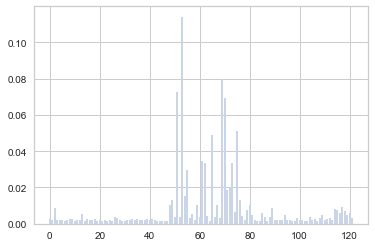

In [172]:
plt.bar(range(len(xgboost.feature_importances_)), xgboost.feature_importances_)
plt.show()

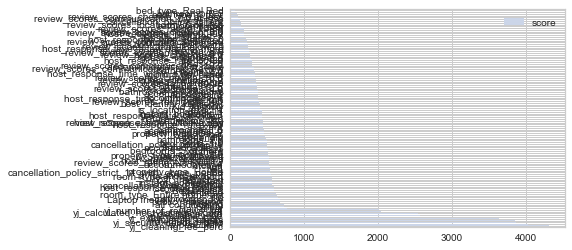

In [173]:
feature_important = xgboost.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [174]:
data

score
yj_cleaning_fee_perc                              4318
superGLMM                                         4029
yj_security_deposit_perc                          3862
maximum_nights                                    3847
minimum_nights                                    3636
yj_extra_people_perc                              2589
yj_availability_60                                2573
host_since_age                                    2535
yj_calculated_host_listings_count                 2035
yj_number_of_reviews_ltm                          2005
Hair dryer                                         763
Sanity                                             724
air conditioning                                   721
Parking                                            674
public_transport                                   670
Laptop friendly workspace                          665
bathrooms_1.0                                      641
TV                                                 630
room_type_Entire home/apt                          622
exerciese                                          608
Bed related                                        595
cookingbasics                                      590
host_response_time_others                          586
cancellation_policy_flexible                       567
coffee_machine                                     567
instant_bookable_f                                 564
Breakfast                                          563
host_interaction                                   562
room_type_Private room                             562
is_location_exact_f                                555
cancellation_policy_strict_14_with_grace_period    542
property_type_House                                536
bbq                                                535
wifi                                               530
kitchen                                            528
accommodates_4                                     525
review_scores_rating_No Review                     524
host_identity_verified_f                           522
AC_prox_essentials                                 520
Smoking allowed                                    520
property_type_Apartment                            514
bedrooms_2.0                                       505
washers                                            504
bedrooms_5 or more                                 502
Safe Facilities                                    497
accommodates_1                                     495
cancellation_policy_moderate                       493
bedrooms_1.0                                       491
beds_1.0                                           489
bathrooms_2.0                                      482
Pet-friendly                                       474
beds_2.0                                           462
property_type_Other                                457
accommodates_2                                     454
accommodates_6                                     450
bathrooms_1.5                                      445
event                                              445
host_response_rate_100                             442
host_response_time_within a day                    441
review_scores_checkin_No Review                    440
bedrooms_3.0                                       440
nature_and_views                                   427
host_response_rate_unknown                         425
guests_included_1                                  424
instant_bookable_t                                 423
check_in                                           422
is_location_exact_t                                406
Kid_friendly                                       404
balcony                                            399
host_identity_verified_t                           388
review_scores_rating_90-100                        387
beds_3.0                                           379
host_response_time_within an hour 

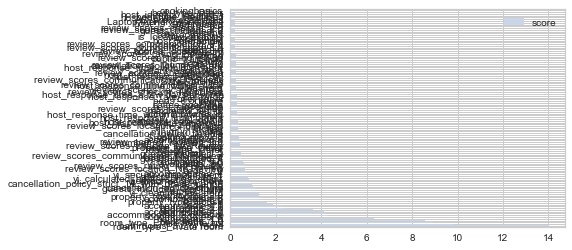

In [175]:
feature_important = xgboost.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [176]:
data

score
room_type_Private room                           14.039013
bathrooms_3.0 or more                             9.815237
room_type_Entire home/apt                         8.938235
bedrooms_1.0                                      8.552644
beds_1.0                                          6.318288
bathrooms_1.0                                     6.016380
accommodates_8                                    4.244092
accommodates_9 or more                            4.129271
bedrooms_4.0                                      4.120402
accommodates_2                                    3.643797
bedrooms_3.0                                      2.400117
bedrooms_2.0                                      2.298322
accommodates_1                                    1.855316
beds_2.0                                          1.601171
property_type_House                               1.596472
beds_6.0                                          1.299226
accommodates_6                                    1.292082
property_type_Apartment                           1.276654
bathrooms_2.0                                     1.256293
yj_cleaning_fee_perc                              1.105666
superGLMM                                         1.083403
guests_included_5 or more                         1.062352
cancellation_policy_others                        0.997272
beds_5.0                                          0.929741
cancellation_policy_strict_14_with_grace_period   0.923925
yj_extra_people_perc                              0.868749
bedrooms_5 or more                                0.828570
yj_calculated_host_listings_count                 0.762596
guests_included_1                                 0.748252
yj_security_deposit_perc                          0.723727
accommodates_4                                    0.682784
TV                                                0.631107
beds_7.0                                          0.626915
review_scores_location_No Review                  0.606710
review_scores_rating_No Review                    0.586153
yj_availability_60                                0.584008
beds_3.0                                          0.561018
bathrooms_0.0                                     0.496243
guests_included_4                                 0.487590
accommodates_7                                    0.477522
review_scores_communication_No Review             0.466660
guests_included_2                                 0.464168
bathrooms_1.5                                     0.438539
room_type_Other                                   0.436059
property_type_Other                               0.435745
nature_and_views                                  0.429143
review_scores_checkin_No Review                   0.408148
yj_number_of_reviews_ltm                          0.403627
review_scores_location_9.0                        0.399236
accommodates_3                                    0.391389
Smoking allowed                                   0.369585
bathrooms_2.5                                     0.367364
cancellation_policy_flexible                      0.362241
minimum_nights                                    0.352684
bbq                                               0.340229
kitchen                                           0.334202
air conditioning                                  0.333547
review_scores_location_7.0 or less                0.329101
host_response_rate_unknown                        0.328827
host_response_rate_90-99                          0.324429
instant_bookable_t                                0.322661
host_response_time_others                         0.315366
wifi                                              0.303600
host_response_time_within a few hours             0.296639
accommodates_5                                    0.291217
maximum_nights                                    0.288181
review_scores_rating_80-90                        0.285790
host_since_age                           

## 4.2 Lasso

In [177]:
scaled_xtrain = RobustScaler().fit_transform(X_train)
scaled_xtest = RobustScaler().fit_transform(X_test)

In [178]:
alphas = np.exp(np.linspace(-20, 0, 101))
lasso_cv = LassoCV(cv=5, alphas=alphas).fit(scaled_xtrain, np.ravel(logy_train))

In [179]:
print('Lasso Lamba: {0}'.format(lasso_cv.alpha_))

Lasso Lamba: 0.00027465356997214254


In [180]:
lasso=Lasso(alpha=lasso_cv.alpha_)
lasso.fit(scaled_xtrain, np.ravel(logy_train))

Lasso(alpha=0.00027465356997214254)

In [181]:
lasso_cvrmse = np.sqrt(-1*np.mean(cross_val_score(lasso, scaled_xtrain, np.ravel(logy_train),
                                  cv=5, scoring='neg_mean_squared_error')))
lasso_cvrmse

0.4048286581763618

In [182]:
lasso_train_rmsle=np.sqrt(mean_squared_error(logy_train, lasso.predict(scaled_xtrain)))
lasso_train_rmsle

0.4006917897730077

In [183]:
LASSO_logpred=lasso.predict(scaled_xtest)

In [184]:
LASSO_pred=np.expm1(LASSO_logpred)

In [185]:
submission_lasso=pd.DataFrame(columns=['id', 'price'])
submission_lasso['id']=range(0, len(test))
submission_lasso['price']=LASSO_pred
submission_lasso=submission_lasso.set_index(['id'])
submission_lasso.head()

price
id            
0   204.467972
1   109.066758
2    96.263788
3    77.843002
4   500.527310

In [186]:
coefficients = lasso.coef_

In [187]:
from sklearn.feature_selection import SelectFromModel

In [188]:
sel_ = SelectFromModel(Lasso(alpha=lasso_cv.alpha_))
sel_.fit(scaled_xtrain, np.ravel(logy_train))

SelectFromModel(estimator=Lasso(alpha=0.00027465356997214254))

In [189]:
coefficients_table = pd.DataFrame(abs(lasso.coef_), X_train.columns)
coefficients_table[(sel_.get_support())].sort_values(0, ascending = False)

0
accommodates_9 or more                           0.478936
accommodates_1                                   0.469552
accommodates_8                                   0.360357
bathrooms_3.0 or more                            0.350012
accommodates_2                                   0.318880
room_type_Private room                           0.289364
accommodates_7                                   0.236376
accommodates_3                                   0.226819
cancellation_policy_others                       0.218934
yj_cleaning_fee_perc                             0.210428
bedrooms_4.0                                     0.196404
yj_number_of_reviews_ltm                         0.158223
room_type_Entire home/apt                        0.155761
yj_extra_people_perc                             0.148179
accommodates_6                                   0.144288
yj_availability_60                               0.144244
bathrooms_1.0                                    0.135211
review_scores_rating_No Review                   0.111855
cancellation_policy_flexible                     0.108251
bedrooms_3.0                                     0.106165
nature_and_views                                 0.095758
bathrooms_1.5                                    0.095271
superGLMM                                        0.091393
bedrooms_1.0                                     0.081199
bathrooms_0.5                                    0.079852
exerciese                                        0.076726
coffee_machine                                   0.067399
TV                                               0.063556
Parking                                          0.058667
guests_included_1                                0.058396
beds_6.0                                         0.057092
accommodates_4                                   0.057066
bbq                                              0.053893
host_since_age                                   0.052111
Smoking allowed                                  0.052077
bathrooms_2.5                                    0.050018
beds_7.0                                         0.049436
yj_security_deposit_perc                         0.048205
review_scores_location_9.0                       0.047012
cancellation_policy_moderate                     0.045876
review_scores_location_10.0                      0.043026
review_scores_rating_90-100                      0.042282
kitchen                                          0.038991
Sanity                                           0.037490
Pet-friendly                                     0.036330
property_type_House                              0.036112
Hair dryer                                       0.035992
Toilet paper                                     0.033589
guests_included_5 or more                        0.033133
cookingbasics                                    0.028408
yj_calculated_host_listings_count                0.028215
beds_4.0                                         0.026070
air conditioning                                 0.024163
AC_prox_essentials                               0.024045
Safe Facilities                                  0.023327
public_transport                                 0.022261
washers                                          0.018801
Bed related                                      0.018639
host_response_rate_Below 50                      0.017939
wifi                                             0.017813
host_is_superhost_f                              0.016978
guests_included_2                                0.016903
balcony                                          0.016551
host_response_time_within an hour                0.016401
property_type_Other                              0.015938
instant_bookable_f                               0.015464
beds_1.0                                         0.015285
Breakfast                                        0.014319
host_response_rate_90-99                         0.014

In [190]:
coefficients_table = pd.DataFrame(lasso.coef_, X_train.columns)
coefficients_table[(sel_.get_support())].sort_values(0, ascending = False)

0
accommodates_9 or more                           0.478936
accommodates_8                                   0.360357
bathrooms_3.0 or more                            0.350012
accommodates_7                                   0.236376
cancellation_policy_others                       0.218934
bedrooms_4.0                                     0.196404
room_type_Entire home/apt                        0.155761
accommodates_6                                   0.144288
yj_availability_60                               0.144244
review_scores_rating_No Review                   0.111855
bedrooms_3.0                                     0.106165
nature_and_views                                 0.095758
superGLMM                                        0.091393
exerciese                                        0.076726
coffee_machine                                   0.067399
TV                                               0.063556
beds_6.0                                         0.057092
bbq                                              0.053893
host_since_age                                   0.052111
bathrooms_2.5                                    0.050018
beds_7.0                                         0.049436
yj_security_deposit_perc                         0.048205
review_scores_location_10.0                      0.043026
review_scores_rating_90-100                      0.042282
Sanity                                           0.037490
property_type_House                              0.036112
Hair dryer                                       0.035992
Toilet paper                                     0.033589
guests_included_5 or more                        0.033133
yj_calculated_host_listings_count                0.028215
air conditioning                                 0.024163
AC_prox_essentials                               0.024045
washers                                          0.018801
host_response_rate_Below 50                      0.017939
wifi                                             0.017813
guests_included_2                                0.016903
balcony                                          0.016551
instant_bookable_f                               0.015464
Breakfast                                        0.014319
maximum_nights                                   0.011138
cancellation_policy_strict_14_with_grace_period  0.010128
host_interaction                                 0.009230
Accessibility                                    0.009181
host_identity_verified_f                         0.008525
beds_5.0                                         0.008274
is_location_exact_f                              0.007919
host_response_rate_100                           0.007537
Laptop friendly workspace                        0.003412
review_scores_checkin_8.0                        0.002479
review_scores_communication_9.0                  0.000288
review_scores_communication_8.0                 -0.000181
minimum_nights                                  -0.001522
host_response_rate_50-89                        -0.004508
host_response_time_within a day                 -0.004915
bedrooms_2.0                                    -0.005578
review_scores_communication_7.0 or less         -0.006186
review_scores_rating_70-80                      -0.008183
review_scores_checkin_10.0                      -0.011055
Kid_friendly                                    -0.012207
beds_2.0                                        -0.014216
host_response_rate_90-99                        -0.014263
beds_1.0                                        -0.015285
property_type_Other                             -0.015938
host_response_time_within an hour               -0.016401
host_is_superhost_f                             -0.016978
Bed related                                     -0.018639
public_transport                                -0.022261
Safe Facilities                                 -0.023327
beds_4.0                                        -0.026

In [191]:
sel_.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [192]:
selected_feat = X_train.columns[(sel_.get_support())]

In [193]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 122
selected features: 90
features with coefficients shrank to zero: 30


In [194]:
# submission_lasso.to_csv('LASSO_finver1.csv')

## 4.3 LightBGM

In [195]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform as unif
from scipy.stats import randint

from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

In [196]:
%%time

model = lgb.LGBMRegressor(objective = "regression")

search_space = {
    'learning_rate': Real(0.005,0.1), 
    'n_estimators' : Integer(100, 2501),
    'num_leaves' : Integer(2, 65), 
    'subsample' : Real(0.5, 1),
}

np.random.seed(8)
lightgbm = BayesSearchCV(model, search_space, n_iter = 10, cv = 5, n_jobs=-1)
lightgbm.fit(X_train, np.ravel(logy_train))

Wall time: 33.4 s


BayesSearchCV(cv=5, estimator=LGBMRegressor(objective='regression'), n_iter=10,
              n_jobs=-1,
              search_spaces={'learning_rate': Real(low=0.005, high=0.1, prior='uniform', transform='identity'),
                             'n_estimators': Integer(low=100, high=2501, prior='uniform', transform='identity'),
                             'num_leaves': Integer(low=2, high=65, prior='uniform', transform='identity'),
                             'subsample': Real(low=0.5, high=1, prior='uniform', transform='identity')})

In [197]:
lightgbm_cv_rmse=np.sqrt(-1*np.mean(cross_val_score(lightgbm,X_train,np.ravel(logy_train),
                                                  cv=5,scoring='neg_mean_squared_error')))
lightgbm_cv_rmse

0.3305803379369575

In [198]:
lightgbm_train_rmse=np.sqrt(mean_squared_error(logy_train,lightgbm.predict(X_train)))

In [199]:
lightgbm_train_rmse

0.20798471285442838

In [200]:
gbm_pred=lightgbm.predict(test)

In [201]:
gbm_pred=np.exp(gbm_pred)

In [202]:
submission_lightgbm=pd.DataFrame(columns=['id', 'price'])
submission_lightgbm['id']=range(0, len(test))
submission_lightgbm['price']=gbm_pred
submission_lightgbm=submission_lightgbm.set_index(['id'])
submission_lightgbm.head()

price
id            
0   191.933666
1   119.505036
2    83.331420
3    73.823304
4   669.740409

In [203]:
# submission_lightgbm.to_csv('lightgbm_finver1.csv')

## 4.4 Gradient Boosting Machine

In [204]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

search_space = {
    'learning_rate': Real(0.005, 0.1), # uniform distribution between 0.005 and 0.1
    'n_estimators' : Integer(100, 5000), # discrete uniform distribution between 100 and 2500
    'max_depth' : Integer(2, 8), # discrete uniform distribution between 2 and 4
    'subsample' : Real(0.5, 1.0), # uniform distribution between 0.5 and 1
}

# Increase the number of iterations if you want explore more hyperparameter configurations.
gb = BayesSearchCV(model, search_space, cv = 5,  n_iter=10, scoring = 'neg_mean_squared_error', n_jobs=-1)
gb.fit(X_train, np.ravel(logy_train))

Wall time: 28min 20s


BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=10, n_jobs=-1,
              scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': Real(low=0.005, high=0.1, prior='uniform', transform='identity'),
                             'max_depth': Integer(low=2, high=8, prior='uniform', transform='identity'),
                             'n_estimators': Integer(low=100, high=5000, prior='uniform', transform='identity'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='identity')})

In [205]:
grad_m = GradientBoostingRegressor(**gb.best_params_)
grad_m.fit(X_train, np.ravel(logy_train))

GradientBoostingRegressor(learning_rate=0.0444726930428656, max_depth=5,
                          n_estimators=277, subsample=0.8251838598439638)

In [206]:
gbm_cv_rmse=np.sqrt(-1*np.mean(cross_val_score(grad_m,X_train,np.ravel(logy_train),
                                                  cv=5,scoring='neg_mean_squared_error')))
gbm_cv_rmse

0.3333856831886643

In [207]:
gbm_train_rmsle = np.sqrt(mean_squared_error(logy_train, grad_m.predict(X_train)))
gbm_train_rmsle

0.2728549765043762

In [208]:
gb_pred = grad_m.predict(test)
gb_pred = np.exp(gb_pred)

In [209]:
submission_gbm=pd.DataFrame(columns=['id', 'price'])
submission_gbm['id']=range(0, len(test))
submission_gbm['price']= gb_pred
submission_gbm=submission_gbm.set_index(['id'])
submission_gbm.head()

price
id            
0   229.604142
1    99.156085
2    78.489695
3    69.015613
4   736.479963

In [210]:
# submission_gbm.to_csv('gbm_finver1.csv')

## 4.5 Stack model

In [211]:
%%capture 
%%time

from mlxtend.regressor import StackingCVRegressor
 
stack = StackingCVRegressor(regressors=[xgboost, grad_m, lightgbm], meta_regressor=LinearRegression(), 
                           cv=5, random_state=10, store_train_meta_features=True)

stack.fit(X_train, logy_train)

In [212]:
type(stack)

mlxtend.regressor.stacking_cv_regression.StackingCVRegressor

In [213]:
stack.meta_regr_.coef_

array([0.64912585, 0.01905003, 0.33949892])

In [214]:
submission_stack = 0.64912585*submission_xgb + 0.01905003*submission_gbm + 0.33949892*submission_lightgbm

In [215]:
submission_stack.to_csv('submission_finver1.csv')

In [216]:
## my own code

In [217]:
from sklearn.ensemble import StackingRegressor

In [218]:
estimators = [('xgb',xgboost),
              ('gbm', grad_m),
              ('lgbm', lightgbm)]

In [219]:
reg = StackingRegressor(estimators = estimators, final_estimator = LinearRegression())

In [220]:
%%time

reg.fit(X_train, logy_train)

Wall time: 5min 24s


StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.2584131452300509,
                                            gamma=0, gpu_id=-1,
                                            importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.024013725668485093,
                                            max_delta_step=0, max_depth=5,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_es...
                                             search_spaces={'learning_rate': Real(low=0.005, high=0.1, prior='unifo

In [221]:
stack_pred = reg.predict(test)
stack_pred = np.exp(stack_pred)

In [222]:
submission_stack=pd.DataFrame(columns=['id', 'price'])
submission_stack['id']=range(0, len(test))
submission_stack['price']= stack_pred
submission_stack=submission_stack.set_index(['id'])
submission_stack.head()

price
id            
0   236.219343
1   100.054570
2    78.539419
3    71.572114
4   624.639238

In [223]:
submission_stack.to_csv('stack_submission.csv')

In [224]:
%%time

stack_cvrmse = np.sqrt(-1*np.mean(cross_val_score(reg, X_train, np.ravel(logy_train),
                                  cv=5, scoring='neg_mean_squared_error')))
stack_cvrmse

Wall time: 26min


0.3233155288552258

In [226]:
stack_train_cvrmse = np.sqrt(mean_squared_error(logy_train, reg.predict(X_train)))
stack_train_cvrmse

0.21015894414963493

# Task B

In [227]:
from IPython import get_ipython
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# models
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from catboost import CatBoostRegressor
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb



# sklearn processing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score 

# Text data
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

# Others
from category_encoders.glmm import GLMMEncoder
from IPython.display import SVG
from xgboost import plot_importance
import time
import pydot
from scipy import stats

# Timeseries
from statsmodels.tsa.seasonal import seasonal_decompose

import toad
from toad.plot import bin_plot


import warnings
warnings.filterwarnings("ignore")



In [228]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)



In [229]:
train = pd.read_csv(r'C:\Users\jjlwe\OneDrive - The University of Sydney (Students)\Year 3 Semester 1\QBUS3820\Group assignment\train.csv')
test = pd.read_csv(r'C:\Users\jjlwe\OneDrive - The University of Sydney (Students)\Year 3 Semester 1\QBUS3820\Group assignment\test.csv')


 <a href="#1.0-Data-Processing">1.0 Data Processing</a> <br>
 <a href="#1.1-Dealing-with-missing-data">1.1 Dealing with missing data</a> <br>
 <a href="#1.2-Dealing-with-variables-with-same-information">1.2 Dealing with variables with same information</a> <br>
 <a href="#2.0-EDA">2.0 EDA</a> <br>
 <a href="#2.2.1-Numerical-explanatory-variables">2.2.1 Numerical explanatory variables</a> <br>
 <a href="#2.2.2-Categorical-variables-(no-text)">2.2.2 Categorical variables (no text)</a> <br>
 <a href="#3.0-Feature-Engineering">3.0 Feature Engineering</a> <br>
 <a href="#3.1-Numerical-variables">3.1 Numerical variables</a> <br>
 <a href="#3.2-Categorical-Variables">3.2 Categorical variables</a> <br>
 <a href="#3.3-Categorical-text-data">3.1 Categorical text data</a> <br>
 <a href="#4.0-Methodology">4.0 Methodology</a> <br>

 # 1.0 Data Processing

In [230]:
cols = train.columns.tolist()

In [231]:
train.columns.get_loc('host_is_superhost')

18

In [232]:
cols[18]

'host_is_superhost'

In [233]:
cols = cols[18:] + cols[:18]


In [234]:
train = train[cols]

In [235]:
train.head()


host_is_superhost         host_neighbourhood  host_listings_count  \
0                 f                      Manly                  1.0   
1                 f                  Chatswood                  1.0   
2                 f  Central Business District                100.0   
3                 f                 Paddington                  1.0   
4                 f                        NaN                  2.0   

   host_total_listings_count  \
0                        1.0   
1                        1.0   
2                      100.0   
3                        1.0   
4                        2.0   

                                  host_verifications host_identity_verified  \
0                                 ['email', 'phone']                      f   
1  ['email', 'phone', 'reviews', 'jumio', 'govern...                      t   
2  ['phone', 'reviews', 'jumio', 'selfie', 'gover...                      f   
3  ['email', 'phone', 'reviews', 'jumio', 'govern...                      t   
4  ['email', 'phone', 'reviews', 'jumio', 'govern...                      t   

                       street              neighbourhood  \
0       Manly, NSW, Australia                      Manly   
1   Chatswood, NSW, Australia                  Chatswood   
2      Sydney, NSW, Australia  Central Business District   
3  Paddington, NSW, Australia                 Paddington   
4   Blacktown, NSW, Australia                        NaN   

  neighbourhood_cleansed        city zipcode         smart_location  latitude  \
0                  Manly       Manly  2095.0       Manly, Australia -33.80311   
1             Willoughby   Chatswood  2067.0   Chatswood, Australia -33.80287   
2                 Sydney      Sydney  2000.0      Sydney, Australia -33.86371   
3              Woollahra  Paddington  2021.0  Paddington, Australia -33.88572   
4              Blacktown   Blacktown  2148.0   Blacktown, Australia -33.76889   

   longitude is_location_exact property_type        room_type  accommodates  \
0  151.29018                 t         House  Entire home/apt             4   
1  151.18220                 t         House  Entire home/apt             6   
2  151.20825                 t     Apartment  Entire home/apt             4   
3  151.23305                 t         House  Entire home/apt             6   
4  150.89121                 t         House     Private room             2   

   bathrooms  bedrooms  beds  bed_type  \
0        1.5       2.0   2.0  Real Bed   
1        2.5       3.0   4.0  Real Bed   
2        1.0       0.0   2.0  Real Bed   
3        1.0       3.0   4.0  Real Bed   
4        2.0       1.0   1.0  Real Bed   

                                           amenities  square_feet  \
0  {TV,Internet,Wifi,Kitchen,"Free parking on pre...          NaN   
1  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...          NaN   
2  {Internet,Wifi,"Air conditioning",Kitchen,"Pai...          NaN   
3  {TV,Wifi,Kitchen,Heating,Washer,Dryer,"Smoke d...          NaN   
4  {TV,Internet,Wifi,Kitchen,"Free parking on pre...          NaN   

   weekly_discount  monthly_discount  security_deposit_perc  \
0              NaN               NaN                    NaN   
1       -26.050420               NaN                  588.0   
2              NaN               NaN                  130.0   
3              NaN               NaN                    0.0   
4         3.896104          6.060606                  273.0   

   cleaning_fee_perc  guests_included  extra_people_perc  minimum_nights  \
0               15.0                1                0.0               7   
1               59.0                1                0.0               2   
2               52.0                3               12.0               1   
3               50.0                1                0.0               3   
4               55.0                1               36.0               2   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0          

 ## 1.1 Dealing with missing data

In [236]:
## Calculate Missing rate
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
total = train.isnull().sum().sort_values(ascending=False)

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data


Total   Percent
square_feet                                   10573  0.994170
monthly_discount                              10115  0.951105
weekly_discount                                9787  0.920263
notes                                          6152  0.578467
host_about                                     4775  0.448989
host_response_rate                             4587  0.431312
host_response_time                             4587  0.431312
access                                         4532  0.426140
house_rules                                    4387  0.412506
interaction                                    4127  0.388058
neighborhood_overview                          3662  0.344335
transit                                        3573  0.335966
host_acceptance_rate                           3554  0.334180
security_deposit_perc                          3476  0.326845
host_neighbourhood                             3209  0.301740
review_scores_checkin                          2998  0.281899
review_scores_value                            2998  0.281899
review_scores_location                         2997  0.281805
review_scores_accuracy                         2993  0.281429
review_scores_communication                    2989  0.281053
review_scores_cleanliness                      2989  0.281053
review_scores_rating                           2982  0.280395
space                                          2800  0.263282
reviews_per_month                              2684  0.252374
last_review                                    2684  0.252374
first_review                                   2684  0.252374
cleaning_fee_perc                              2576  0.242219
neighbourhood                                  1388  0.130512
beds                                             66  0.006206
zipcode                                          34  0.003197
host_location                                    14  0.001316
city                                              7  0.000658
bedrooms                                          5  0.000470
bathrooms                                         4  0.000376
price                                             0  0.000000
summary                                           0  0.000000
host_id                                           0  0.000000
experiences_offered                               0  0.000000
description                                       0  0.000000
host_since                                        0  0.000000
requires_license                                  0  0.000000
instant_bookable                                  0  0.000000
name                                              0  0.000000
is_business_travel_ready                          0  0.000000
cancellation_policy                               0  0.000000
require_guest_profile_picture                     0  0.000000
require_guest_phone_verification                  0  0.000000
calculated_host_listings_count                    0  0.000000
calculated_host_listings_count_entire_homes       0  0.000000
calculated_host_listings_count_private_rooms      0  0.000000
calculated_host_listings_count_shared_rooms       0  0.000000
host_is_superhost                                 0  0.000000
number_of_reviews_ltm                             0  0.000000
bed_type                                          0  0.000000
host_listings_count                               0  0.000000
host_total_listings_count                         0  0.000000
host_verifications                                0  0.000000
host_identity_verified                            0  0.000000
street                                            0  0.000000
neighbourhood_cleansed                            0  0.000000
smart_location                                    0  0.000000
latitude                                          0  0.000000
longitude                                         0  0.000000
is_location_exact                                 0  0.000000
property_type   

 ### 1.1.1 Drop variables which missing rate >90%

In [237]:
train.drop(['square_feet'], axis = 1, inplace = True)

 ### 1.1.2 Drop Host personal information (will not affect price )

In [238]:
train.drop(['host_id', 'host_location', 'host_about', 'host_neighbourhood'], axis = 1, inplace = True)


 ### 1.1.3  Filling 'na' for no given information  text variables

In [239]:
list_1 = ['space',
          'neighborhood_overview',
          'notes',
          'transit',
          'access',
          'interaction',
          'house_rules']

In [240]:
for i in range(len(list_1)):
    train[list_1[i]] = train[list_1[i]].fillna('')


 ### 1.1.5 Filling 'No Reviews'  for missind data in review score variables

In [241]:
list_2 = ['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

for i in range(len(list_2)):
    train[list_2[i]] = train[list_2[i]].astype(float)


 ### 1.1.6 Dealing with host response time and rate

In [242]:
# change float to str
train['host_response_rate'] = train['host_response_rate'].str.replace('%','').astype(float)

 ### 1.1.7 Dealing with host acceptance rate

In [243]:
train['host_acceptance_rate_float'] = train['host_acceptance_rate'].str.replace('%','').astype(float)
train.drop('host_acceptance_rate', axis = 1, inplace = True)

 ### 1.1.8 Dealing with security deposit percentage

 ### 1.1.9 Dealing with clean fee percentage

### 1.1.10 Dealing with  location related missing values (neighborhood, zipcode, city)

In [244]:
##neighborhood, zipcode, city could has same mean with smart location, so we choose to drop
train.drop(['neighbourhood','city','zipcode'], axis = 1, inplace = True)


 ### 1.1.11 Dealing with beds, bedrooms bathrooms

In [245]:
## Calculate Missing rate
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
total = train.isnull().sum().sort_values(ascending=False)

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data


Total   Percent
monthly_discount                              10115  0.951105
weekly_discount                                9787  0.920263
host_response_rate                             4587  0.431312
host_response_time                             4587  0.431312
host_acceptance_rate_float                     3554  0.334180
security_deposit_perc                          3476  0.326845
review_scores_checkin                          2998  0.281899
review_scores_value                            2998  0.281899
review_scores_location                         2997  0.281805
review_scores_accuracy                         2993  0.281429
review_scores_cleanliness                      2989  0.281053
review_scores_communication                    2989  0.281053
review_scores_rating                           2982  0.280395
last_review                                    2684  0.252374
first_review                                   2684  0.252374
reviews_per_month                              2684  0.252374
cleaning_fee_perc                              2576  0.242219
beds                                             66  0.006206
bedrooms                                          5  0.000470
bathrooms                                         4  0.000376
cancellation_policy                               0  0.000000
transit                                           0  0.000000
notes                                             0  0.000000
neighborhood_overview                             0  0.000000
experiences_offered                               0  0.000000
description                                       0  0.000000
space                                             0  0.000000
requires_license                                  0  0.000000
instant_bookable                                  0  0.000000
is_business_travel_ready                          0  0.000000
require_guest_phone_verification                  0  0.000000
require_guest_profile_picture                     0  0.000000
summary                                           0  0.000000
calculated_host_listings_count                    0  0.000000
calculated_host_listings_count_entire_homes       0  0.000000
calculated_host_listings_count_private_rooms      0  0.000000
calculated_host_listings_count_shared_rooms       0  0.000000
access                                            0  0.000000
price                                             0  0.000000
host_since                                        0  0.000000
house_rules                                       0  0.000000
name                                              0  0.000000
interaction                                       0  0.000000
host_is_superhost                                 0  0.000000
number_of_reviews_ltm                             0  0.000000
amenities                                         0  0.000000
host_total_listings_count                         0  0.000000
host_verifications                                0  0.000000
host_identity_verified                            0  0.000000
street                                            0  0.000000
neighbourhood_cleansed                            0  0.000000
smart_location                                    0  0.000000
latitude                                          0  0.000000
longitude                                         0  0.000000
is_location_exact                                 0  0.000000
property_type                                     0  0.000000
room_type                                         0  0.000000
accommodates                                      0  0.000000
bed_type                                          0  0.000000
guests_included                                   0  0.000000
host_listings_count                               0  0.000000
extra_people_perc                                 0  0.000000
minimum_nights                                    0  0.000000
maximum_nights                                    0  0.000000
minimum_minimum_

In [246]:
train.drop(['last_review', 'first_review'], axis = 1 , inplace = True)

 ## 1.2 Dealing with variables with same information

 ### 1.2.1 Dealing with description related variables

In [247]:
### becuause description =..+..+...+...
train.drop(['description'], axis = 1, inplace = True)


 ### 1.2.2 Dealing with mini maxi nights

In [248]:
# range of minimum and maximum is not important
train.drop(['minimum_minimum_nights',
               'maximum_minimum_nights',
               'minimum_maximum_nights',
               'maximum_maximum_nights', 
               'minimum_nights_avg_ntm',
               'maximum_nights_avg_ntm'], axis = 1, inplace = True)


 ### 1.2.3 Total listing counts

In [249]:
## Calculated total listing count is more accuarte than total listing counts,
## so we drop total listing counts
train.drop('host_total_listings_count', axis = 1, inplace = True)


 ### 1.2.4 Location related variables

In [250]:
train.drop(['street','latitude', 'longitude','smart_location'], axis = 1, inplace = True)

 ### 1.2.5 Calculated host listing counts

In [251]:
## Because Calculated host listing count is more accurat that host listing counts
## calculated...+calculated......= Calculatied host listing counts
train.drop(['calculated_host_listings_count_entire_homes', 
            'calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms',
            'host_listings_count'], axis = 1, inplace = True)


 ### 1.2.6 Avaliability nights

In [252]:
## only keep 30, representative
train.drop(['availability_60',
            'availability_90',
            'availability_365'], axis = 1, inplace = True)


 ### 1.2.7 Number of reviews and number of reviews_ltm

In [253]:
## only interesting in number of reviews in last 12 month， reviews per month also give same info
train.drop('number_of_reviews_ltm', axis = 1, inplace = True)

 ### 1.2.8 Review scores

In [254]:
## Calculate Missing rate
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
total = train.isnull().sum().sort_values(ascending=False)

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data


Total   Percent
monthly_discount                  10115  0.951105
weekly_discount                    9787  0.920263
host_response_rate                 4587  0.431312
host_response_time                 4587  0.431312
host_acceptance_rate_float         3554  0.334180
security_deposit_perc              3476  0.326845
review_scores_value                2998  0.281899
review_scores_checkin              2998  0.281899
review_scores_location             2997  0.281805
review_scores_accuracy             2993  0.281429
review_scores_communication        2989  0.281053
review_scores_cleanliness          2989  0.281053
review_scores_rating               2982  0.280395
reviews_per_month                  2684  0.252374
cleaning_fee_perc                  2576  0.242219
beds                                 66  0.006206
bedrooms                              5  0.000470
bathrooms                             4  0.000376
space                                 0  0.000000
price                                 0  0.000000
name                                  0  0.000000
summary                               0  0.000000
experiences_offered                   0  0.000000
require_guest_phone_verification      0  0.000000
neighborhood_overview                 0  0.000000
notes                                 0  0.000000
transit                               0  0.000000
access                                0  0.000000
interaction                           0  0.000000
house_rules                           0  0.000000
host_since                            0  0.000000
neighbourhood_cleansed                0  0.000000
host_identity_verified                0  0.000000
calculated_host_listings_count        0  0.000000
requires_license                      0  0.000000
require_guest_profile_picture         0  0.000000
cancellation_policy                   0  0.000000
bed_type                              0  0.000000
amenities                             0  0.000000
accommodates                          0  0.000000
room_type                             0  0.000000
property_type                         0  0.000000
guests_included                       0  0.000000
extra_people_perc                     0  0.000000
minimum_nights                        0  0.000000
maximum_nights                        0  0.000000
availability_30                       0  0.000000
number_of_reviews                     0  0.000000
host_verifications                    0  0.000000
is_location_exact                     0  0.000000
instant_bookable                      0  0.000000
is_business_travel_ready              0  0.000000
host_is_superhost                     0  0.000000

### 1.2.9 Price

In [255]:
train['price'] = train['price'].str.replace(r'[^-+\d.]', '').astype(float)

### 1.2.10

In [256]:
train.drop('name', axis = 1, inplace = True)
test.drop('name', axis = 1, inplace = True)

 # 2.0 EDA

 ## 2.1 Response variable

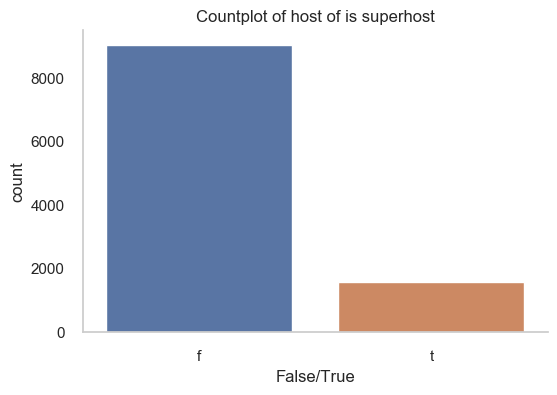

In [257]:
sns.set_style('white', {"axes.edgecolor": ".8"})
plt.figure(dpi = 100)
sns.countplot(train['host_is_superhost'])
plt.title('Countplot of host of is superhost')
plt.xlabel('False/True')

sns.despine()

In [258]:
train['host_is_superhost'] = np.where(train['host_is_superhost'] == 't',1,0)


In [259]:
train['host_is_superhost'].value_counts()

0    9060
1    1575
Name: host_is_superhost, dtype: int64

 ## 2.2 Explanatory Variables

 ### 2.2.1 Numerical explanatory variables

 #### 2.2.1.1 Univarate

In [260]:
continuous = train.iloc[:,1:].select_dtypes(include = np.number).columns.tolist()



In [261]:
continuous

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'weekly_discount',
 'monthly_discount',
 'security_deposit_perc',
 'cleaning_fee_perc',
 'guests_included',
 'extra_people_perc',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
 'price',
 'host_response_rate',
 'host_acceptance_rate_float']

In [262]:
continuous.remove('weekly_discount')
continuous.remove('monthly_discount')


In [263]:
train[continuous].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    10635 non-null  int64  
 1   bathrooms                       10631 non-null  float64
 2   bedrooms                        10630 non-null  float64
 3   beds                            10569 non-null  float64
 4   security_deposit_perc           7159 non-null   float64
 5   cleaning_fee_perc               8059 non-null   float64
 6   guests_included                 10635 non-null  int64  
 7   extra_people_perc               10635 non-null  float64
 8   minimum_nights                  10635 non-null  int64  
 9   maximum_nights                  10635 non-null  int64  
 10  availability_30                 10635 non-null  int64  
 11  number_of_reviews               10635 non-null  int64  
 12  review_scores_rating            

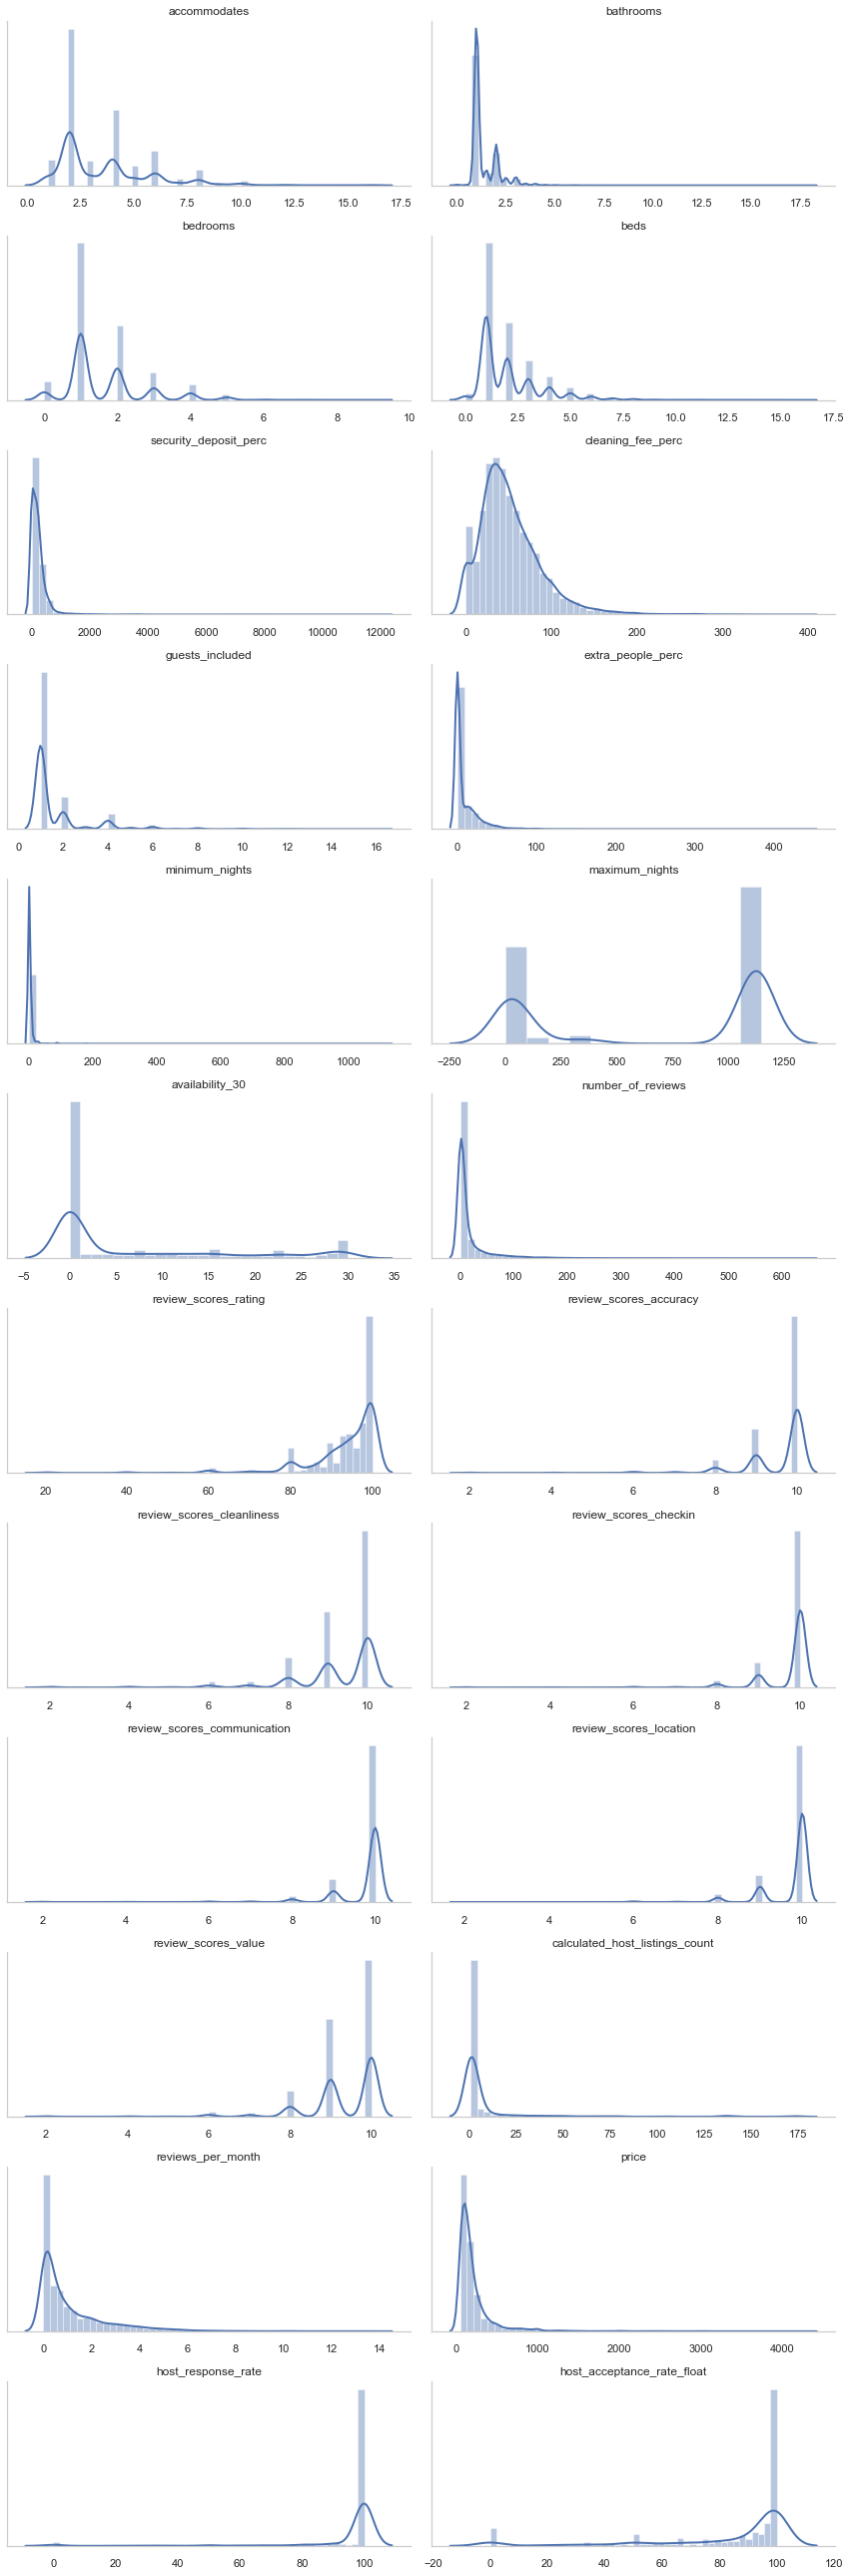

In [264]:
N, p = train[continuous].shape
rows = int(np.ceil(p/2))
fig, axes = plt.subplots(rows, 2, figsize=(12, rows*(12/4)))

for i, ax in enumerate(fig.axes):
    if i < p:
        sns.distplot(train[continuous].iloc[:,i], 
                     ax=ax,  
                     hist_kws = dict(alpha = 0.4),  
                     kde_kws= dict(linewidth = 2, alpha = 1))
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(continuous[i])
        ax.set_yticks([])
    else:
        fig.delaxes(ax)

sns.despine()
plt.tight_layout()


 #### 2.2.1.2 Bivarate

In [265]:
train[continuous]

accommodates  bathrooms  bedrooms  beds  security_deposit_perc  \
0                 4        1.5       2.0   2.0                    NaN   
1                 6        2.5       3.0   4.0                  588.0   
2                 4        1.0       0.0   2.0                  130.0   
3                 6        1.0       3.0   4.0                    0.0   
4                 2        2.0       1.0   1.0                  273.0   
...             ...        ...       ...   ...                    ...   
10630             6        2.0       3.0   3.0                  273.0   
10631             4        1.0       0.0   1.0                  173.0   
10632             2        1.0       1.0   1.0                  225.0   
10633             6        2.0       2.0   2.0                    0.0   
10634             8        3.0       4.0   4.0                   81.0   

       cleaning_fee_perc  guests_included  extra_people_perc  minimum_nights  \
0                   15.0                1                0.0               7   
1                   59.0                1                0.0               2   
2                   52.0                3               12.0               1   
3                   50.0                1                0.0               3   
4                   55.0                1               36.0               2   
...                  ...              ...                ...             ...   
10630               22.0                1                0.0               7   
10631               54.0                1               10.0               1   
10632               56.0                1                0.0               7   
10633               38.0                4               11.0               2   
10634               40.0                1                0.0               7   

       maximum_nights  availability_30  number_of_reviews  \
0                1125                0                  0   
1                  19                0                  1   
2                1124               14                179   
3                  36               11                  0   
4                1125               29                 51   
...               ...              ...                ...   
10630              14               30                  0   
10631            1125               10                  2   
10632            1125                0                  0   
10633            1124                7                 36   
10634              90                0                  1   

       review_scores_rating  review_scores_accuracy  \
0                       NaN                     NaN   
1                     100.0                    10.0   
2                      88.0                     9.0   
3                       NaN                     NaN   
4                      91.0                     9.0   
...                     ...                     ...   
10630                   NaN                     NaN   
10631                  90.0                     9.0   
10632                   NaN                     NaN   
10633                  98.0                    10.0   
10634                 100.0                    10.0   

       review_scores_cleanliness  review_scores_checkin  \
0                            NaN                    NaN   
1                           10.0                   10.0   
2                            9.0                    9.0   
3                            NaN                    NaN   
4                           10.0                   10.0   
...                          ...                    ...   
10630                        NaN                    NaN   
10631                        9.0                    8.0   
10632                        NaN                    NaN   
10633                       10.0                   10.0   
10634                        8.0                   10.0   

       review_scores_communication  review_scores_location  \
0   

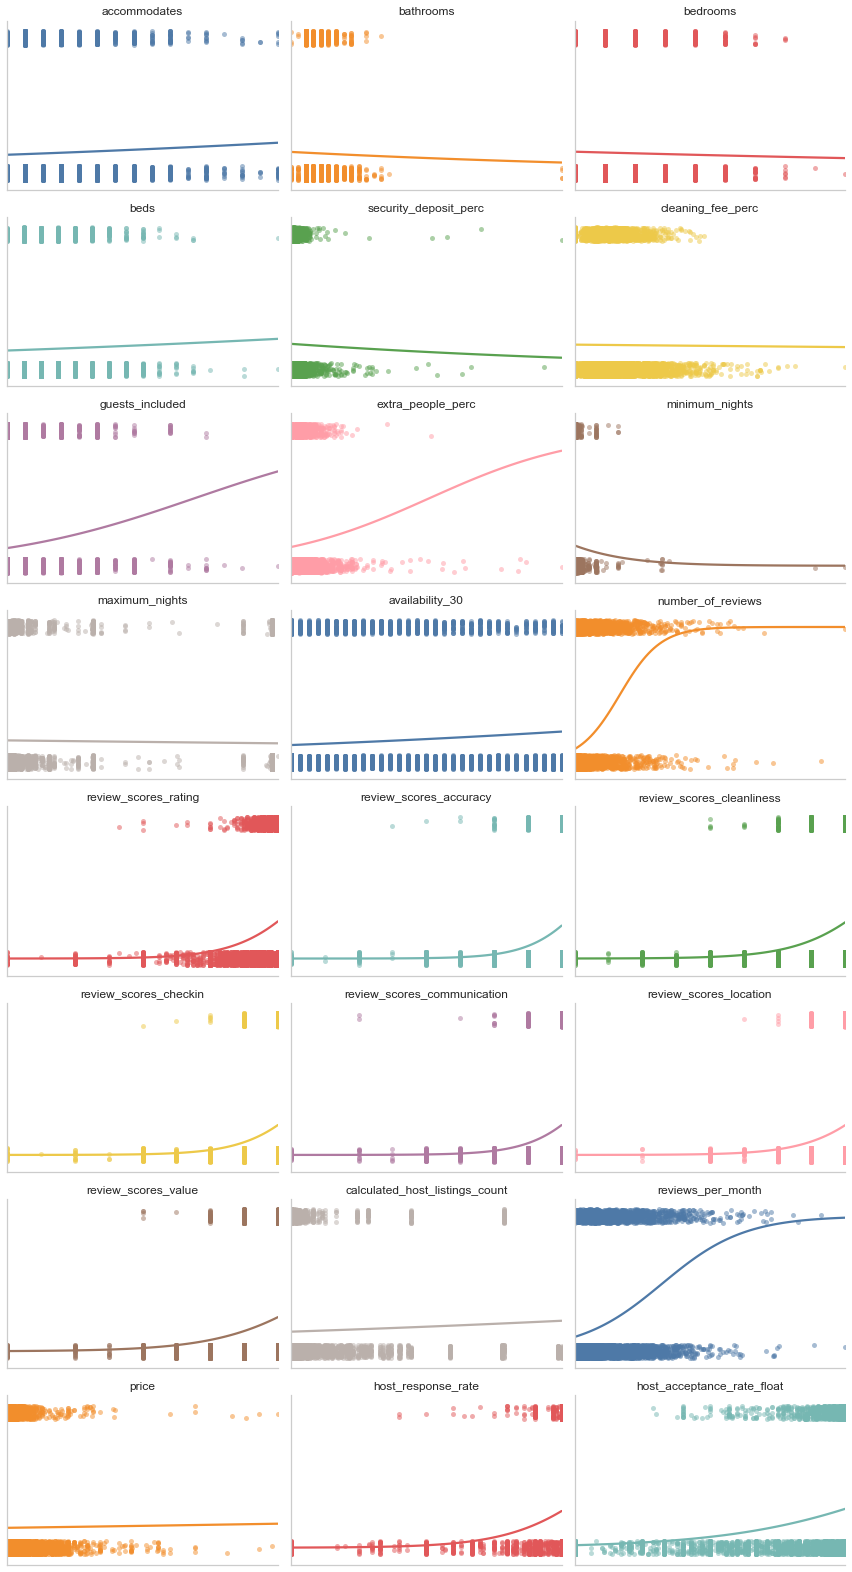

In [266]:
from statlearning import plot_logistic_regressions

plot_logistic_regressions(train[continuous], train['host_is_superhost'])
plt.show()

 ##### 2.2.1.2.1 Outliers

In [267]:
fix = train.query('bathrooms > 15').index



In [268]:
for i in range(len(fix)):
    train['bathrooms'][fix[i]] = 1



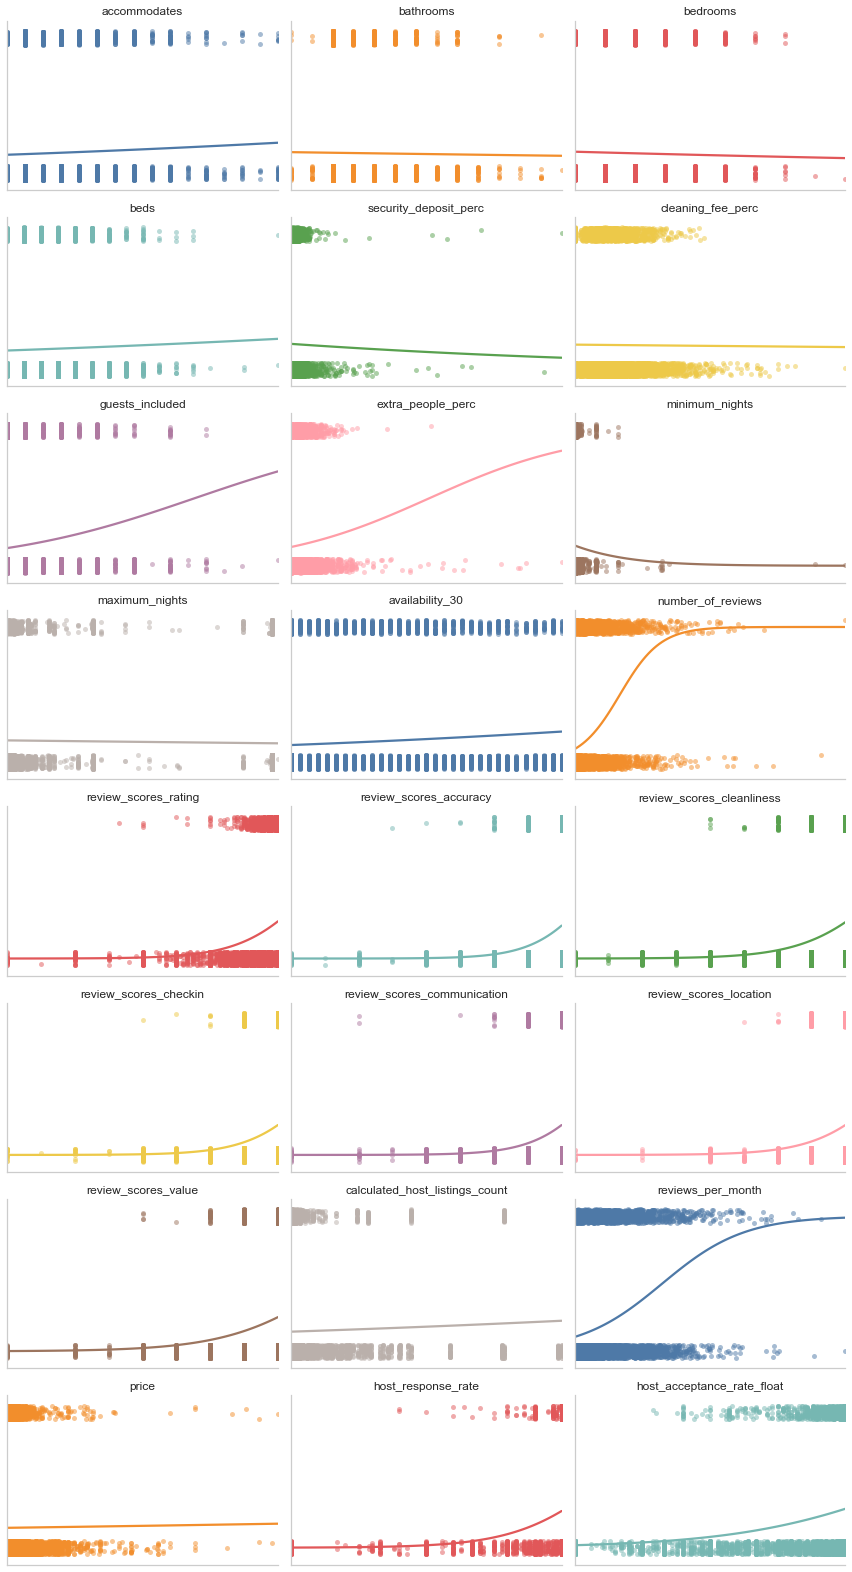

In [269]:
from statlearning import plot_logistic_regressions

plot_logistic_regressions(train[continuous], train['host_is_superhost'])
plt.show()

 ### 2.2.2 Categorical variables (no text)
 #### 2.2.2.1 Univariate

In [270]:
categorical = train.iloc[:,1:].select_dtypes(include = object).columns
categorical_notext = categorical.drop(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules','host_since','host_verifications','amenities'])



In [271]:
categorical



Index(['host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'amenities', 'requires_license',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'summary', 'space', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'host_since', 'host_response_time'],
      dtype='object')

In [272]:
train[categorical_notext].info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   host_identity_verified            10635 non-null  object
 1   neighbourhood_cleansed            10635 non-null  object
 2   is_location_exact                 10635 non-null  object
 3   property_type                     10635 non-null  object
 4   room_type                         10635 non-null  object
 5   bed_type                          10635 non-null  object
 6   requires_license                  10635 non-null  object
 7   instant_bookable                  10635 non-null  object
 8   is_business_travel_ready          10635 non-null  object
 9   cancellation_policy               10635 non-null  object
 10  require_guest_profile_picture     10635 non-null  object
 11  require_guest_phone_verification  10635 non-null  object
 12  experiences_offere

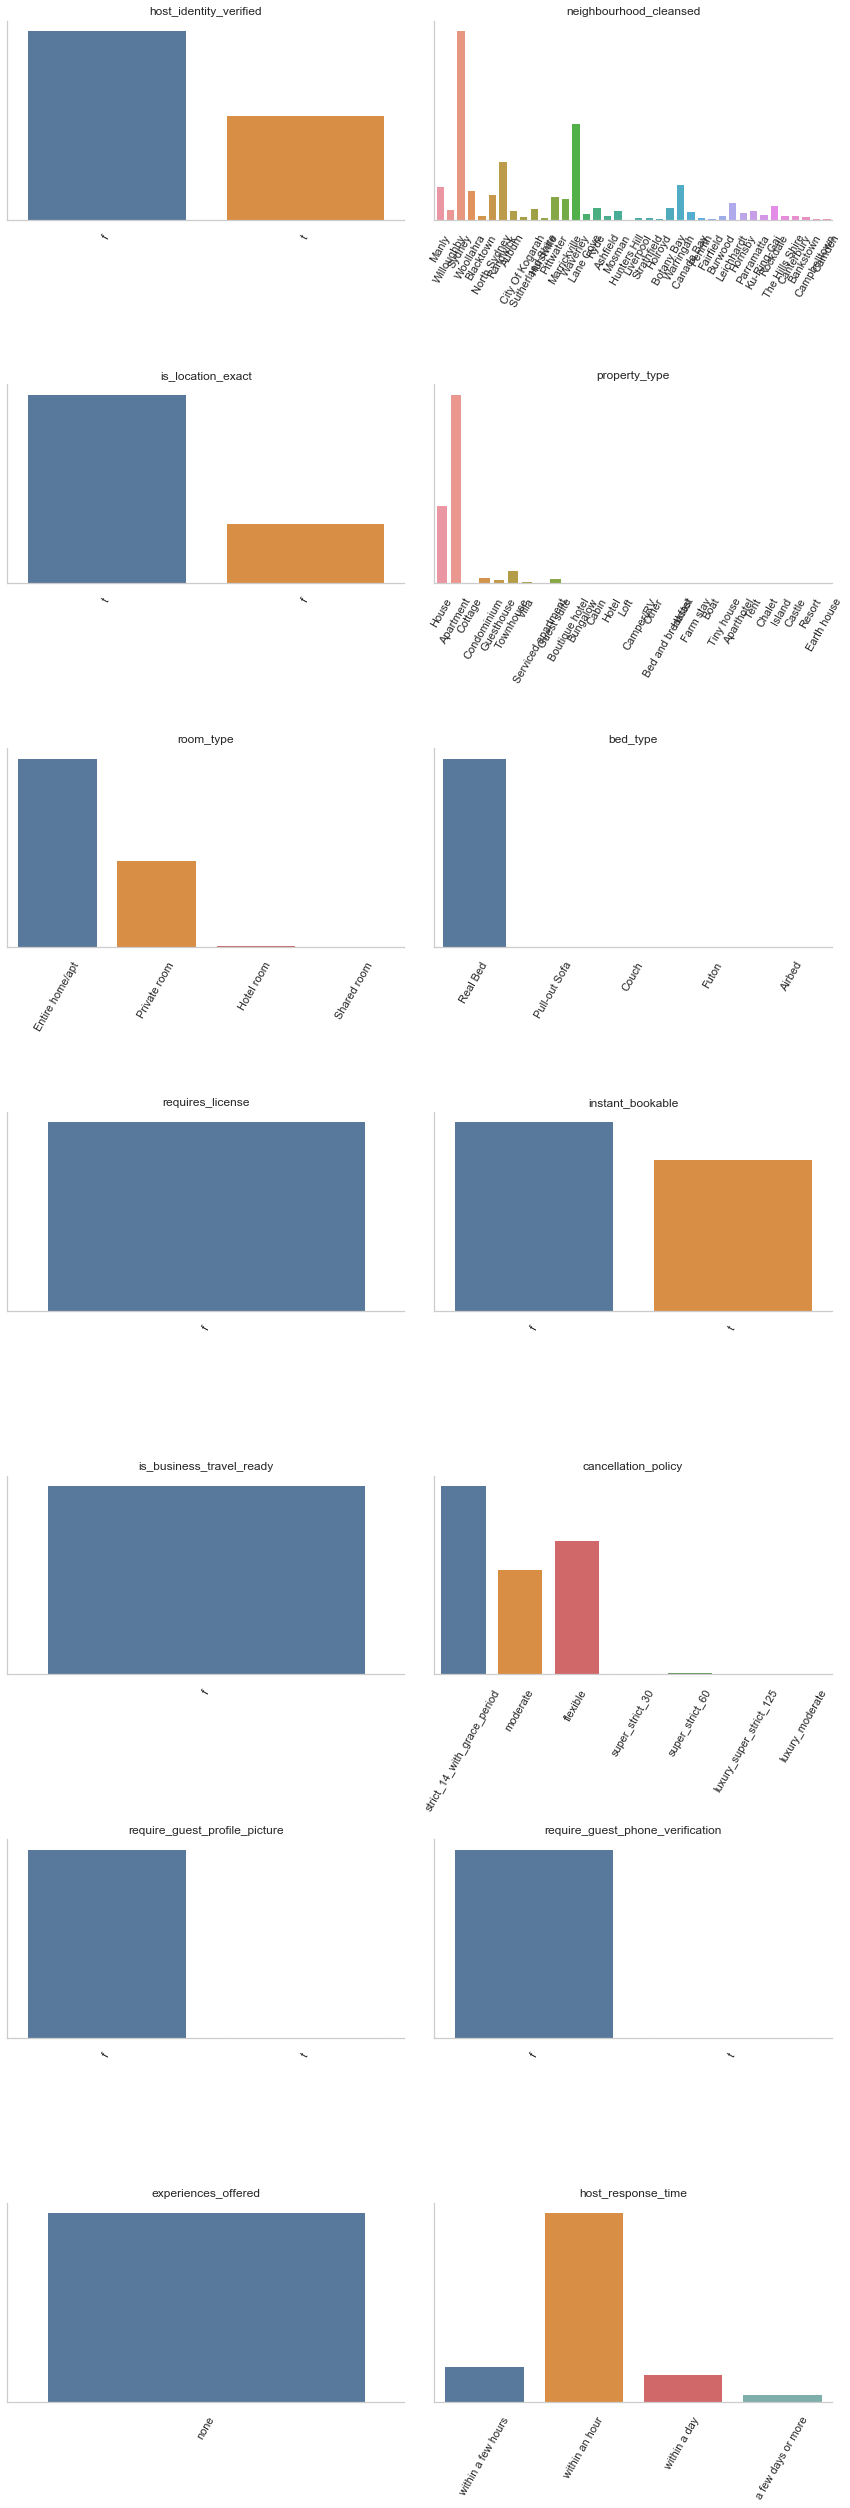

In [273]:
N, p = train[categorical_notext].shape
rows = int(np.ceil(p/2))

fig, axes = plt.subplots(rows, 2, figsize=(12, rows*(20/4)))

for i, ax in enumerate(fig.axes):
    if i < p:
        sns.countplot(train[categorical_notext].iloc[:,i], 
                     ax=ax)
        ax.set_xlabel('')
        ax.tick_params(axis='x', labelrotation= 60 )
        ax.set_ylabel('')
        ax.set_title(categorical_notext[i])
        ax.set_yticks([])
    else:
        fig.delaxes(ax)

sns.despine()
plt.tight_layout()


 #### 2.2.2.2 Bivariate

In [274]:
cat_notext = categorical_notext.tolist()

In [275]:
cat_notext

['host_identity_verified',
 'neighbourhood_cleansed',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'requires_license',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'experiences_offered',
 'host_response_time']

In [276]:
pd.DataFrame(cat_notext).to_excel('hi.xlsx')

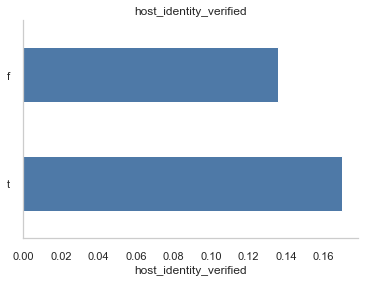

In [277]:
table = (train.groupby(cat_notext[0])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[0])
ax.set_title(cat_notext[0])
sns.despine()
plt.show()

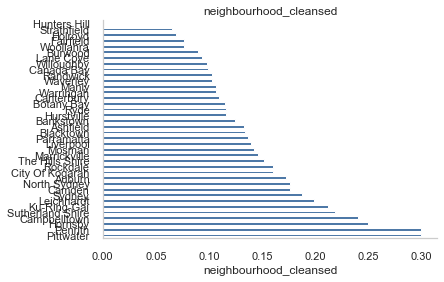

In [278]:
table = (train.groupby(cat_notext[1])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[1])
ax.set_title(cat_notext[1])
sns.despine()
plt.show()

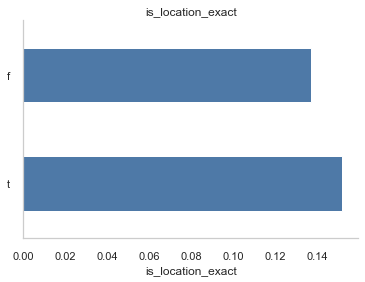

In [279]:
table = (train.groupby(cat_notext[2])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[2])
ax.set_title(cat_notext[2])
sns.despine()
plt.show()

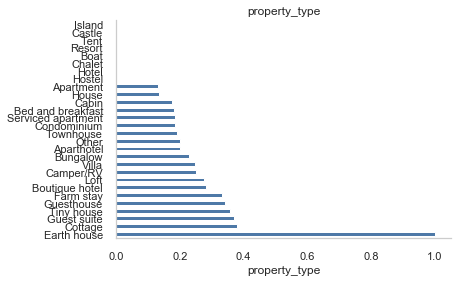

In [280]:
table = (train.groupby(cat_notext[3])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[3])
ax.set_title(cat_notext[3])
sns.despine()
plt.show()

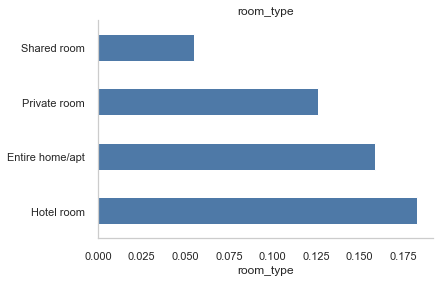

In [281]:
table = (train.groupby(cat_notext[4])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[4])
ax.set_title(cat_notext[4])
sns.despine()
plt.show()

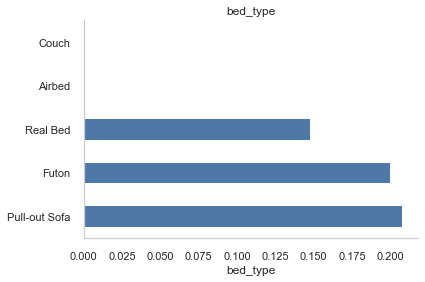

In [282]:
table = (train.groupby(cat_notext[5])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[5])
ax.set_title(cat_notext[5])
sns.despine()
plt.show()

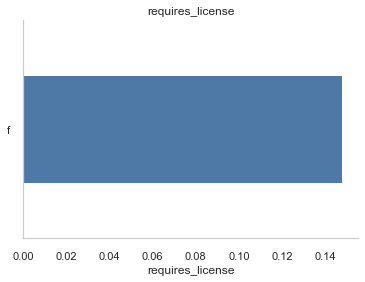

In [283]:
table = (train.groupby(cat_notext[6])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[6])
ax.set_title(cat_notext[6])
sns.despine()
plt.show()

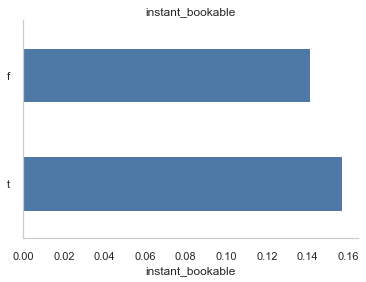

In [284]:
table = (train.groupby(cat_notext[7])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[7])
ax.set_title(cat_notext[7])
sns.despine()
plt.show()

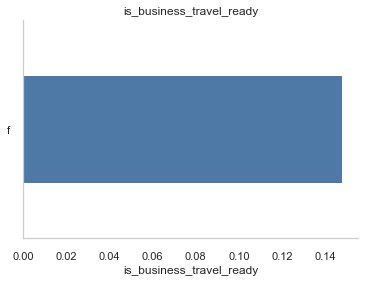

In [285]:
table = (train.groupby(cat_notext[8])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[8])
ax.set_title(cat_notext[8])
sns.despine()
plt.show()

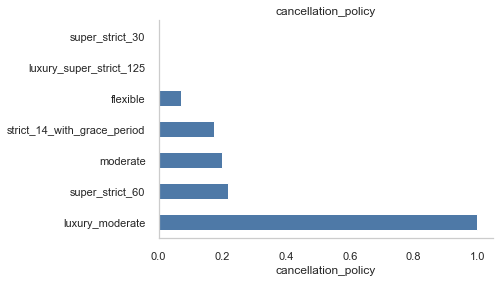

In [286]:
table = (train.groupby(cat_notext[9])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[9])
ax.set_title(cat_notext[9])
sns.despine()
plt.show()

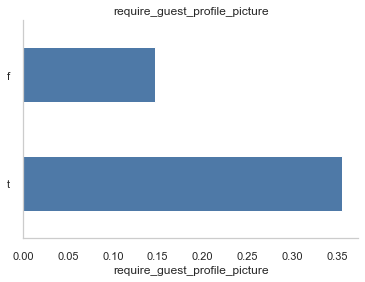

In [287]:
table = (train.groupby(cat_notext[10])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[10])
ax.set_title(cat_notext[10])
sns.despine()
plt.show()

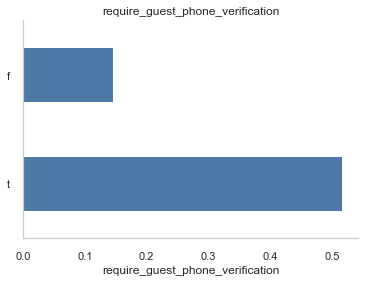

In [288]:
table = (train.groupby(cat_notext[11])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[11])
ax.set_title(cat_notext[11])
sns.despine()
plt.show()

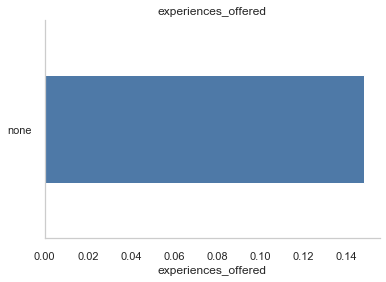

In [289]:
table = (train.groupby(cat_notext[12])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[12])
ax.set_title(cat_notext[12])
sns.despine()
plt.show()

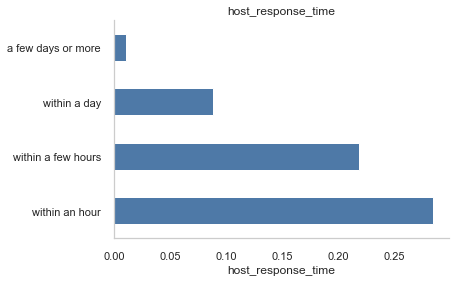

In [290]:
table = (train.groupby(cat_notext[13])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel(cat_notext[13])
ax.set_title(cat_notext[13])
sns.despine()
plt.show()

In [291]:
 drop_list = ['host_identity_verified', 
              'is_location_exact', 
              'requires_license',
              'instant_bookable',
              'is_business_travel_ready',
              'experiences_offered',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds']

In [292]:
for i in range(len(drop_list)):
    train.drop(drop_list[i], axis = 1, inplace = True)

 # 3.0 Feature Engineering

In [293]:
train.columns

Index(['host_is_superhost', 'host_verifications', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'bed_type', 'amenities',
       'weekly_discount', 'monthly_discount', 'security_deposit_perc',
       'cleaning_fee_perc', 'guests_included', 'extra_people_perc',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month', 'price',
       'summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'host_since',
       'host_response_time', 'host_response_rate',
       'host_acceptance_rate_float'],
      dtype='object')

 ## 3.1 Numerical variables

 ## 3.1.1 Transform Numerical variable to Categorical variable

In [294]:
num_to_cat = ['guests_included']

for i in range(len(num_to_cat)):
    train[num_to_cat[i]] = train[num_to_cat[i]].apply(str)

 ## 3.2 Categorical Variables

 ## 3.2.2 Merge sparse labels

 #### 3.2.2.1 Review_scores_rating

In [295]:
def convert_scores_buckets(val):
    if val == 'No Review':
        return 'No Review'
    elif val >= 90.0:
        return '90-100'
    elif val >= 80.0 and val < 90.0:
        return '80-90'
    elif val >= 70.0 and val < 80.0:
        return '70-80'
    elif val < 70.0:
        return 'Below 70'

train['review_scores_rating'] = train['review_scores_rating'].apply(convert_scores_buckets)


 #### 3.2.2.2 Host_Response_rate

 #### 3.2.2.3 Property_type

In [296]:
train.loc[~train.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

 #### 3.2.2.4 Room_Type

In [297]:
train.loc[~train.room_type.isin(['Entire home/apt', 'Private room']), 'room_type'] = 'Other'

 #### 3.2.2.5 Bed_type

In [298]:
train.loc[~train.bed_type.isin(['Real Bed']), 'bed_type'] = 'Other'



 #### 3.2.2.10 Guest_included

In [299]:
train.loc[~train.guests_included.isin(['1','2','3','4']), 'guests_included'] = '5 or more'



In [300]:
test.loc[~test.guests_included.isin(['1','2','3','4']), 'guests_included'] = '5 or more'



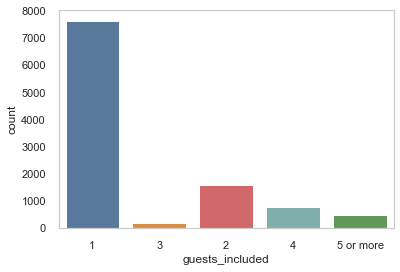

In [301]:
sns.countplot(train['guests_included'])



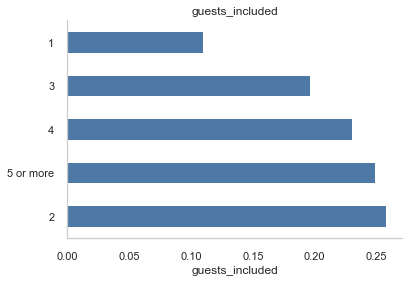

In [302]:
table = (train.groupby(train['guests_included'])['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel('guests_included')
ax.set_title('guests_included')
sns.despine()
plt.show()

 #### 3.2.2.11 Neighbourhood_cleansed

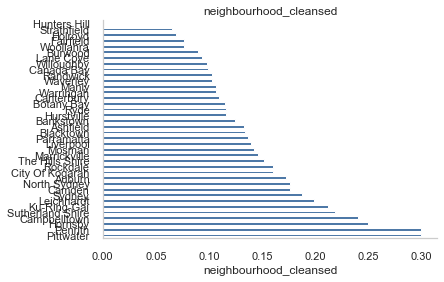

In [303]:
table = (train.groupby('neighbourhood_cleansed')['host_is_superhost'].mean()).sort_values(ascending=False).round(3)
fig, ax = plt.subplots(figsize=(6, 4))
table.plot(kind='barh', ax=ax)
ax.set_ylabel('')
ax.set_xlabel('neighbourhood_cleansed')
ax.set_title('neighbourhood_cleansed')
sns.despine()
plt.show()

In [304]:
c = toad.transform.Combiner()
col = 'neighbourhood_cleansed'
c.fit(train[[col,'host_is_superhost']], y = 'host_is_superhost', method = 'chi',min_samples = 0.05)  
#use toad package to binning suburbs based on complete rate

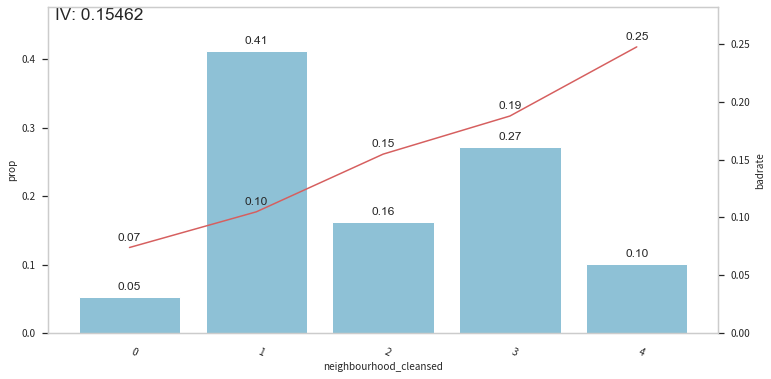

In [305]:
bin_plot(c.transform(train[[col,'host_is_superhost']], labels=False), x=col, target='host_is_superhost')

In [306]:
c.export()

{'neighbourhood_cleansed': [['Strathfield',
   'Holroyd',
   'Hunters Hill',
   'Fairfield',
   'Woollahra'],
  ['Burwood',
   'Lane Cove',
   'Willoughby',
   'Canada Bay',
   'Randwick',
   'Waverley',
   'Manly',
   'Warringah',
   'Canterbury',
   'Botany Bay',
   'Ryde',
   'Hurstville'],
  ['Bankstown',
   'Ashfield',
   'Blacktown',
   'Parramatta',
   'Liverpool',
   'Mosman',
   'Marrickville',
   'The Hills Shire',
   'Rockdale',
   'City Of Kogarah',
   'Auburn',
   'North Sydney',
   'Camden'],
  ['Sydney'],
  ['Leichhardt',
   'Ku-Ring-Gai',
   'Sutherland Shire',
   'Campbelltown',
   'Hornsby',
   'Penrith',
   'Pittwater']]}

In [307]:
train['NC_bins'] = c.transform(train[['neighbourhood_cleansed']], labels=False)

In [308]:
train.drop('neighbourhood_cleansed', inplace = True, axis = 1)

 ### 3.2.2.15 Cancellation policy

In [309]:
c_cp = toad.transform.Combiner()
col_cp = 'cancellation_policy'
c_cp.fit(train[[col_cp,'host_is_superhost']], y = 'host_is_superhost', method = 'chi',min_samples = 0.05)  
#use toad package to binning suburbs based on complete rate

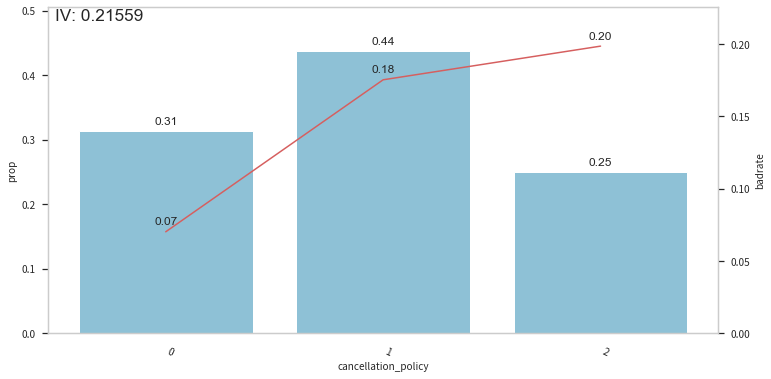

In [310]:
bin_plot(c_cp.transform(train[[col_cp,'host_is_superhost']], labels=False), x=col_cp, target='host_is_superhost')

In [311]:
c_cp.export()

{'cancellation_policy': [['super_strict_30', 'flexible'],
  ['strict_14_with_grace_period'],
  ['moderate',
   'super_strict_60',
   'luxury_super_strict_125',
   'luxury_moderate']]}

In [312]:
train['CP_bins'] = c_cp.transform(train[['cancellation_policy']], labels=False)

In [313]:
train.drop('cancellation_policy', axis = 1, inplace = True)

 ## 3.3 Categorical text data

 ### 3.3.1 Amenities

In [314]:
amenities_list = list(train.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)



In [315]:
train.loc[train['amenities'].str.contains('Suitable for events'), 'event'] = 1
train.loc[train['amenities'].str.contains('Exercise equipment|Gym'), 'exerciese'] = 1
train.loc[train['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'washers'] = 1
train.loc[train['amenities'].str.contains('Cooking basics'), 'cookingbasics'] = 1
train.loc[train['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
train.loc[train['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
train.loc[train['amenities'].str.contains('Kitchen|Outdoor kitchen'), 'kitchen'] = 1
train.loc[train['amenities'].str.contains('Laptop friendly workspace'), 'Laptop friendly workspace'] = 1
train.loc[train['amenities'].str.contains('Toilet paper'), 'Toilet paper'] = 1
train.loc[train['amenities'].str.contains('Body Soap|Shampoo'), 'Sanity'] = 1
train.loc[train['amenities'].str.contains('TV|Smart TV|Cable TV'), 'TV'] = 1
train.loc[train['amenities'].str.contains('Bed linens'), 'Bed related'] = 1
train.loc[train['amenities'].str.contains('Heating|Air Conditioning|Central air conditoning'), 'air conditioning'] = 1
train.loc[train['amenities'].str.contains('Hair dryer'), 'Hair dryer'] = 1
train.loc[train['amenities'].str.contains('Breakfast'), 'Breakfast'] = 1
train.loc[train['amenities'].str.contains('Wifi| Pocket Wifi'), 'wifi'] = 1
train.loc[train['amenities'].str.contains('Self check_in|24-hour check-in'), 'check_in'] = 1
train.loc[train['amenities'].str.contains('Driveway parking|Free parking on premises|Free street parking|Garage parking|Paid Parking off premises|Paid parking on premises|Outdoor parking'), 'Parking'] = 1
train.loc[train['amenities'].str.contains('Pets allowed|Pets live on this property|Other pet(s)|Cat(s)|Dog(s)'), 'Pet-friendly'] = 1
train.loc[train['amenities'].str.contains('Smoke detector|Carbon monoxide detector|Fire extinguisher|First aid kit'), 'Safe Facilities'] = 1
train.loc[train['amenities'].str.contains('Accessible-height bed|Accessible-height toilet|Wheelchair accessible|Step-free shower|Disabled parking spot|No stairs or steps to enter'), 'Accessibility'] = 1
train.loc[train['amenities'].str.contains('Baby bath|Baby monitor|Babysitter recommendations|Crib|High chair|Children’s books and toys|Children’s dinnerware'), 'Kid_friendly'] =1
train.loc[train['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
train.loc[train['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
train.loc[train['amenities'].str.contains('Smoking allowed'), 'Smoking allowed'] = 1



In [316]:
cols_to_replace_nulls = train.iloc[:,42:].columns
train[cols_to_replace_nulls] = train[cols_to_replace_nulls].fillna(0)
train.drop('amenities', axis = 1, inplace = True)



 ### 3.3.2 host_verification

In [317]:
train.drop('host_verifications', axis = 1, inplace = True)



 ### 3.3.3 Host since

In [318]:
train['host_since'] = pd.to_datetime(train['host_since'])



In [319]:
train['host_since_age'] = train['host_since'].dt.year.max() - train['host_since'].dt.year



In [320]:
train['host_since_age']



0        6
1        6
2        7
3        7
4        5
        ..
10630    5
10631    1
10632    1
10633    3
10634    6
Name: host_since_age, Length: 10635, dtype: int64

In [321]:
train.drop('host_since', axis = 1 , inplace = True)



 ### 3.3.4 House rules

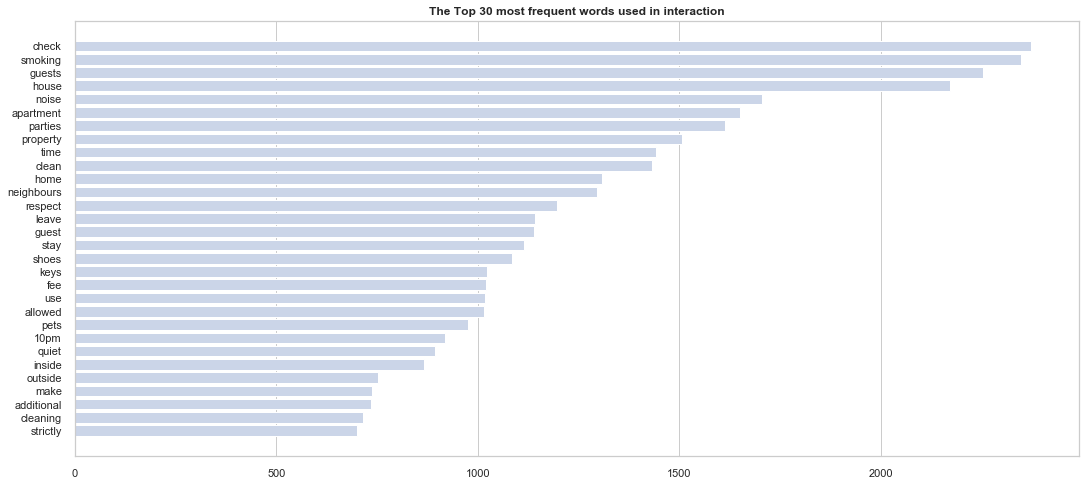

In [322]:
rules = train['house_rules'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(rules)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in interaction', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [323]:
train.drop('house_rules', axis = 1 , inplace = True)



 ### 3.3.5 Interaction

In [324]:
interac = train['interaction'].tolist()



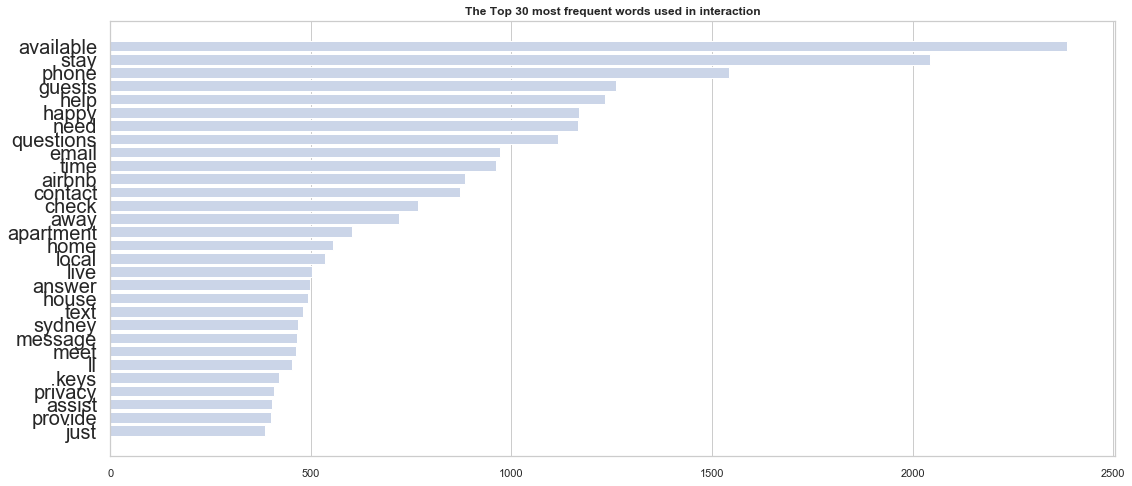

In [325]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(interac)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in interaction', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [326]:
train.loc[train['interaction'].str.contains('available|help|assist|contact'), 'host_interaction'] = 1



In [327]:
train['host_interaction'] = train['host_interaction'].fillna(0)



In [328]:
train['host_interaction'].value_counts()



0.0    6816
1.0    3819
Name: host_interaction, dtype: int64

In [329]:
train.drop('interaction', axis = 1 , inplace = True)


 ### 3.3.6 Space

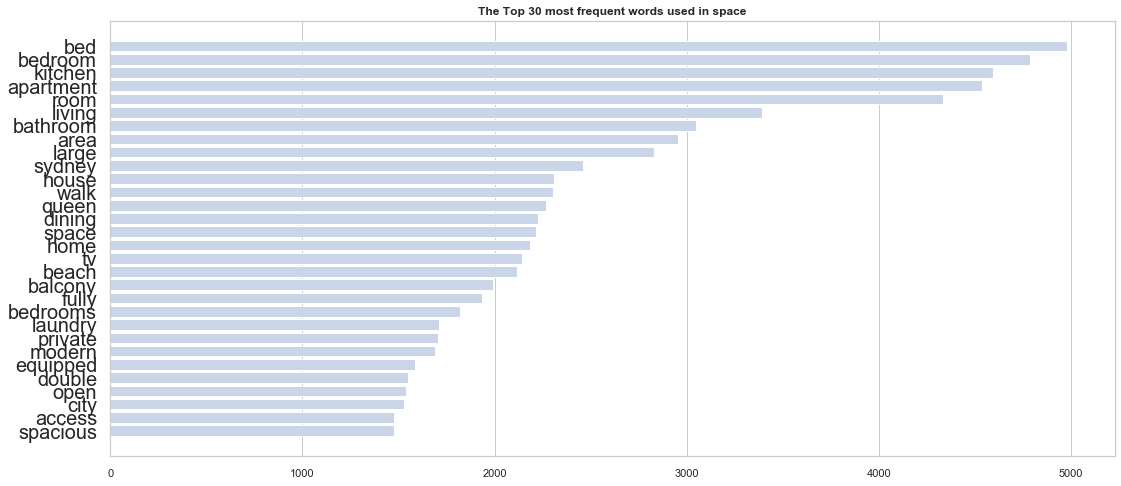

In [330]:
spz = train['space'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(spz)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in space', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# we want to drop because it overlaps with amenities



In [331]:
train.drop('space', axis = 1, inplace = True)

 ### 3.3.7 access

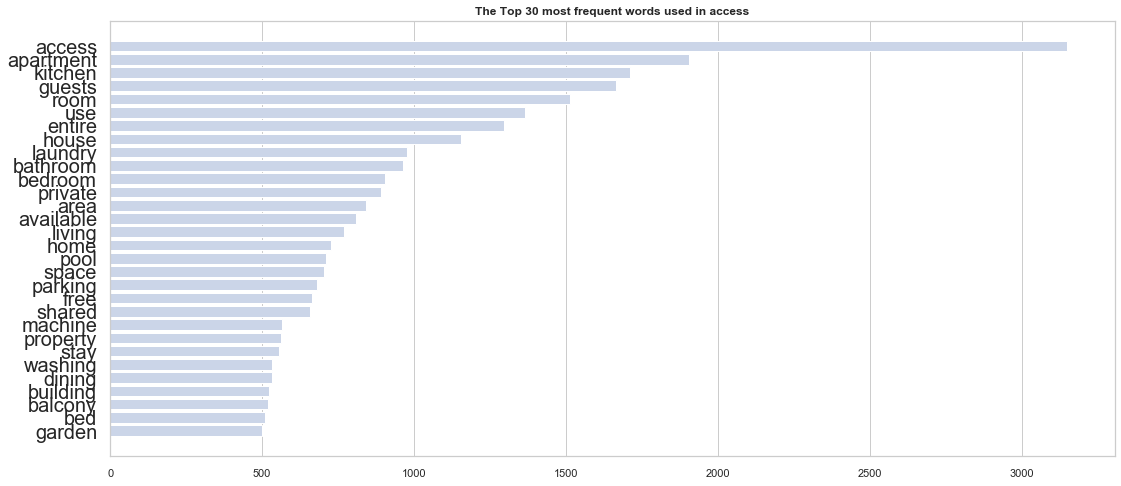

In [332]:
acs = train['access'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(acs)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in access', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [333]:
train.drop('access', axis = 1, inplace = True)

 ### 3.3.8 neighbourhood overview

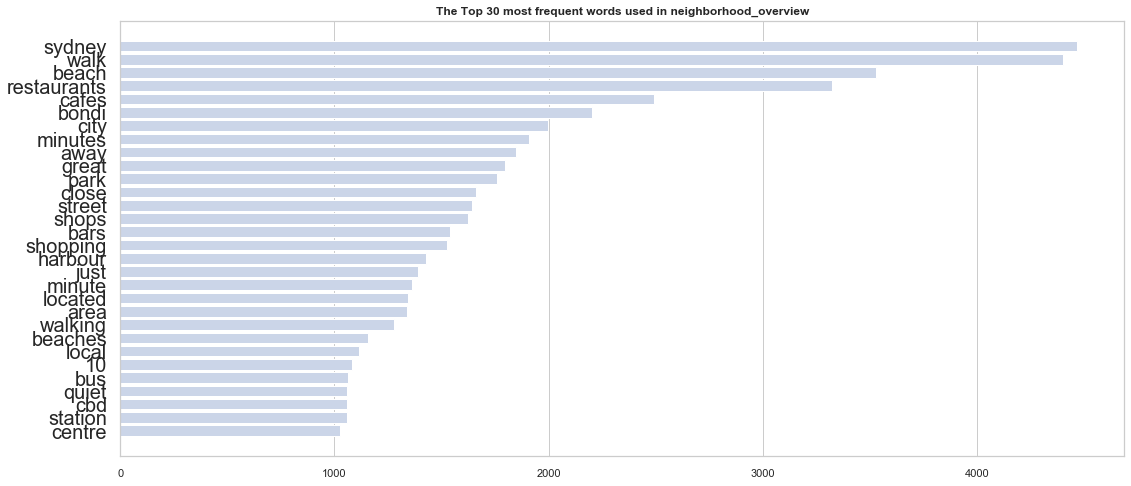

In [334]:
neigh = train['neighborhood_overview'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neigh)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in neighborhood_overview', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [335]:
train['neighborhood_overview'][1]



'Chatswood is a great neighbourhood, full of restaurants and shopping. The house is a comfortable and quick walking distance from the CBD area.'

In [336]:
train.loc[train['neighborhood_overview'].str.contains('restaurants|cafes|shops|bars|shopping'), 'AC_prox_essentials'] = 1
train['AC_prox_essentials'] = train['AC_prox_essentials'].fillna(0)



In [337]:
train.drop('neighborhood_overview', axis = 1, inplace = True)

 ### 3.3.9 transit

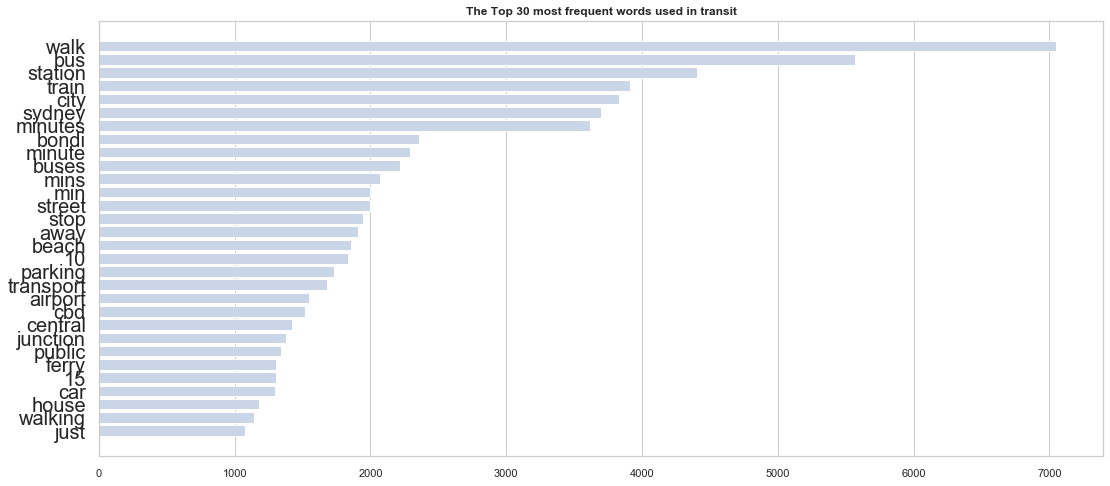

In [338]:
trans = train['transit'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(trans)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in transit', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [339]:
train.loc[train['transit'].str.contains('bus|station|train'), 'public_transport'] = 1
train['public_transport'] = train['public_transport'].fillna(0)

In [340]:
train.drop('transit', axis = 1, inplace = True)

 ### 3.3.10 notes

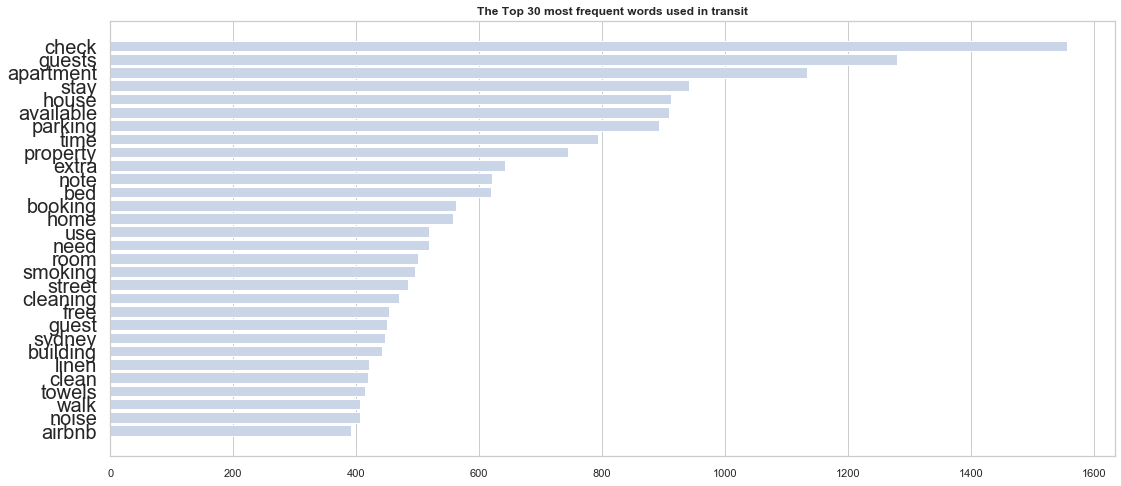

In [341]:
notes = train['notes'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(notes)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in transit', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [342]:
train.drop('notes', axis = 1, inplace = True)

 ### 3.3.11 Summary

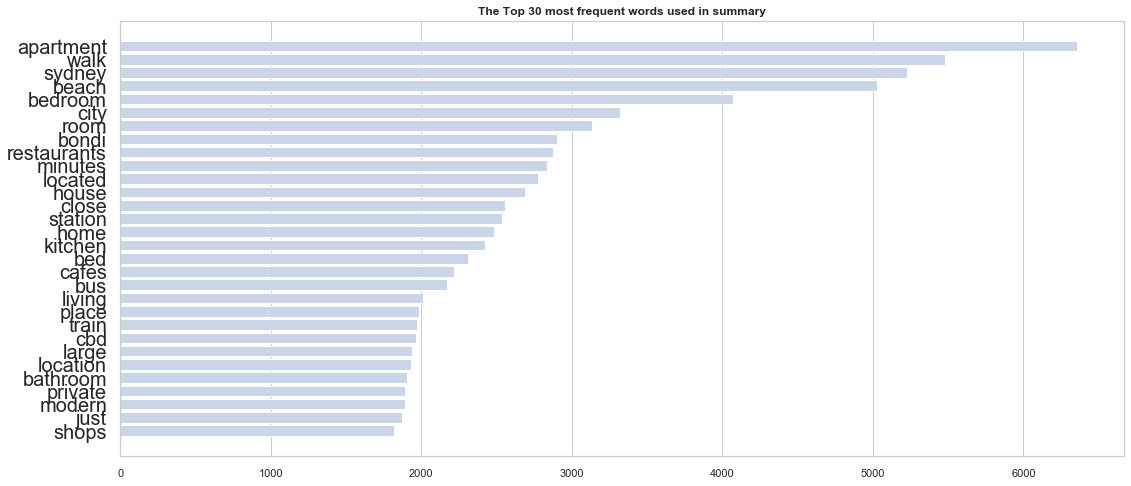

In [343]:
summary = train['summary'].tolist()

# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(summary)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.yticks(fontsize = 20)
plt.title('The Top 30 most frequent words used in summary', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;



In [344]:
train.drop('summary', axis = 1, inplace = True)

In [345]:
train.head()



host_is_superhost property_type        room_type  bed_type  \
0                  0         House  Entire home/apt  Real Bed   
1                  0         House  Entire home/apt  Real Bed   
2                  0     Apartment  Entire home/apt  Real Bed   
3                  0         House  Entire home/apt  Real Bed   
4                  0         House     Private room  Real Bed   

   weekly_discount  monthly_discount  security_deposit_perc  \
0              NaN               NaN                    NaN   
1       -26.050420               NaN                  588.0   
2              NaN               NaN                  130.0   
3              NaN               NaN                    0.0   
4         3.896104          6.060606                  273.0   

   cleaning_fee_perc guests_included  extra_people_perc  minimum_nights  \
0               15.0               1                0.0               7   
1               59.0               1                0.0               2   
2               52.0               3               12.0               1   
3               50.0               1                0.0               3   
4               55.0               1               36.0               2   

   maximum_nights  availability_30  number_of_reviews review_scores_rating  \
0            1125                0                  0                 None   
1              19                0                  1               90-100   
2            1124               14                179                80-90   
3              36               11                  0                 None   
4            1125               29                 51               90-100   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                     NaN                        NaN                    NaN   
1                    10.0                       10.0                   10.0   
2                     9.0                        9.0                    9.0   
3                     NaN                        NaN                    NaN   
4                     9.0                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                          NaN                     NaN                  NaN   
1                         10.0                     8.0                  8.0   
2                          9.0                    10.0                  8.0   
3                          NaN                     NaN                  NaN   
4                         10.0                     9.0                  9.0   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

   calculated_host_listings_count  reviews_per_month  price  \
0                               1                NaN  450.0   
1                               1               0.70  170.0   
2                              22               5.24  153.0   
3                               1                NaN  301.0   
4                               2               0.91   55.0   

   host_response_time  host_response_rate  host_acceptance_rate_float  \
0                 NaN                 NaN                         NaN   
1  within a few hours               100.0                        50.0   
2      within an hour               100.0                       100.0   
3        within a day                67.0                         0.0   
4      within an hour               100.0                       100.0   

   NC_bins  CP_bins  event  exerciese  washers  cookingbasics  coffee_machine  \
0        1        1    0.0        0.0      1.0         

In [346]:
train.head()

host_is_superhost property_type        room_type  bed_type  \
0                  0         House  Entire home/apt  Real Bed   
1                  0         House  Entire home/apt  Real Bed   
2                  0     Apartment  Entire home/apt  Real Bed   
3                  0         House  Entire home/apt  Real Bed   
4                  0         House     Private room  Real Bed   

   weekly_discount  monthly_discount  security_deposit_perc  \
0              NaN               NaN                    NaN   
1       -26.050420               NaN                  588.0   
2              NaN               NaN                  130.0   
3              NaN               NaN                    0.0   
4         3.896104          6.060606                  273.0   

   cleaning_fee_perc guests_included  extra_people_perc  minimum_nights  \
0               15.0               1                0.0               7   
1               59.0               1                0.0               2   
2               52.0               3               12.0               1   
3               50.0               1                0.0               3   
4               55.0               1               36.0               2   

   maximum_nights  availability_30  number_of_reviews review_scores_rating  \
0            1125                0                  0                 None   
1              19                0                  1               90-100   
2            1124               14                179                80-90   
3              36               11                  0                 None   
4            1125               29                 51               90-100   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                     NaN                        NaN                    NaN   
1                    10.0                       10.0                   10.0   
2                     9.0                        9.0                    9.0   
3                     NaN                        NaN                    NaN   
4                     9.0                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                          NaN                     NaN                  NaN   
1                         10.0                     8.0                  8.0   
2                          9.0                    10.0                  8.0   
3                          NaN                     NaN                  NaN   
4                         10.0                     9.0                  9.0   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

   calculated_host_listings_count  reviews_per_month  price  \
0                               1                NaN  450.0   
1                               1               0.70  170.0   
2                              22               5.24  153.0   
3                               1                NaN  301.0   
4                               2               0.91   55.0   

   host_response_time  host_response_rate  host_acceptance_rate_float  \
0                 NaN                 NaN                         NaN   
1  within a few hours               100.0                        50.0   
2      within an hour               100.0                       100.0   
3        within a day                67.0                         0.0   
4      within an hour               100.0                       100.0   

   NC_bins  CP_bins  event  exerciese  washers  cookingbasics  coffee_machine  \
0        1        1    0.0        0.0      1.0         

 ## 3.4 Get_dummies

In [347]:
train.columns.tolist()

['host_is_superhost',
 'property_type',
 'room_type',
 'bed_type',
 'weekly_discount',
 'monthly_discount',
 'security_deposit_perc',
 'cleaning_fee_perc',
 'guests_included',
 'extra_people_perc',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count',
 'reviews_per_month',
 'price',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate_float',
 'NC_bins',
 'CP_bins',
 'event',
 'exerciese',
 'washers',
 'cookingbasics',
 'coffee_machine',
 'bbq',
 'kitchen',
 'Laptop friendly workspace',
 'Toilet paper',
 'Sanity',
 'TV',
 'Bed related',
 'air conditioning',
 'Hair dryer',
 'Breakfast',
 'wifi',
 'check_in',
 'Parking',
 'Pet-friendly',
 'Safe Facilities

In [348]:
train = train[['price',
    'host_is_superhost',
 'property_type',
 'room_type',
 'bed_type',
 'weekly_discount',
 'monthly_discount',
 'security_deposit_perc',
 'cleaning_fee_perc',
 'guests_included',
 'extra_people_perc',
 'minimum_nights',
 'maximum_nights',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate_float',
 'NC_bins',
 'CP_bins',
 'event',
 'exerciese',
 'washers',
 'cookingbasics',
 'coffee_machine',
 'bbq',
 'kitchen',
 'Laptop friendly workspace',
 'Toilet paper',
 'Sanity',
 'TV',
 'Bed related',
 'air conditioning',
 'Hair dryer',
 'Breakfast',
 'wifi',
 'check_in',
 'Parking',
 'Pet-friendly',
 'Safe Facilities',
 'Accessibility',
 'Kid_friendly',
 'balcony',
 'nature_and_views',
 'Smoking allowed',
 'host_since_age',
 'host_interaction',
 'AC_prox_essentials',
 'public_transport']]

In [349]:
categorical = train.select_dtypes(include=object).columns.tolist()

In [350]:
categorical

['property_type',
 'room_type',
 'bed_type',
 'guests_included',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'host_response_time']

In [351]:
train = pd.get_dummies(train, columns = categorical)

# yj is in wrong position

 # 3.5 Numerical variables

 def convert_dummy(val):
     if val == 0:
         return 0
     else:
         return 1

 train['sec_interact'] = train['security_deposit_perc'].apply(convert_dummy)

In [352]:
yj = PowerTransformer(method='yeo-johnson') # YJ is the default, this function also does Box-Cox

In [353]:
log_var = ['security_deposit_perc', 'cleaning_fee_perc', 'extra_people_perc']

for i in range(len(log_var)):
    train['yj_{}'.format(log_var[i])]  = yj.fit_transform(np.array(train[log_var[i]]).reshape(-1,1))
    test['yj_{}'.format(log_var[i])]  = yj.fit_transform(np.array(test[log_var[i]]).reshape(-1,1))

### Monthly discount and weekly discount

In [354]:
import math

In [355]:
def convert_dummy(val):
    if math.isnan(val) == True:
        return 0
    else:
        return 1

train['monthly_discount'] = train['monthly_discount'].apply(convert_dummy)
train['weekly_discount'] = train['weekly_discount'].apply(convert_dummy)

 # 4.0 Methodology

In [356]:
X_train = train.drop(['host_is_superhost'], axis = 1)

y_train = train['host_is_superhost']

In [357]:
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

 # 4.1 XGBoost

In [358]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

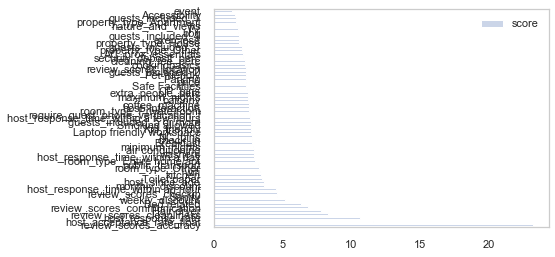

In [359]:
feature_important = xgb.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [360]:
keys = list(feature_important.keys())

In [361]:
data

score
review_scores_accuracy                 23.158523
host_acceptance_rate_float             11.580269
host_response_rate                     10.591599
review_scores_cleanliness               8.293504
Hair dryer                              7.760892
review_scores_communication             6.884563
Bed related                             6.341052
weekly_discount                         5.143803
Sanity                                  4.601392
review_scores_checkin                   4.586261
host_response_time_within an hour       4.538902
monthly_discount                        3.685856
host_since_age                          3.627020
Toilet paper                            3.529027
kitchen                                 3.432499
wifi                                    3.364950
room_type_Other                         3.271512
public_transport                        3.219793
room_type_Entire home/apt               3.020831
host_response_time_within a day         2.939478
washers                                 2.919186
air conditioning                        2.909116
minimum_nights                          2.850726
Breakfast                               2.817640
check_in                                2.815630
NC_bins                                 2.792793
Laptop friendly workspace               2.717344
Kid_friendly                            2.716278
Smoking allowed                         2.697610
guests_included_5 or more               2.690296
host_response_time_within a few hours   2.640376
require_guest_phone_verification_f      2.638995
room_type_Private room                  2.575931
host_interaction                        2.535385
coffee_machine                          2.530347
balcony                                 2.497790
maximum_nights                          2.486704
extra_people_perc                       2.475603
CP_bins                                 2.430976
Safe Facilities                         2.374548
price                                   2.370695
Parking                                 2.356861
Pet-friendly                            2.341577
guests_included_2                       2.321836
review_scores_location                  2.309708
cookingbasics                           2.286699
cleaning_fee_perc                       2.240035
security_deposit_perc                   2.157441
AC_prox_essentials                      2.106152
property_type_Other                     2.068407
guests_included_3                       2.033986
property_type_House                     1.870132
exerciese                               1.836562
guests_included_4                       1.805567
bbq                                     1.789475
TV                                      1.771416
nature_and_views                        1.672115
property_type_Apartment                 1.653127
guests_included_1                       1.590217
Accessibility                           1.579695
event                                   1.319254

In [362]:
print('Training accuracy: ', accuracy_score(xgb.predict(X_train), y_train))

Training accuracy:  0.9896567936060179


In [363]:
print('Training f1_score: ', f1_score(xgb.predict(X_train), y_train))

Training f1_score:  0.9645618556701031


# LightGBM Classifier

In [364]:
lightclass = lgb.LGBMClassifier(importance_type = 'gain')
lightclass.fit( X_train, y_train)

LGBMClassifier(importance_type='gain')

In [365]:
pd.DataFrame(lightclass.feature_importances_.round(3).T,X_train.columns).sort_values(0, ascending = False)

0
host_acceptance_rate_float             11105.903
review_scores_accuracy                  2514.164
host_response_rate                      1548.810
review_scores_cleanliness               1502.462
host_since_age                          1412.629
price                                   1348.283
cleaning_fee_perc                       1343.925
security_deposit_perc                   1140.463
maximum_nights                           942.781
extra_people_perc                        854.845
minimum_nights                           723.585
review_scores_communication              605.532
NC_bins                                  585.992
host_response_time_within an hour        434.244
Bed related                              373.080
Hair dryer                               363.591
review_scores_checkin                    340.942
public_transport                         263.252
CP_bins                                  243.092
yj_cleaning_fee_perc                     214.439
host_response_time_within a few hours    206.280
Parking                                  198.800
Sanity                                   196.438
yj_security_deposit_perc                 194.667
air conditioning                         192.073
exerciese                                187.039
Kid_friendly                             170.798
Laptop friendly workspace                164.704
AC_prox_essentials                       157.202
balcony                                  150.428
Pet-friendly                             149.391
coffee_machine                           144.271
host_interaction                         142.836
Smoking allowed                          135.003
review_scores_location                   130.379
weekly_discount                          127.241
property_type_Apartment                  118.288
cookingbasics                            113.979
Toilet paper                             110.256
TV                                       106.692
property_type_Other                      103.466
check_in                                  98.004
monthly_discount                          93.255
Breakfast                                 86.831
require_guest_phone_verification_f        82.543
kitchen                                   75.791
guests_included_2                         71.241
washers                                   67.157
wifi                                      65.228
nature_and_views                          61.691
guests_included_1                         60.059
room_type_Private room                    59.398
room_type_Entire home/apt                 58.646
property_type_House                       53.984
host_response_time_within a day           42.170
Accessibility                             38.895
Safe Facilities                           38.424
bbq                                       35.565
guests_included_4                         34.594
guests_included_5 or more                 22.822
room_type_Other                           13.084
event                                      6.585
yj_extra_people_perc                       3.942
require_guest_phone_verification_t         1.767
require_guest_profile_picture_t            0.000
host_response_time_a few days or more      0.000
require_guest_profile_picture_f            0.000
guests_included_3                          0.000
bed_type_Real Bed                          0.000
bed_type_Other                             0.000

# Insight discovery

In [366]:
train[['host_is_superhost','price']].groupby('host_is_superhost').agg(['mean','count','median'])

price             
                         mean count median
host_is_superhost                         
0                  211.841943  9060  142.0
1                  215.393651  1575  149.0

In [367]:
train[['host_is_superhost','host_acceptance_rate_float']].groupby('host_is_superhost').agg(['mean','count','median'])

host_acceptance_rate_float             
                                        mean count median
host_is_superhost                                        
0                                  80.226497  5510   97.0
1                                  93.670274  1571   98.0

In [368]:
train[['host_is_superhost','host_response_rate']].groupby('host_is_superhost').agg(['mean','count','median'])

host_response_rate             
                                mean count median
host_is_superhost                                
0                          93.642920  4562  100.0
1                          99.194482  1486  100.0

In [369]:
train[['host_is_superhost','host_since_age']].groupby('host_is_superhost').agg(['mean','count','median'])

host_since_age             
                            mean count median
host_is_superhost                            
0                       4.509934  9060      5
1                       4.873016  1575      5

In [370]:
train[['host_is_superhost','review_scores_accuracy']].groupby('host_is_superhost').agg(['mean','count','median'])

review_scores_accuracy             
                                    mean count median
host_is_superhost                                    
0                               9.476453  6158   10.0
1                               9.884097  1484   10.0

In [371]:
train[['host_is_superhost','cleaning_fee_perc']].groupby('host_is_superhost').agg(['mean','count','median'])

cleaning_fee_perc             
                               mean count median
host_is_superhost                               
0                         51.740763  6604   45.0
1                         51.324399  1455   47.0

In [372]:
train[['host_is_superhost','review_scores_cleanliness']].groupby('host_is_superhost').agg(['mean','count','median'])

review_scores_cleanliness             
                                       mean count median
host_is_superhost                                       
0                                  9.125122  6162   10.0
1                                  9.728437  1484   10.0

In [373]:
train[['host_is_superhost','minimum_nights']].groupby('host_is_superhost').agg(['mean','count','median'])

minimum_nights             
                            mean count median
host_is_superhost                            
0                       5.285762  9060      2
1                       4.269206  1575      2

In [374]:
train[['host_is_superhost','NC_bins']].groupby('host_is_superhost').agg(['mean','count','median'])

NC_bins             
                       mean count median
host_is_superhost                       
0                  1.888300  9060      2
1                  2.334603  1575      3

In [375]:
train[['host_is_superhost','CP_bins']].groupby('host_is_superhost').agg(['mean','count','median'])

CP_bins             
                       mean count median
host_is_superhost                       
0                  0.892274  9060      1
1                  1.185397  1575      1

In [376]:
train[['host_is_superhost','extra_people_perc']].groupby('host_is_superhost').agg(['mean','count','median'])

extra_people_perc             
                               mean count median
host_is_superhost                               
0                          8.177704  9060    0.0
1                         12.076825  1575    7.0

In [377]:
train[['host_is_superhost','security_deposit_perc']].groupby('host_is_superhost').agg(['mean','count','median'])

security_deposit_perc             
                                   mean count median
host_is_superhost                                   
0                            221.346438  5825  152.0
1                            209.826087  1334  142.0

In [378]:
train = pd.read_csv(r'C:\Users\jjlwe\OneDrive - The University of Sydney (Students)\Year 3 Semester 1\QBUS3820\Group assignment\train.csv')

In [379]:
train.drop(train[train['bedrooms'].isnull()].index, inplace = True)

In [380]:
train[train['bedrooms'].isnull()].index

Int64Index([], dtype='int64')

In [381]:
train['price'] = train['price'].str.replace(r'[^-+\d.]', '').astype(float)

In [382]:
def convert(val):
    if val == 0:
        return 1
    else:
        return val

train['bedrooms'] = train['bedrooms'].apply(convert)

In [383]:
train['pricedivbedrooms'] = train['price']/train['bedrooms']

In [384]:
train['bedrooms'].describe()

count    10630.000000
mean         1.689182
std          1.018368
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: bedrooms, dtype: float64

In [385]:
train[['host_is_superhost','pricedivbedrooms']].groupby('host_is_superhost').agg(['mean','count','median'])

pricedivbedrooms             
                              mean count median
host_is_superhost                              
f                       121.062364  9058  100.0
t                       122.288104  1572  106.0

In [386]:
train[['host_is_superhost','review_scores_rating']].groupby('host_is_superhost').agg(['mean','count','median'])

review_scores_rating             
                                  mean count median
host_is_superhost                                  
f                            92.589361  6166   95.0
t                            96.894205  1484   98.0